In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import methyltree 
import methscan.smooth
import methscan.matrix
import methscan.prepare
from tqdm import tqdm
import scipy.stats as stats
import scanpy as sc
import cospar as cs
import yaml
from matplotlib import cbook, cm, colors, rcParams
from datetime import datetime, timedelta
sns.set_style('white')
rcParams["axes.spines.right"] = False
rcParams["axes.spines.top"] = False
rcParams["font.size"] = 13
# %config InlineBackend.figure_format = 'svg' #'retina'         # or 'svg'
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10)

cs.settings.set_figure_params()

# 293T (Fig1,ED.Fig1)

In [2]:
data_sets = '293T'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 60; config samples: 60; merged samples: 60
Genome reference: GRCh38


In [3]:
clone_key = 'clone_id'

In [4]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/cell_type_293T_neutral_thresh_20231227_scBSseq_293T_CMY_onlymet_293T_readNcutoff_5_0.5_0.9_readcutoff3_minCov0.1_met_ExcludeSex0_clone_id.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0_clone_id', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0_clone_id', '.h5ad'].


use provided adata
adata shape:  (58, 280334)
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|          | 9/1000 [00:00<00:00, 2376.83it/s]


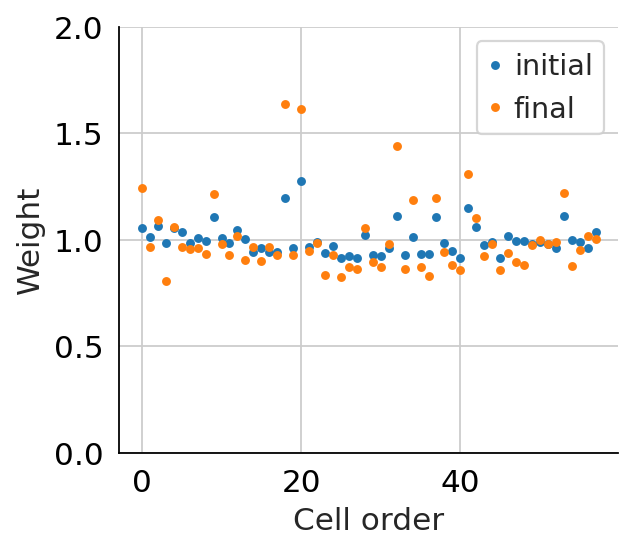

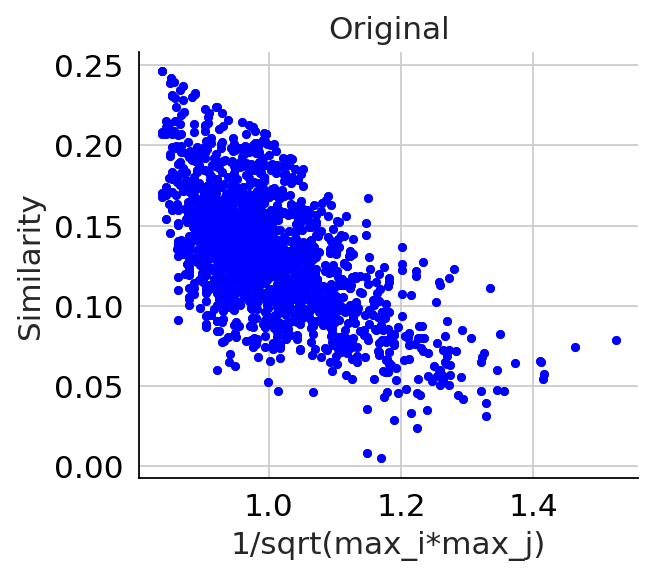

std: 0.059


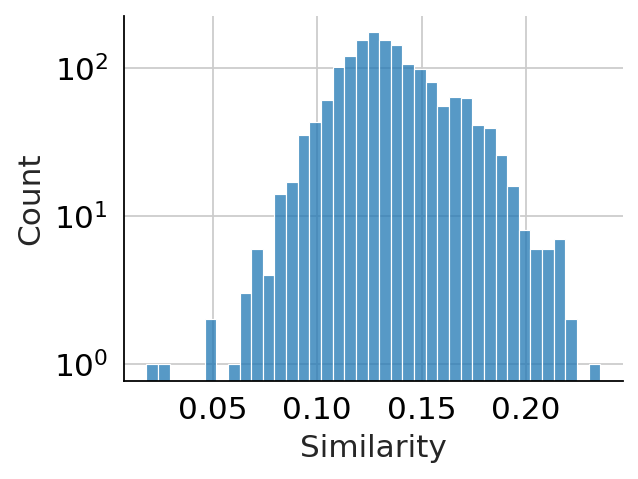

Reconstruction method: UPGMA
   clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  P10_1          11       1.0         1.0      0.0         0.0   
1   P8_1          12       1.0         1.0      0.0         0.0   
2   P8_2          11       1.0         1.0      0.0         0.0   
3   P8_3          12       1.0         1.0      0.0         0.0   
4   P9_1          12       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.181818           0.227273        0.917197           0.618182  
1         0.175000           0.250000        0.900615           0.616667  
2         0.218182           0.263636        0.890918           0.609091  
3         0.191667           0.283333        0.880032           0.600000  
4         0.225000           0.300000        0.865702           0.575000  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuity: 0.2648484848484

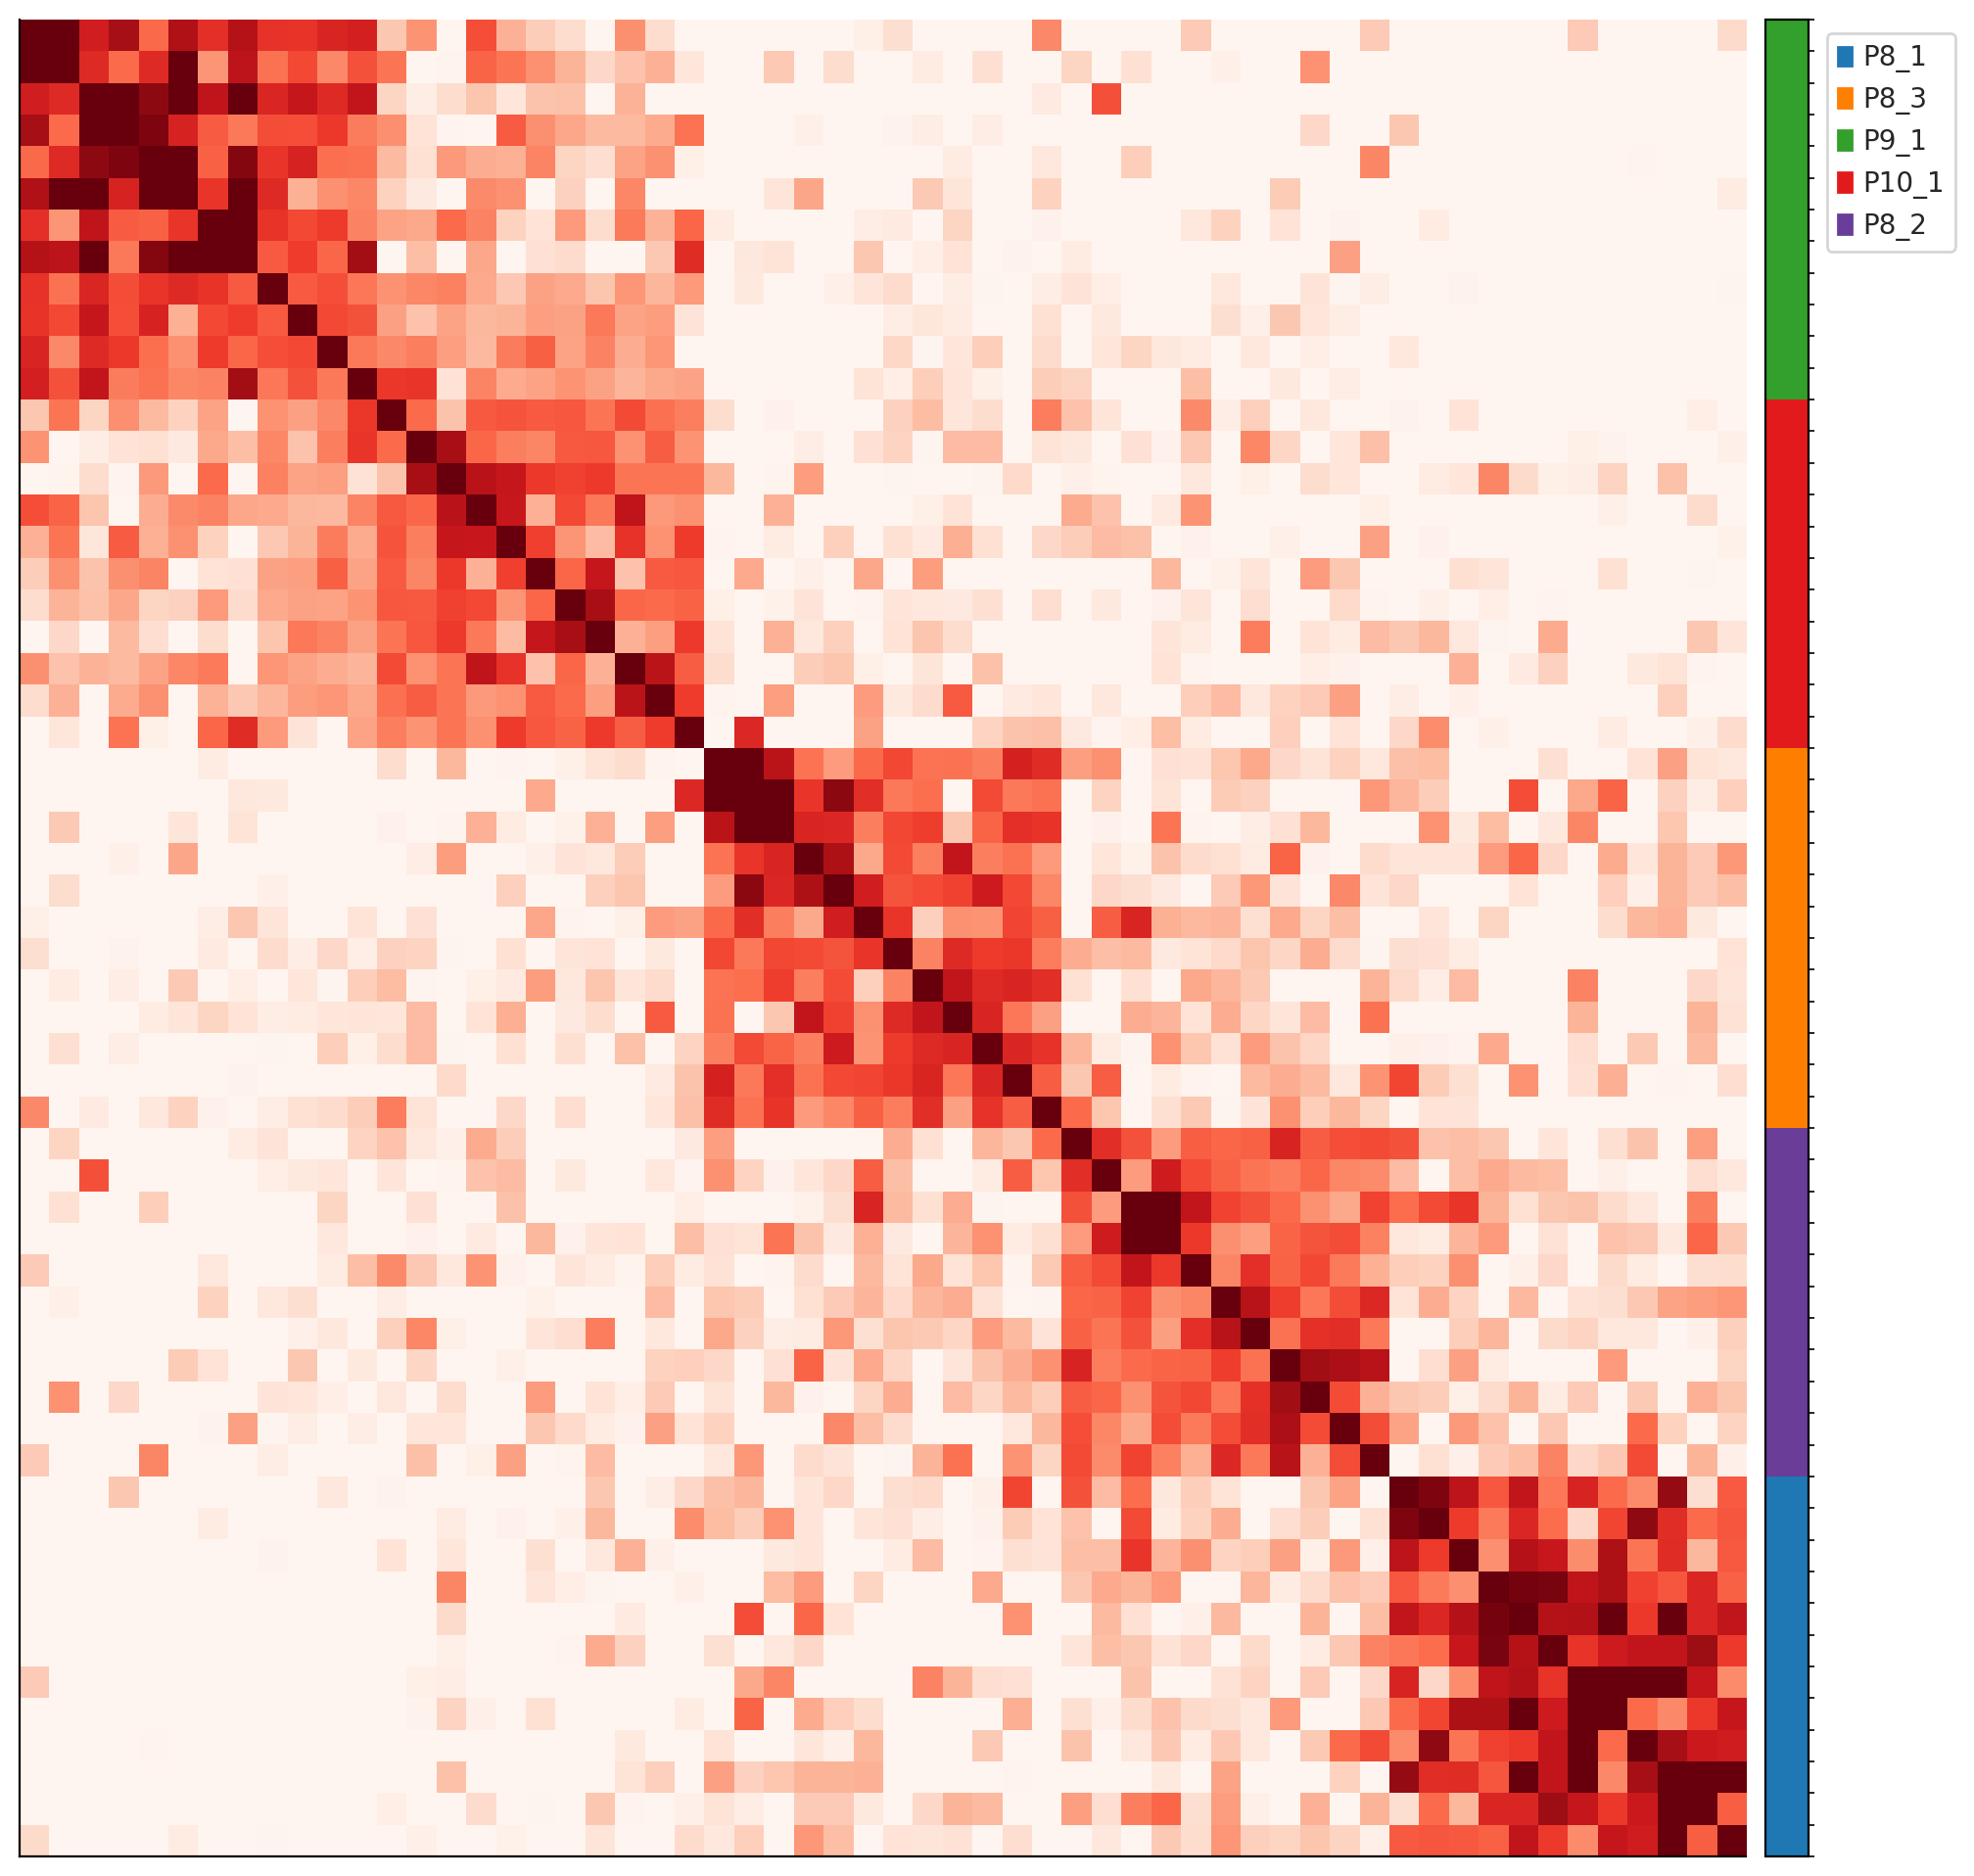

In [5]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


# H9 (ED.Fig2)

In [6]:
data_sets = 'H9'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 51; config samples: 51; merged samples: 51
Genome reference: GRCh38


In [7]:
clone_key = 'Clone ID'

In [8]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/cell_type_H9_neutral_thresh_20231204_scBSseq_H9_CMY_onlymet_H9_readNcutoff_5_0.2_0.6_nomerge_readcutoff3_minCov0.1_met_ExcludeSex0_final_clone.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0_final_clone', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0_final_clone', '.h5ad'].


In [9]:
adata

AnnData object with n_obs × n_vars = 51 × 43323
    obs: 'lineage', 'nGC', 'nCG', 'cell_type', 'UMAP_rna_y', 'UMAP_rna_x', 'final_clone', 'cell', 'pass_accQC', 'pass_metQC', 'id_met', 'id_acc', 'stage', 'source', 'met_Nmet_reads', 'met_Nnonmet_reads', 'met_N_tot_reads', 'met_rate', 'corr_met', 'met_min', 'met_max', 'met_range', 'plate_ID', 'HQ', 'date', 'clone', 'Pseudo_Clone_ID', 'generation_information_from_all_the_data', 'generation_information_from_all_the_data_simple', 'new_clone', 'state_info_idx', 'time_info', 'Clone ID'
    uns: 'accuracy', 'clonal_time_points', 'clone_id', 'data_des', 'neighbors', 'order_x', 'ordered_clone_array', 'time_ordering', 'umap'
    obsm: 'X_clone', 'X_eig', 'X_emb', 'X_join_N', 'X_similarity', 'X_umap', 'X_umap_rna'
    obsp: 'connectivities', 'distances'

use provided adata
adata shape:  (51, 43323)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 51/51 [00:00<00:00, 240.77it/s]


duration: 0.24936604499816895
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|          | 3/1000 [00:00<00:00, 1725.81it/s]


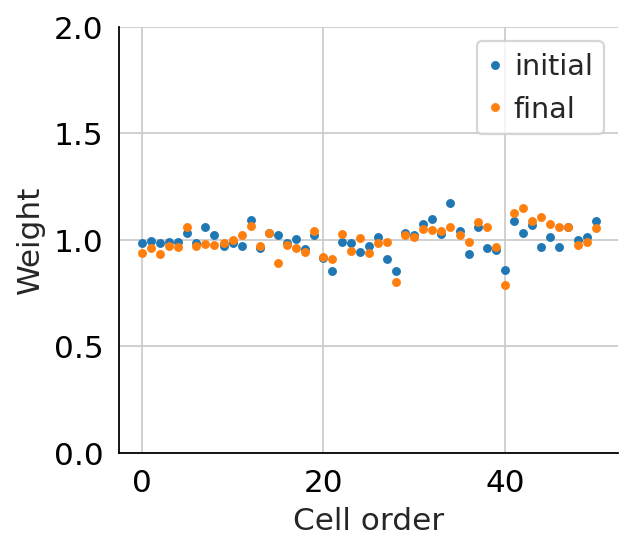

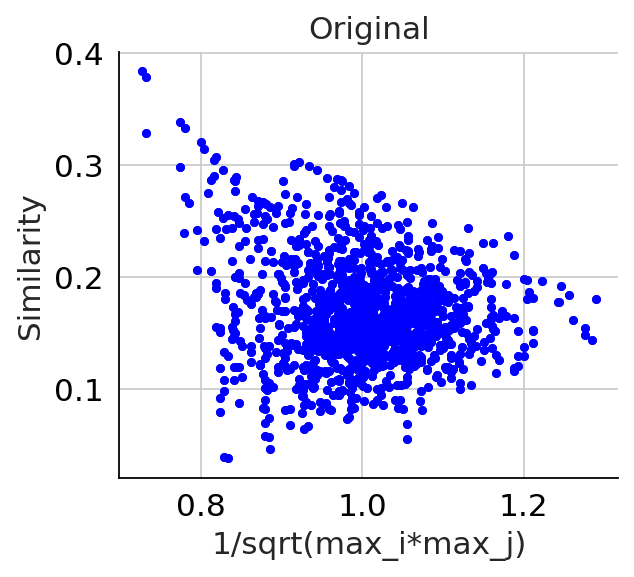

std: 0.027


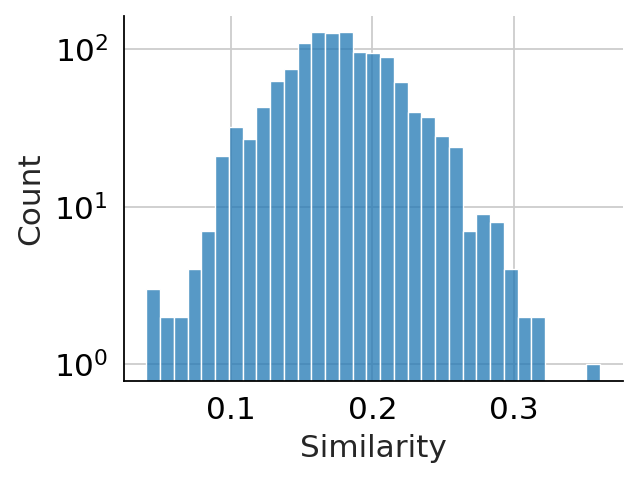

Reconstruction method: UPGMA
  clone  clone_size  accuracy  continuity   entropy  wassertein  \
0     A          12  0.916667    0.916667  0.115431    0.083333   
1     B          12  1.000000    1.000000  0.000000    0.000000   
2     C          12  0.916667    0.916667  0.115431    0.083333   
3     D          10  1.000000    1.000000  0.000000    0.000000   
4     E           5  1.000000    1.000000  0.000000    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.183333           0.266667        0.892457           0.575000  
1         0.183333           0.283333        0.883159           0.583333  
2         0.200000           0.325000        0.858159           0.566667  
3         0.220000           0.300000        0.873567           0.590000  
4         0.240000           0.320000        0.896638           0.620000  
mean continuity: 0.9666666666666666
mean accuracy: 0.9666666666666666
mean entropy: 0.0461725164735073
mean wassertein

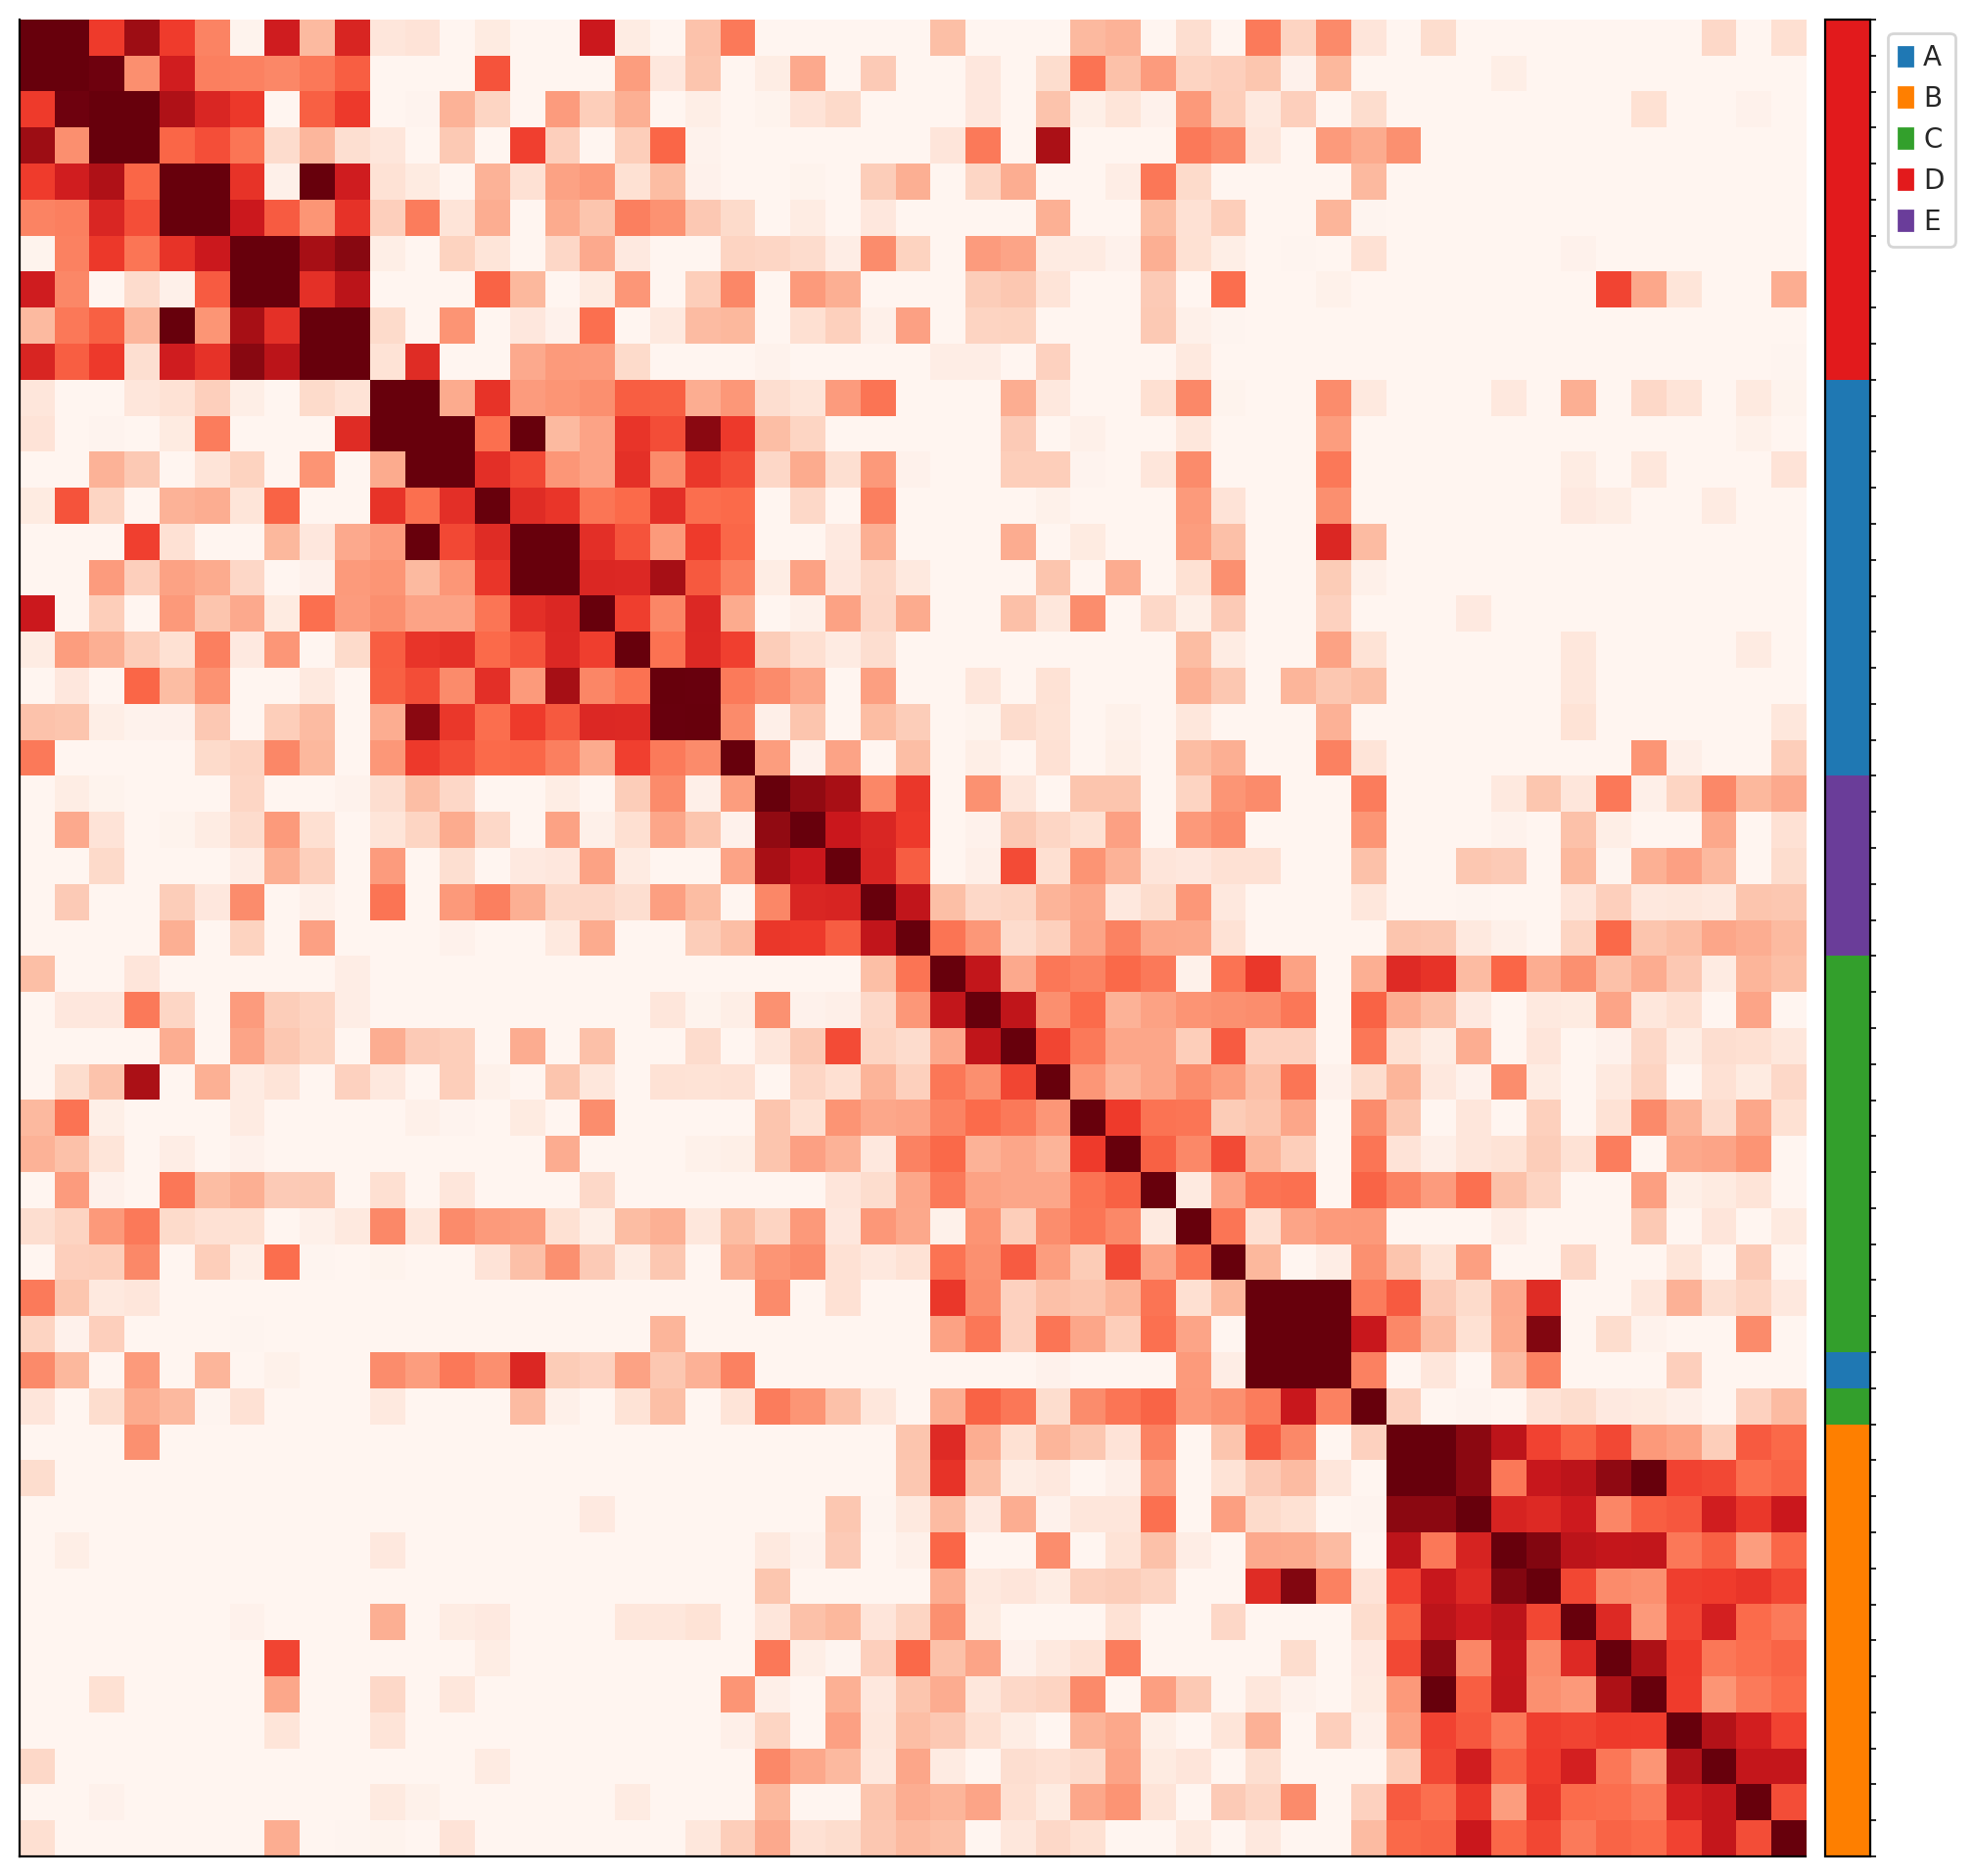

In [10]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


# Cancer (ED.Fig2)

In [11]:
data_sets = 'cancer'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 1295; config samples: 1295; merged samples: 1295
Genome reference: GRCh38


In [12]:
clone_key = 'Sublineage'

In [13]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/patient_CRC11_neutral_thresh_Bian_2018_CpG_CRC10_readNcutoff_5_0.3_0.5_readcutoff3_minCov0.1_met_ExcludeSex0.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (254, 234280)
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|          | 6/1000 [00:00<00:01, 694.38it/s]


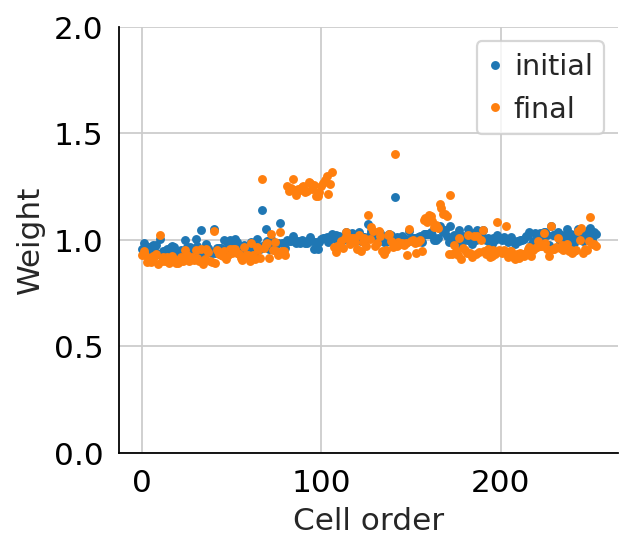

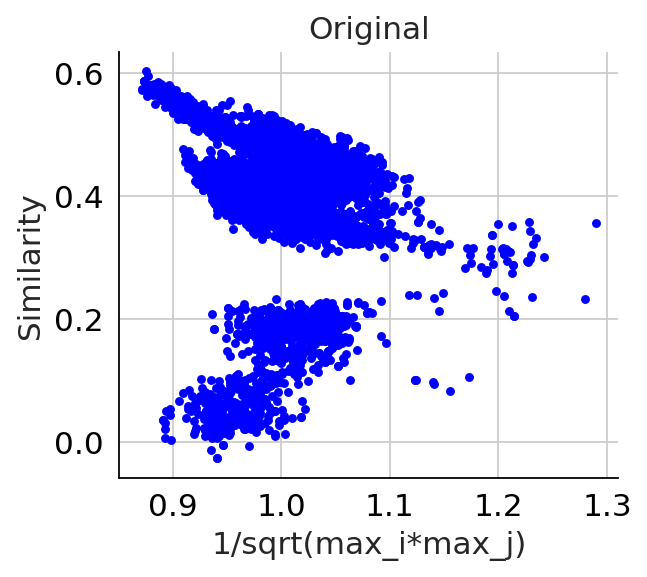

std: 0.054


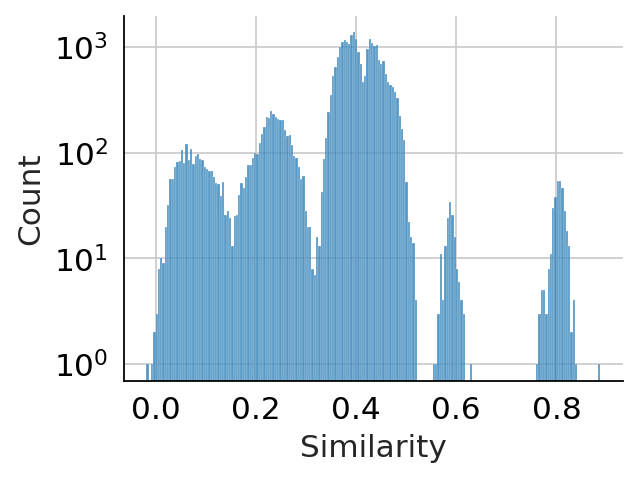

Reconstruction method: UPGMA
  clone  clone_size  accuracy  continuity  entropy  wassertein  \
0    A1           6       1.0         1.0      0.0         0.0   
1    A2          22       1.0         1.0      0.0         0.0   
2    A3          38       1.0         1.0      0.0         0.0   
3    A4          35       1.0         1.0      0.0         0.0   
4    A5          14       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.066667           0.200000        0.974210           0.766667  
1         0.095455           0.136364        0.956920           0.754545  
2         0.071053           0.192105        0.932786           0.728947  
3         0.077143           0.182857        0.934761           0.731429  
4         0.071429           0.128571        0.969983           0.785714  
mean continuity: 0.9983552631578947
mean accuracy: 0.9967105263157895
mean entropy: 0.0035124652430694367
mean wassertein: 0

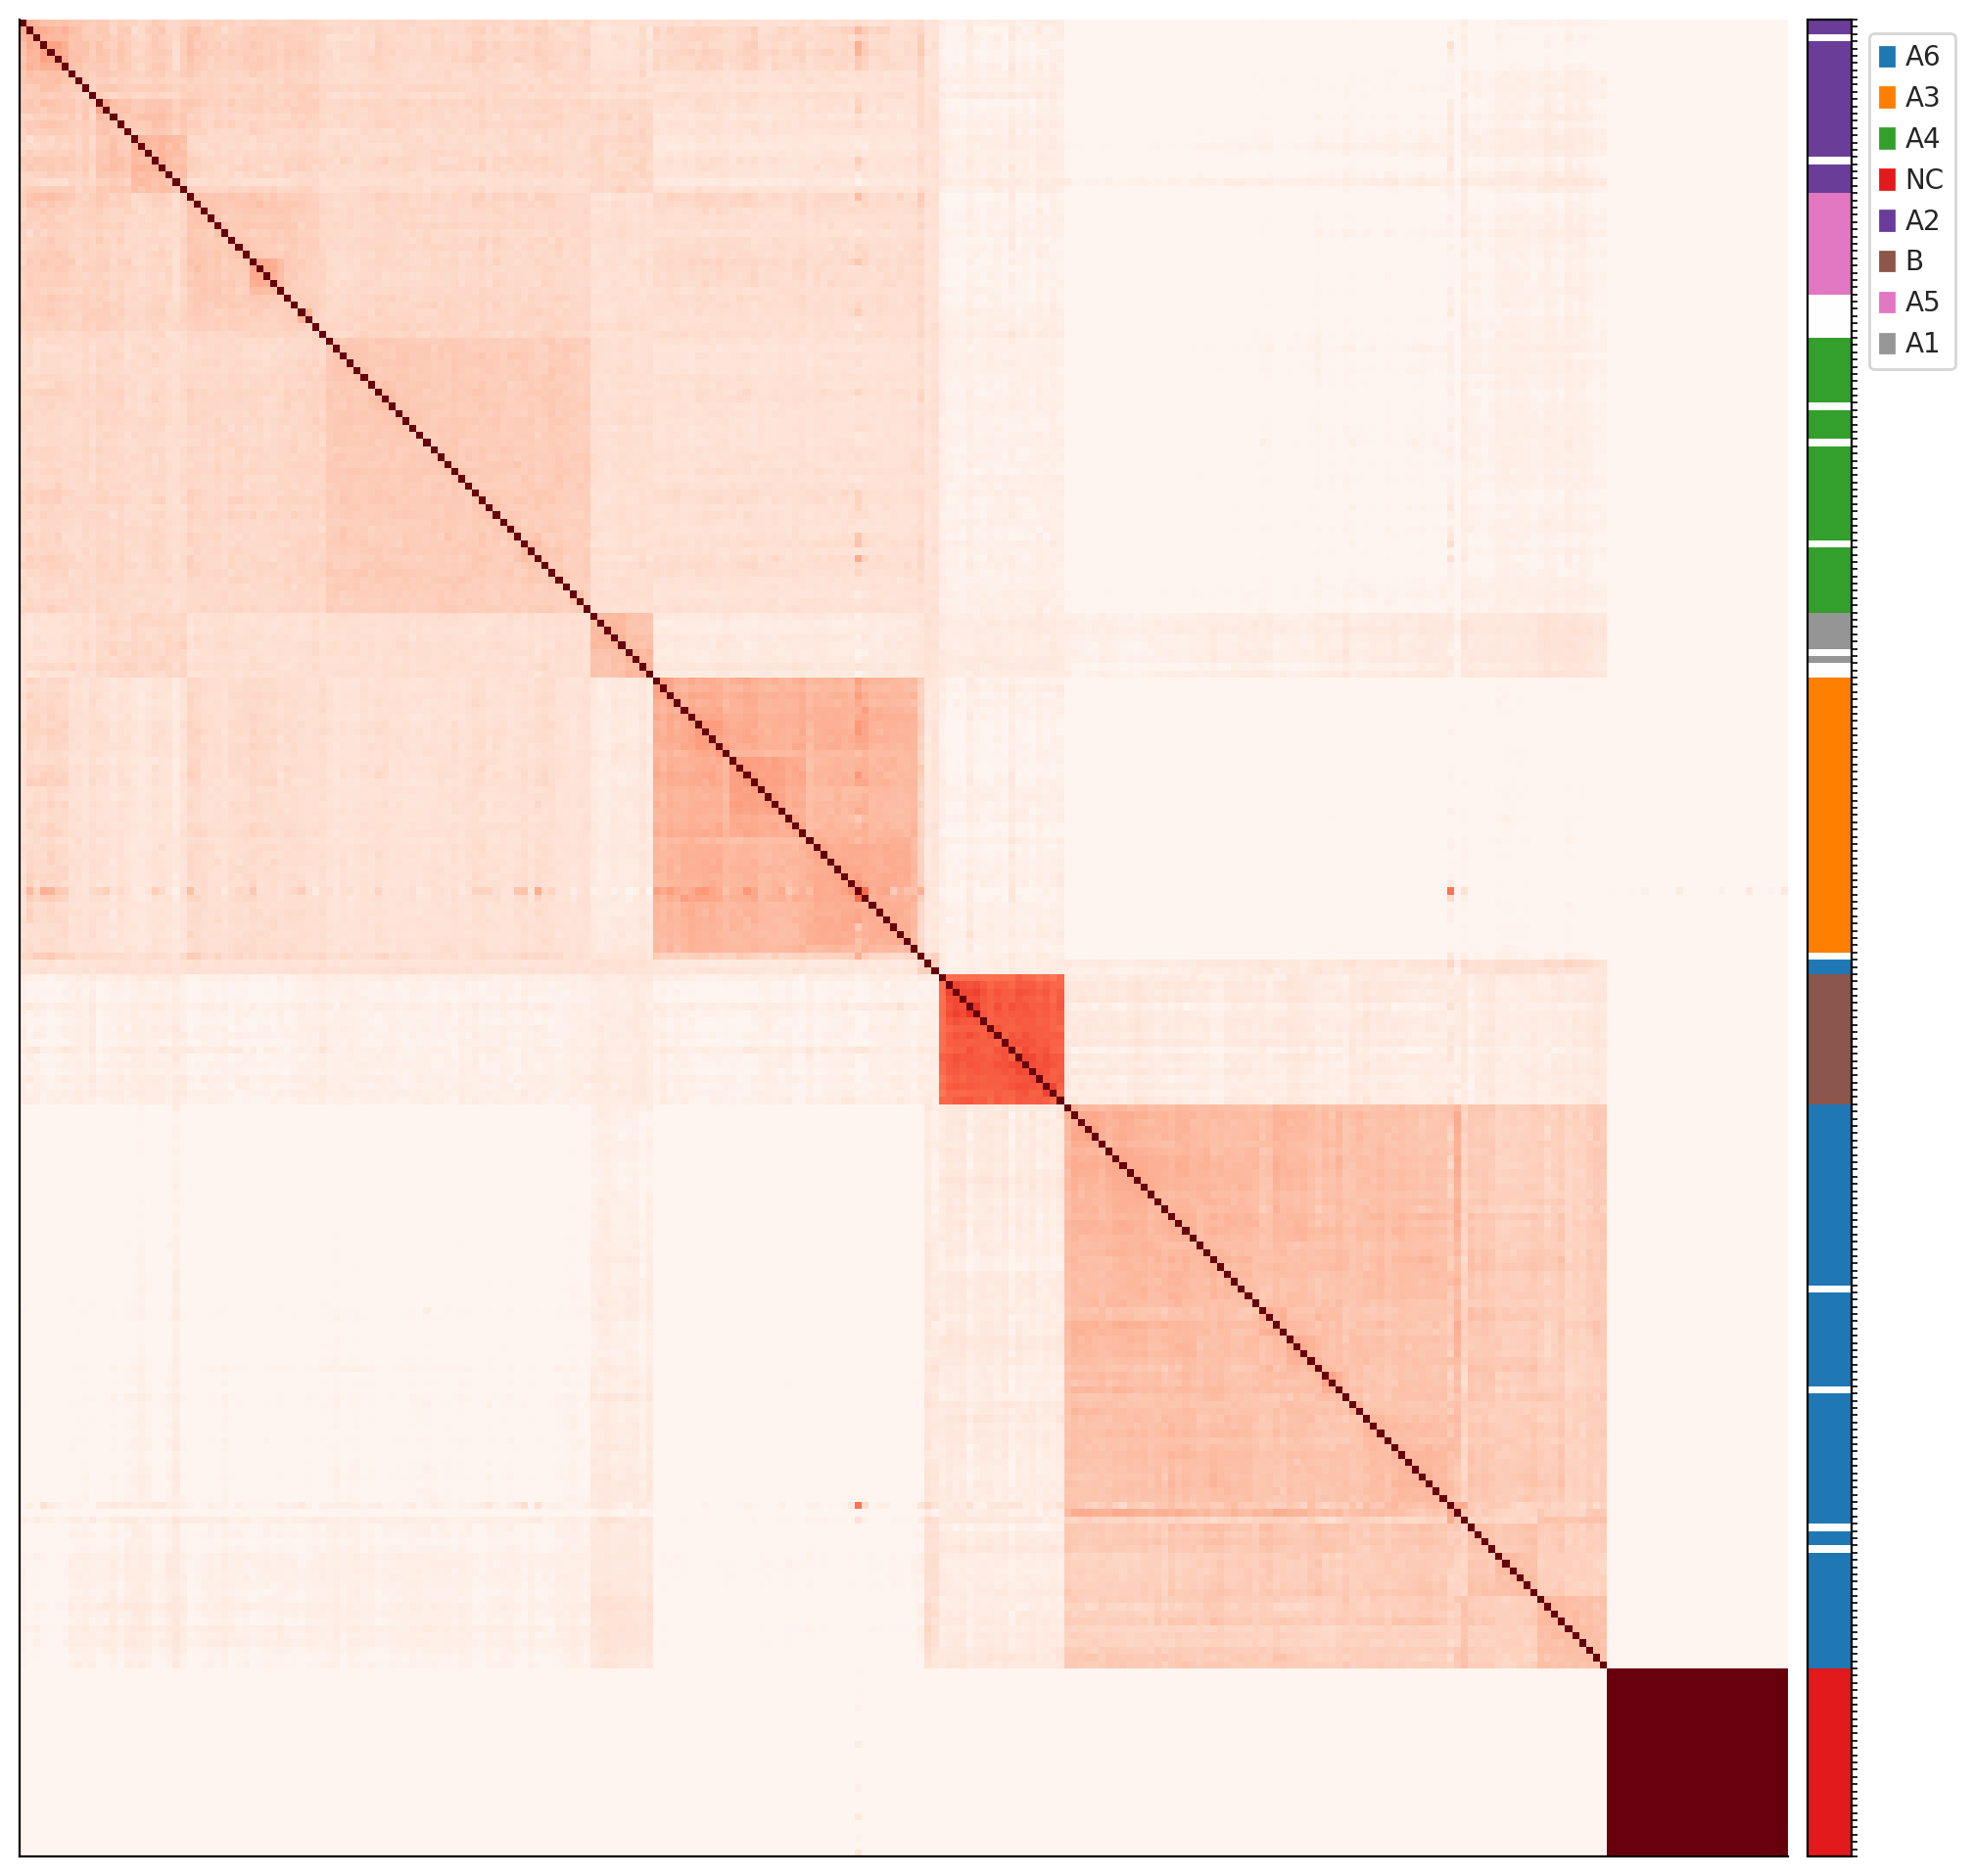

In [14]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


# human_FGC (Fig2, ED.Fig3)

In [59]:
data_sets = 'human_FGC'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 823; config samples: 823; merged samples: 823
Genome reference: GRCh38


In [60]:
clone_key = 'sublineage'
cell_type_key='regress_cell_type' 

## 21W

In [61]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/final_sel_sublineage_21W_sel_neutral_thresh_Li_2021_CellResearch_F_FGC_17W_readNcutoff_5_0.3_0.6_hg19_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (144, 109113)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 144/144 [00:07<00:00, 19.38it/s]


duration: 7.719829797744751
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  2%|▏         | 16/1000 [00:00<00:00, 1548.14it/s]


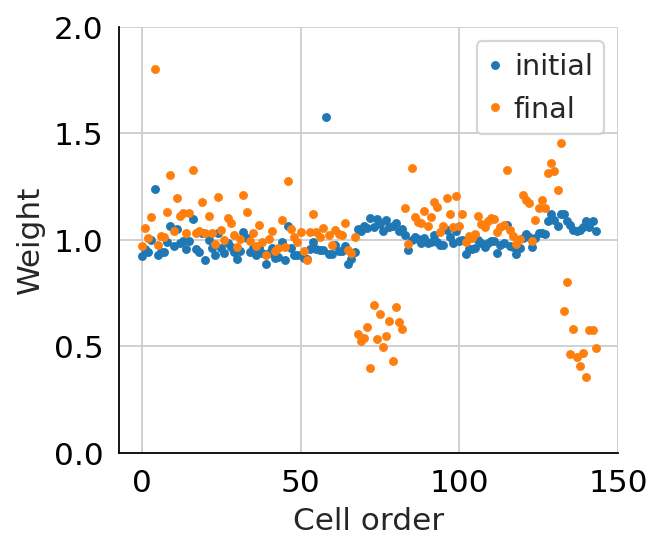

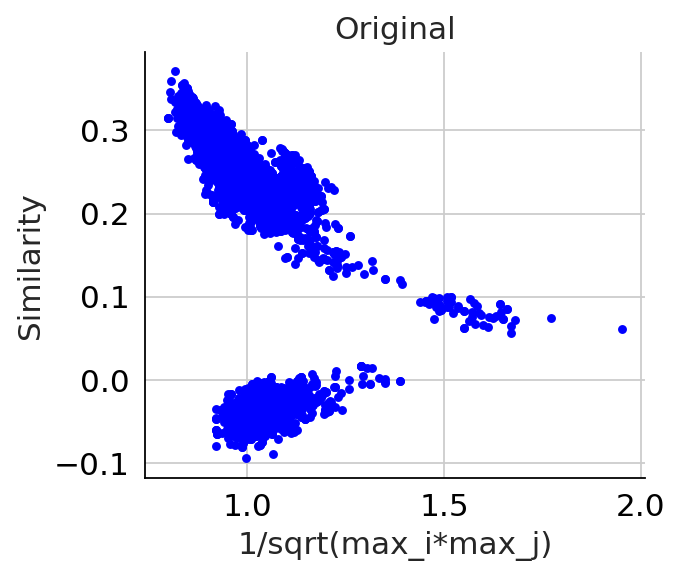

std: 0.070
Remove cell-type signal with fast method


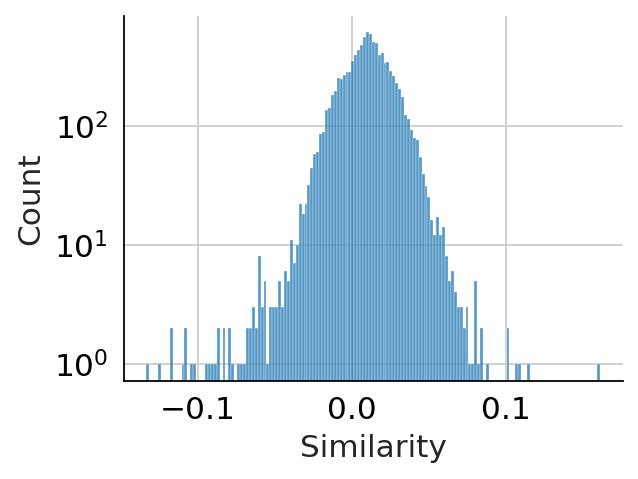

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  Embryo_1          83       1.0         1.0      0.0         0.0   
1  Embryo_2          61       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.085542           0.572289        0.766649           0.397590  
1         0.086885           0.421311        0.834322           0.498361  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuity: 0.49680031601817104
mean random_accuracy: 0.08621370728816907
mean random_entropy: 0.800485526801496
mean random_wassertein: 0.44797550859174406


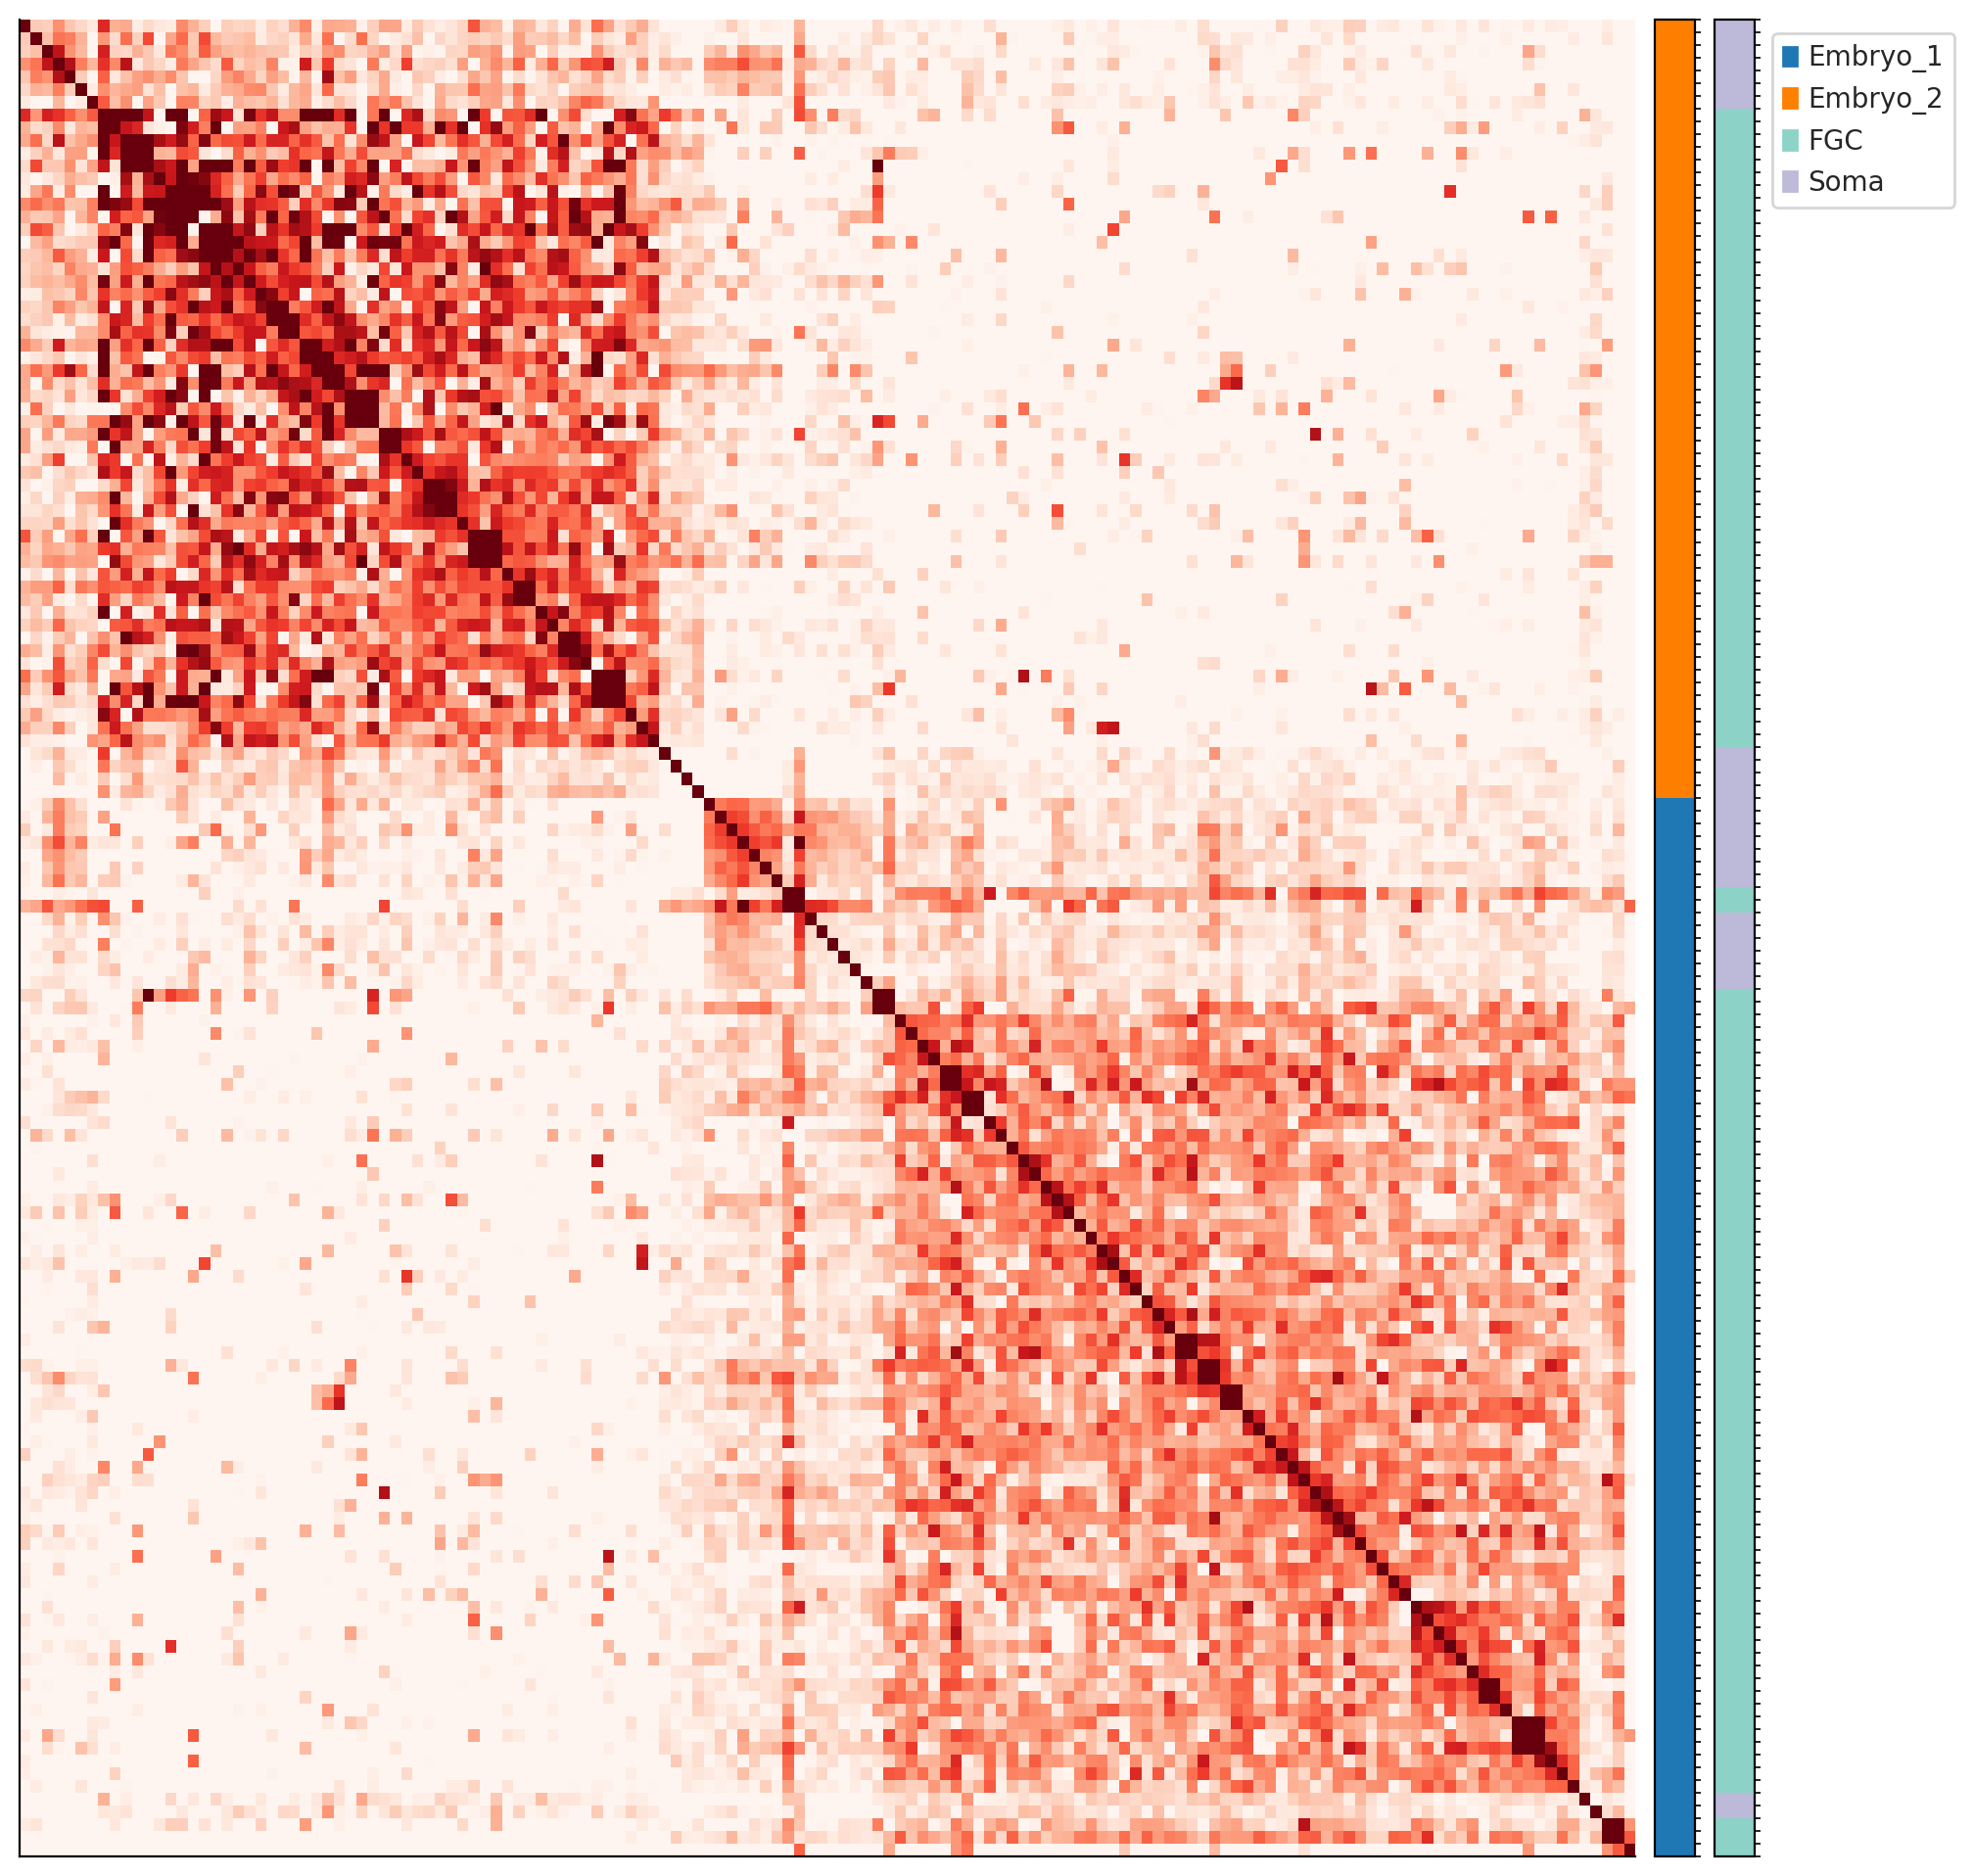

In [63]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=True,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
    cell_type_key=cell_type_key,
    heatmap_additional_key_list=['regress_cell_type']
)


## 7W

In [64]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/final_sel_sublineage_7W_sel_neutral_thresh_Li_2021_CellResearch_F_FGC_17W_readNcutoff_5_0.3_0.6_hg19_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (60, 90609)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 60/60 [00:00<00:00, 69.36it/s]


duration: 0.9545352458953857
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|▏         | 13/1000 [00:00<00:00, 2599.94it/s]


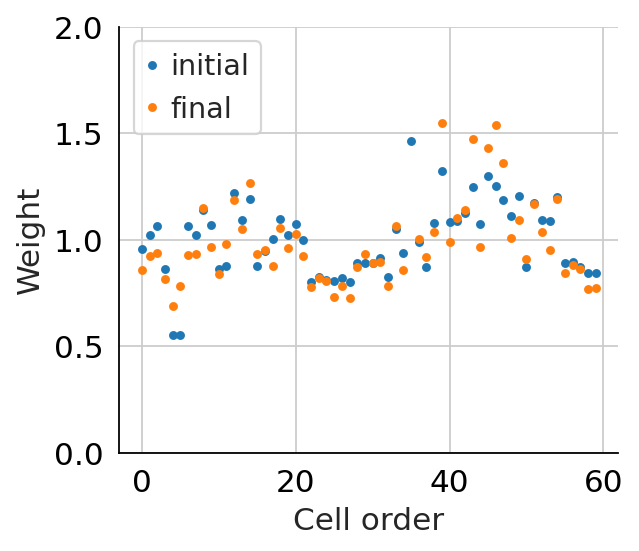

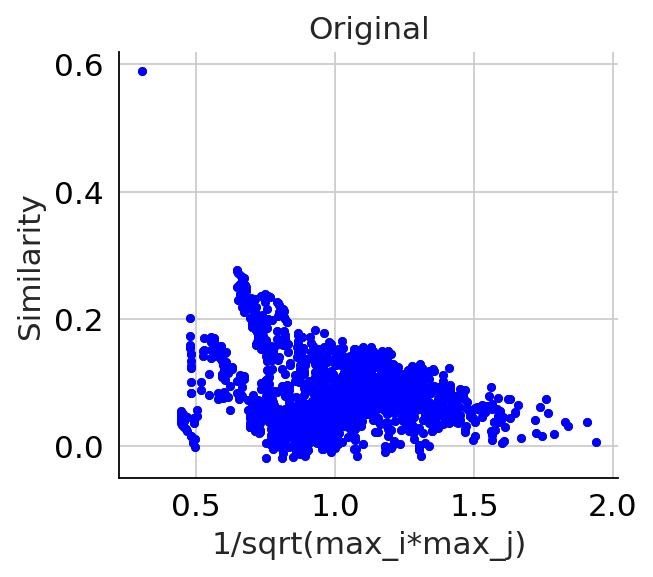

std: 0.081
Remove cell-type signal with fast method


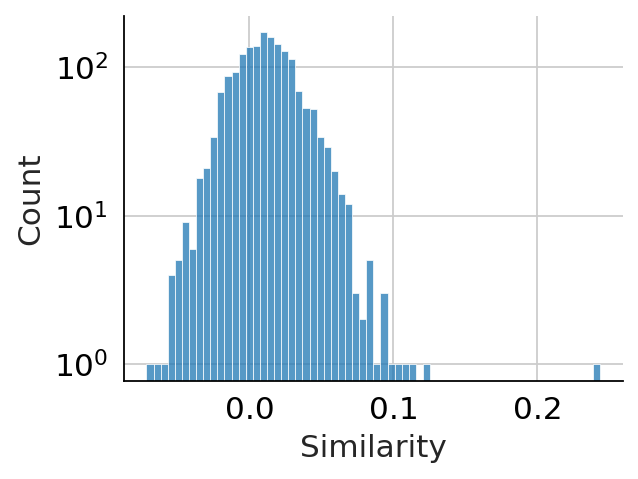

Reconstruction method: UPGMA
       clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  embryo_10          27       1.0         1.0      0.0         0.0   
1   embryo_5          33       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.170370           0.455556        0.786915           0.448148  
1         0.169697           0.545455        0.739610           0.366667  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuity: 0.5005050505050505
mean random_accuracy: 0.17003367003367004
mean random_entropy: 0.7632625915261044
mean random_wassertein: 0.40740740740740733


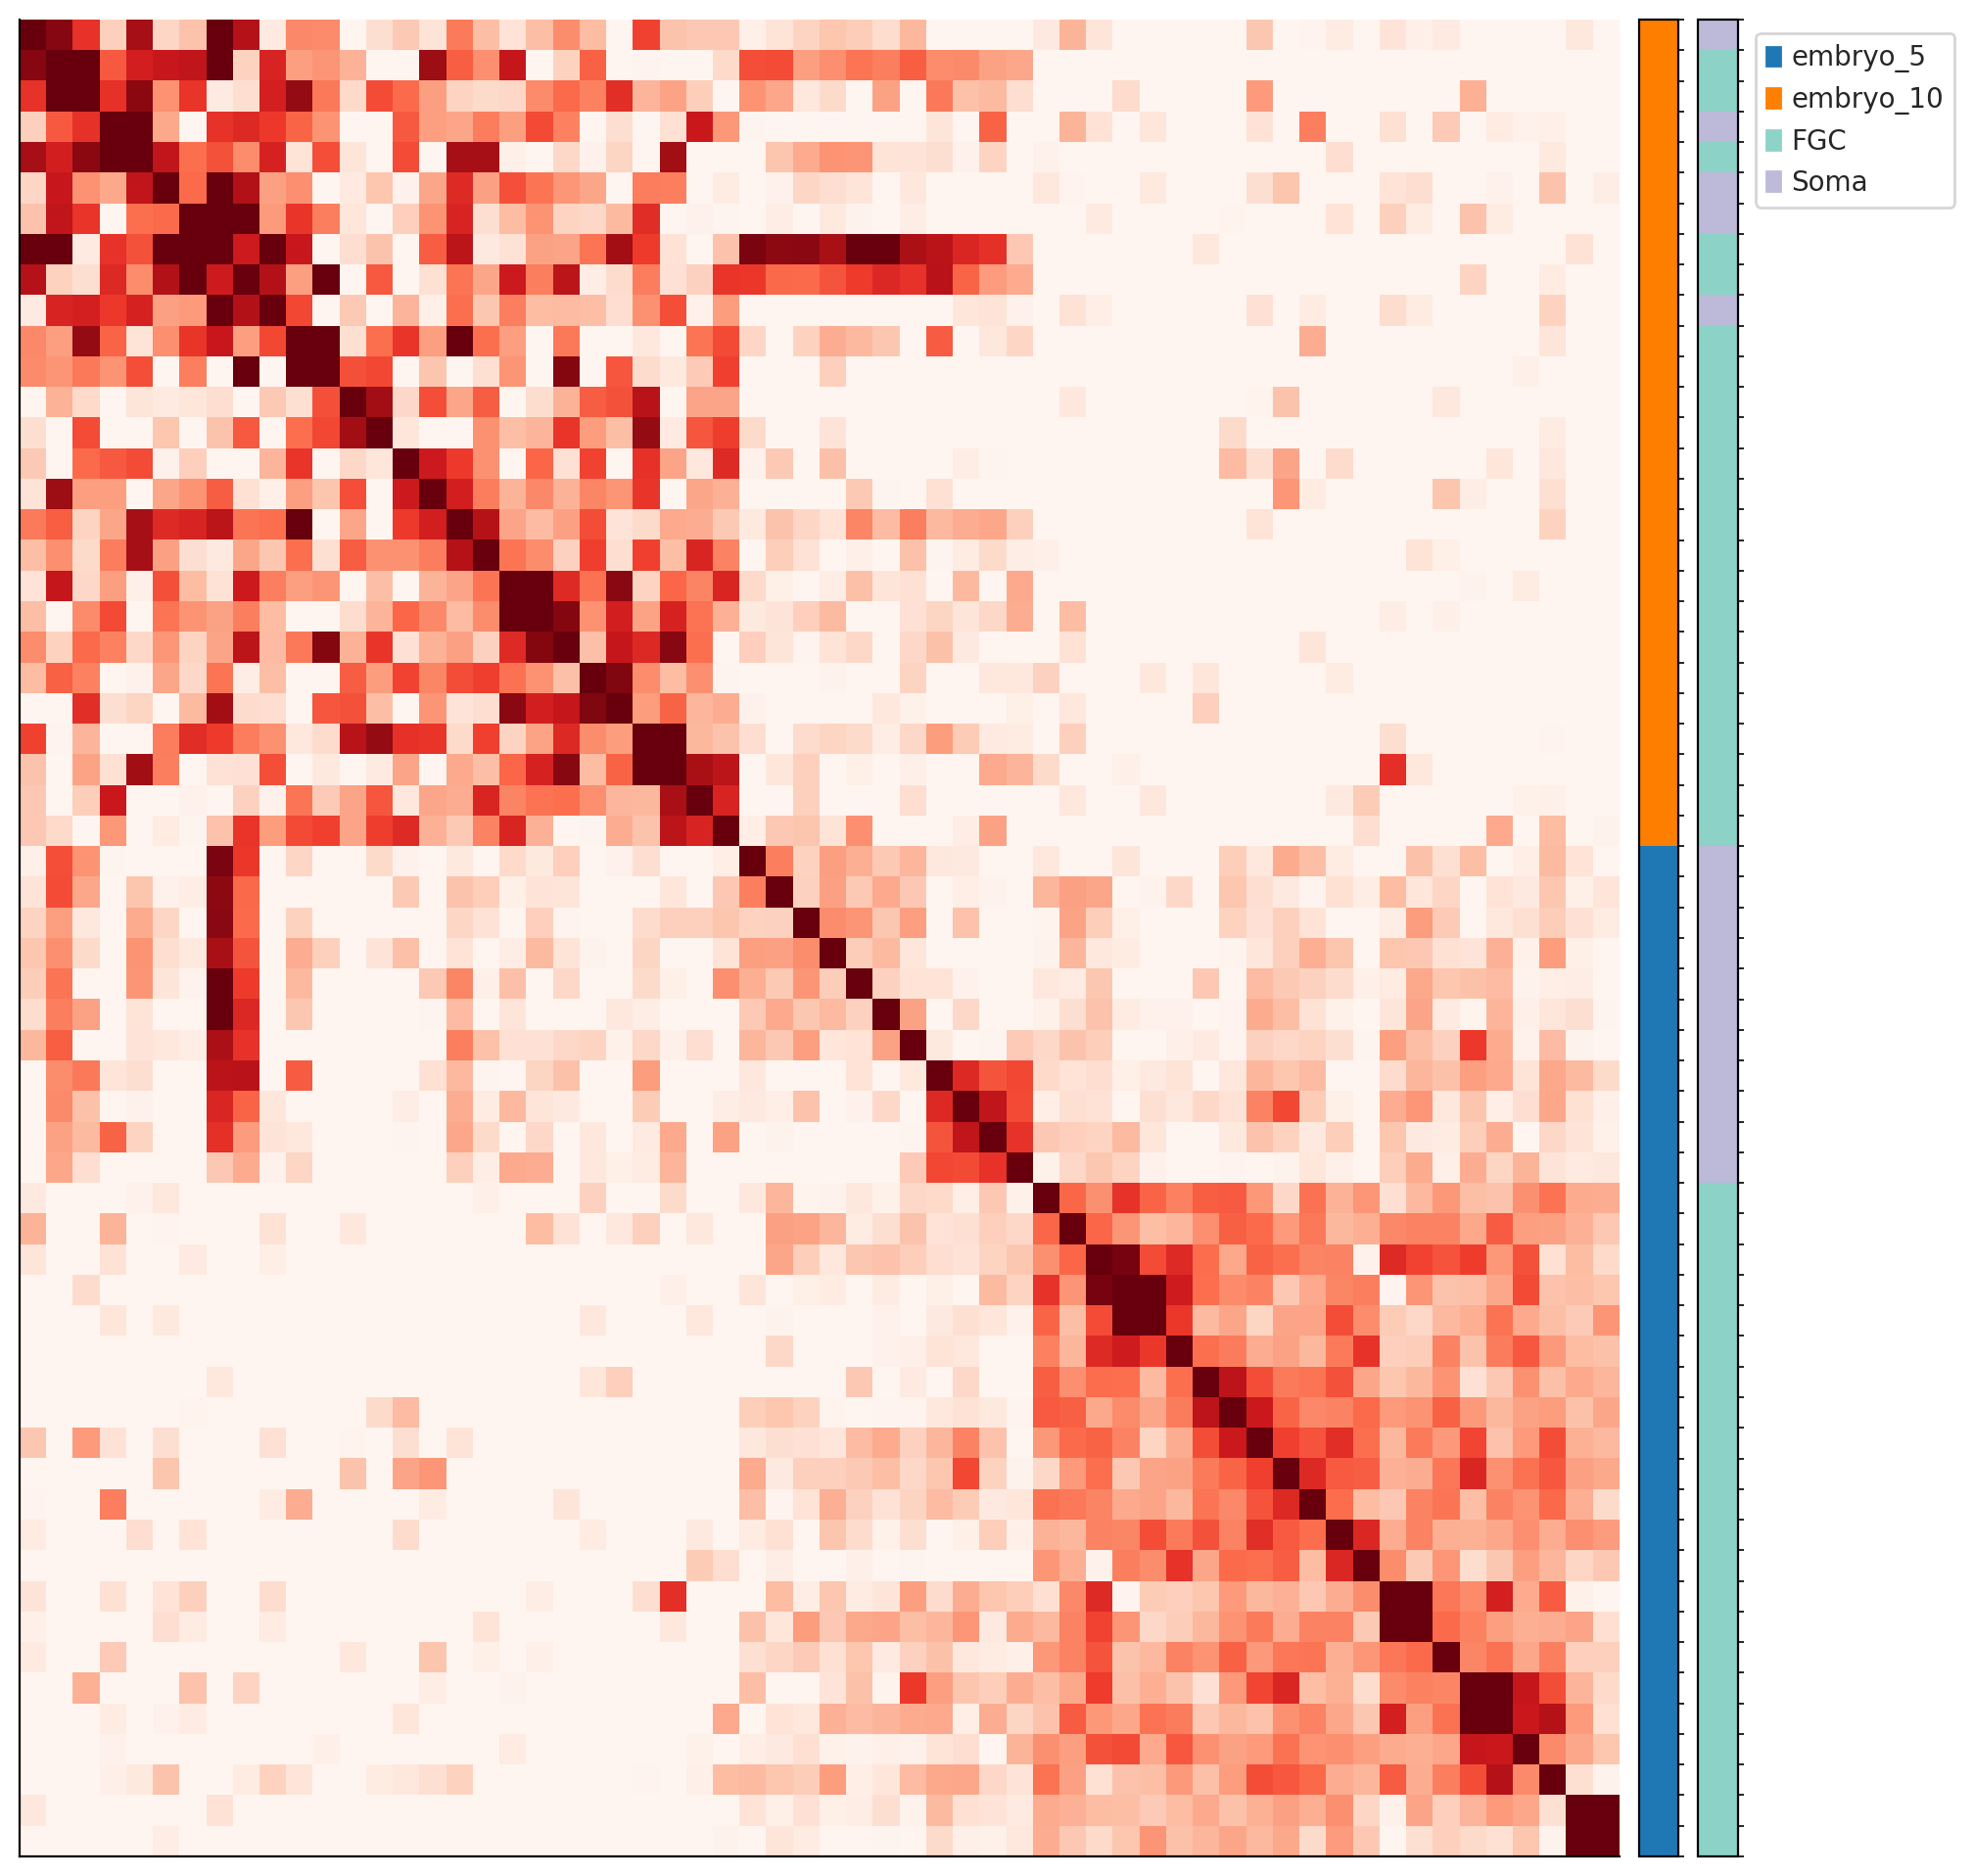

In [65]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=True,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
    cell_type_key=cell_type_key,
    heatmap_additional_key_list=['regress_cell_type']
)


# mouse_LK (Fig3, ED.Fig4)

In [66]:
data_sets = 'mouse_LK'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 576; config samples: 576; merged samples: 576
Genome reference: mm10


In [67]:
clone_key = 'clone_info'

In [68]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/omics_all_neutral_thresh_20240207_scMultiOmicsseq_LK_DNApart_CMY_onlymet_LK_readNcutoff_5_0.1_0.6_readcutoff3_minCov0.1_met_ExcludeSex0.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (494, 76279)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 494/494 [00:55<00:00,  8.83it/s]


duration: 56.61160349845886
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  2%|▏         | 21/1000 [00:00<00:04, 233.61it/s]


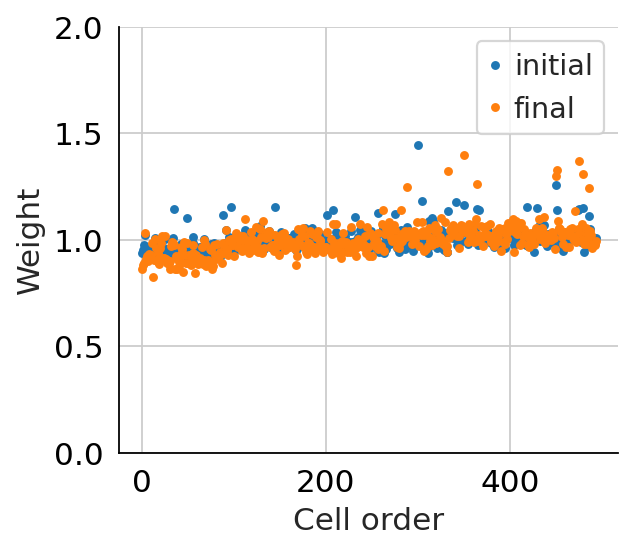

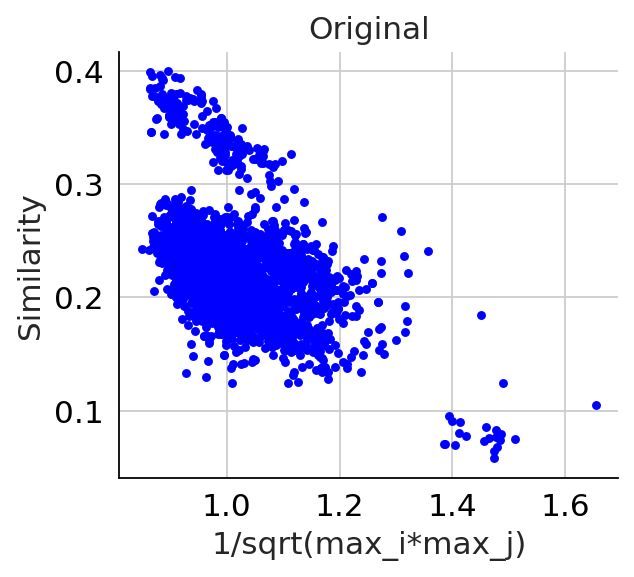

std: 0.026


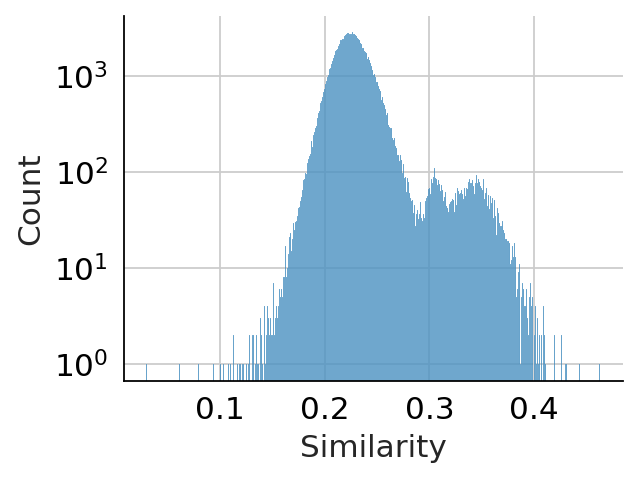

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   clone_0           4       1.0         1.0      0.0         0.0   
1   clone_1          21       1.0         1.0      0.0         0.0   
2  clone_10          22       1.0         1.0      0.0         0.0   
3  clone_11           3       1.0         1.0      0.0         0.0   
4  clone_12           3       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.000000           0.250000        1.000000           0.700000  
1         0.057143           0.095238        0.978317           0.823810  
2         0.072727           0.095455        0.977576           0.822727  
3         0.000000           0.333333        1.000000           0.666667  
4         0.000000           0.333333        1.000000           0.666667  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuit

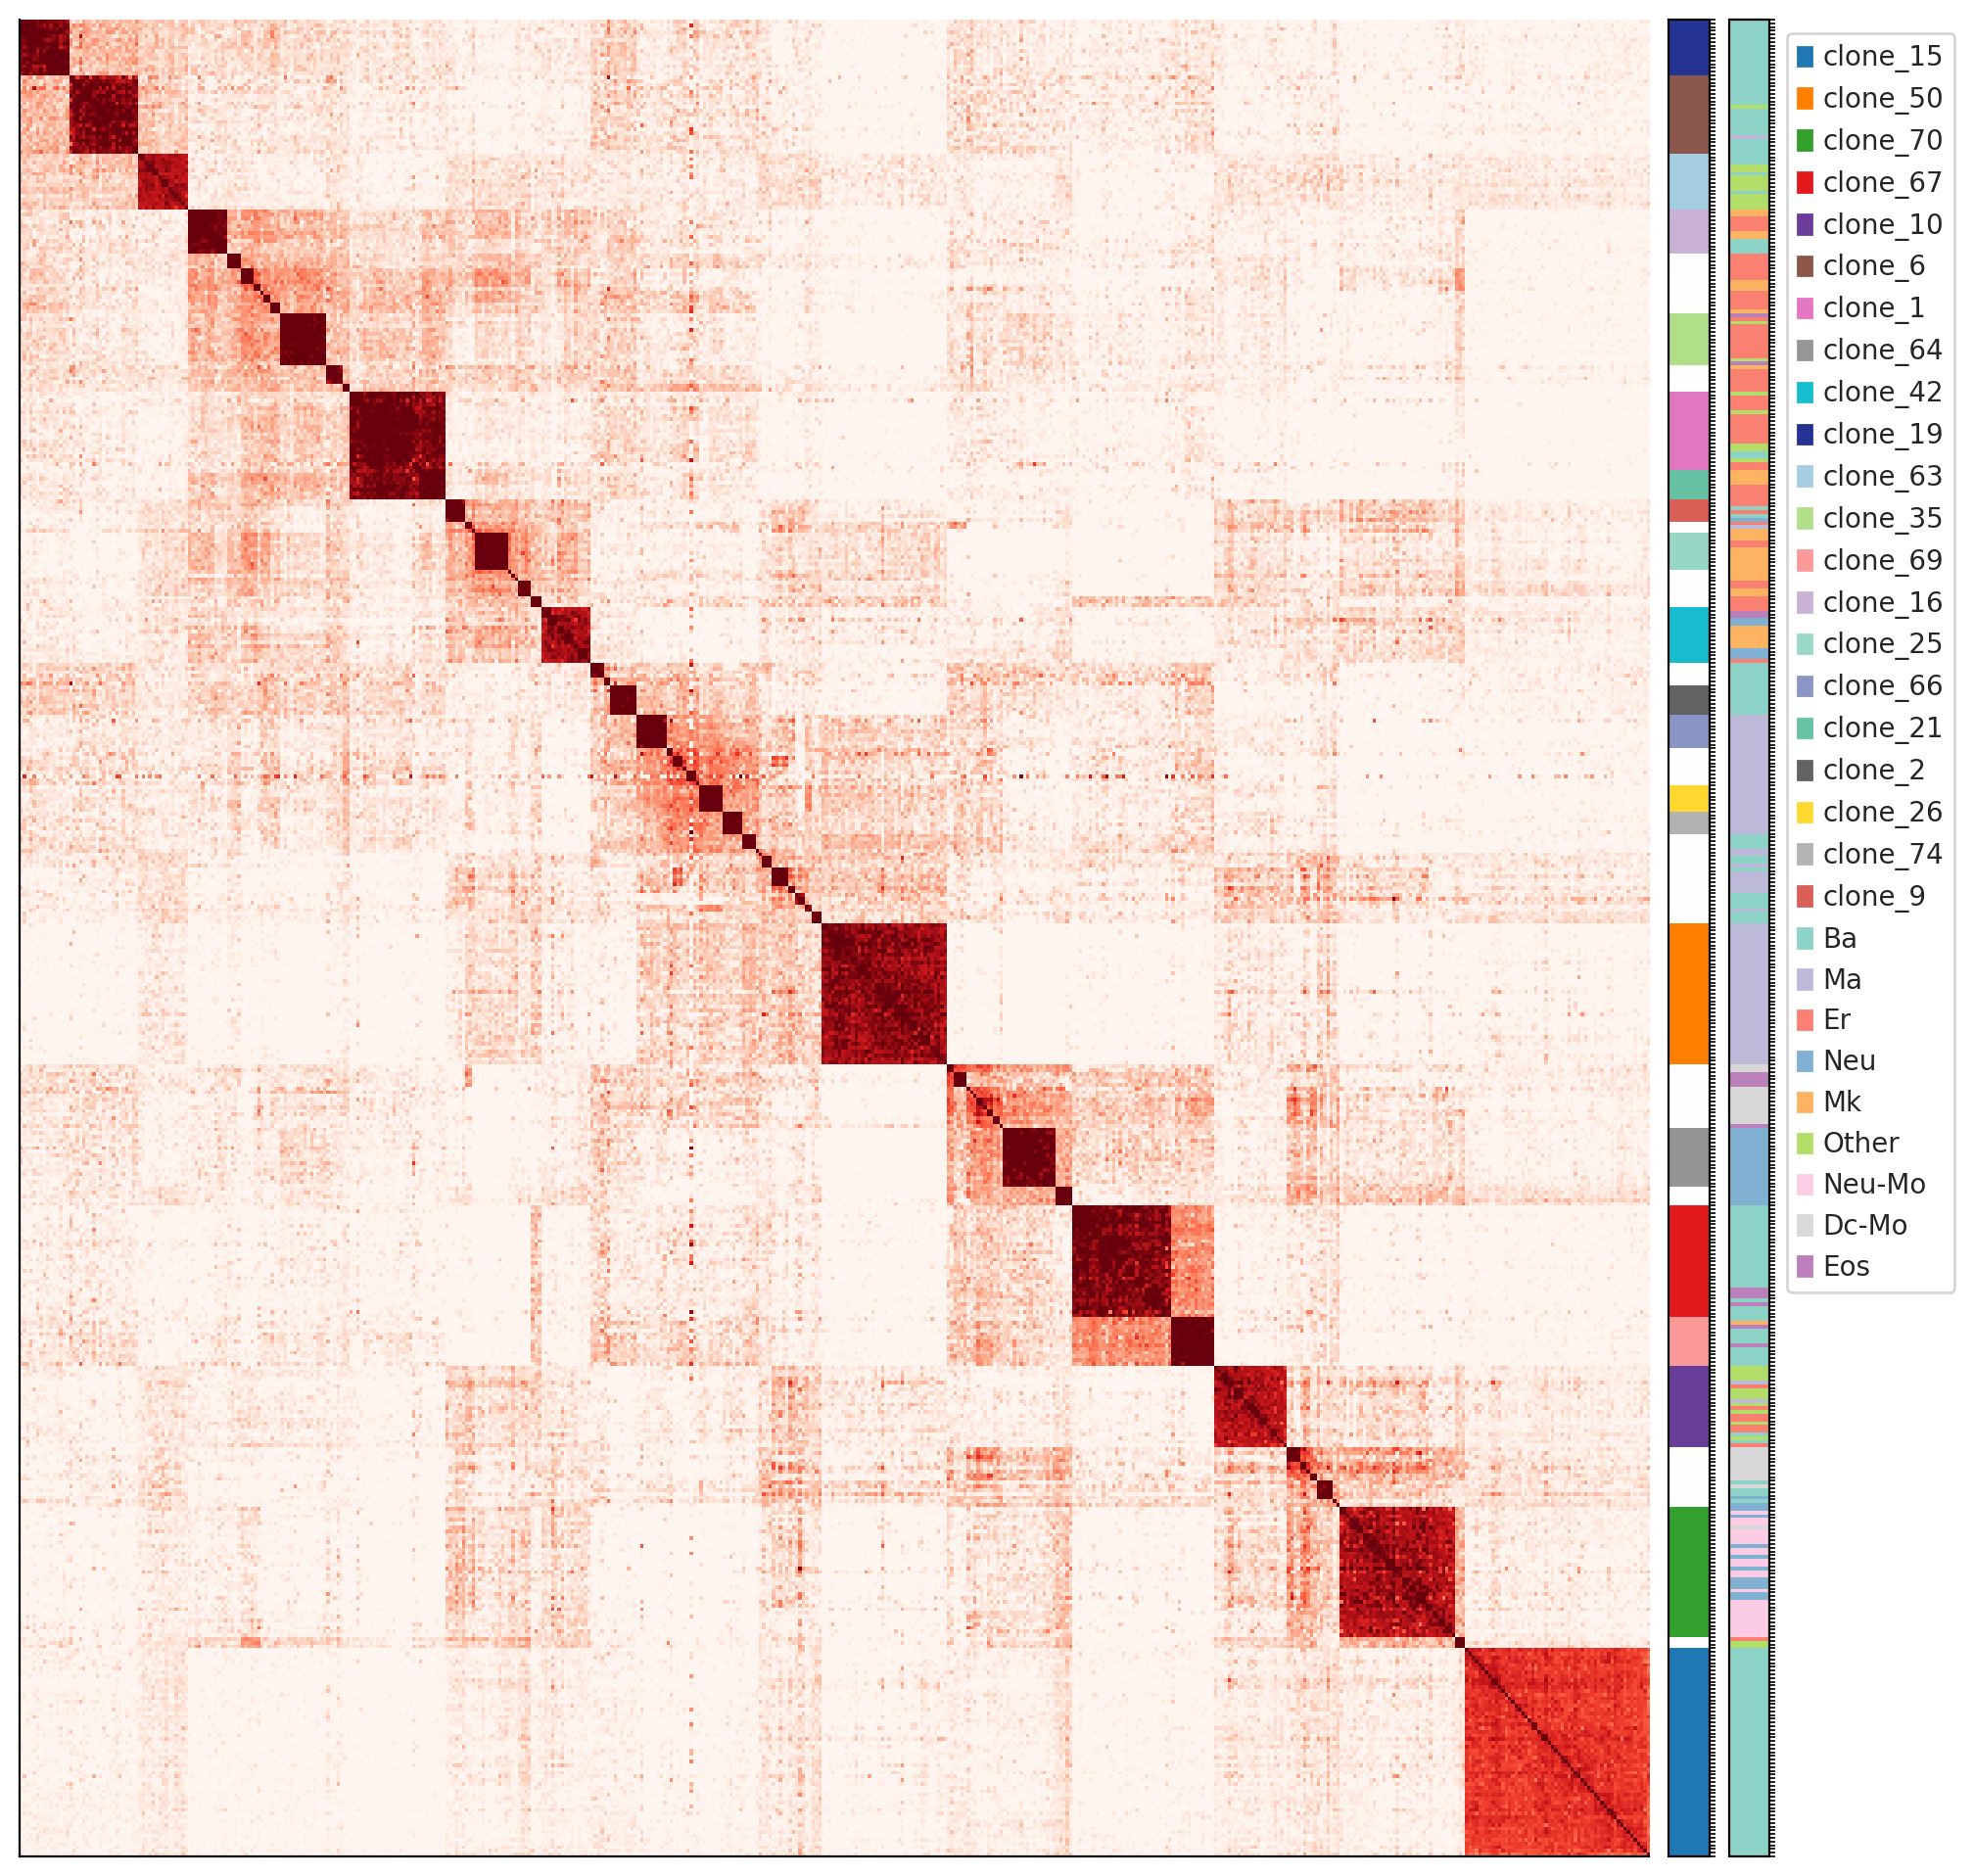

In [70]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
    heatmap_additional_key_list=['cell_type']
)


# humanCD34 (Fig4)

In [75]:
data_sets = 'human_CD34'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 312; config samples: 312; merged samples: 312
Genome reference: hg38


In [76]:
clone_key = 'clone_id'

In [77]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/source_all_neutral_thresh_20240713_scMultiOmicsseq_human_HSC_CMY_DNApart_merge_20240413_20240528_20240708_readNcutoff_3_0.1_0.4_500bp_readcutoff1_minCov2_met_ExcludeSex0.h5ad')

Only considering the two last: ['.4_500bp_readcutoff1_minCov2_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.4_500bp_readcutoff1_minCov2_met_ExcludeSex0', '.h5ad'].


## total cells

use provided adata
adata shape:  (261, 126412)
update sample
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|          | 7/1000 [00:00<00:01, 694.70it/s]


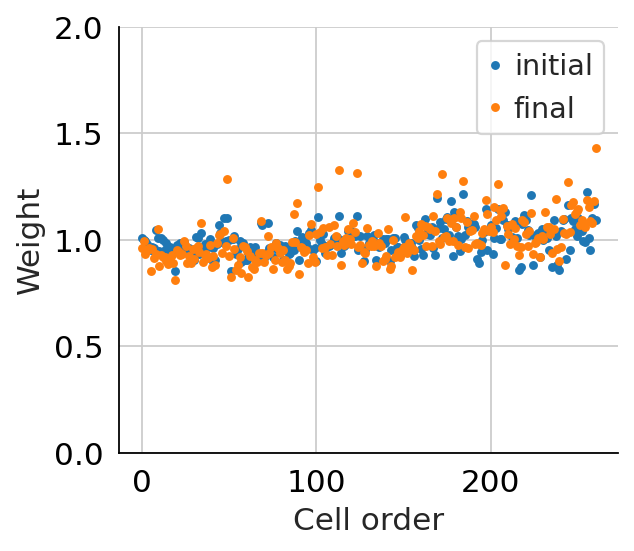

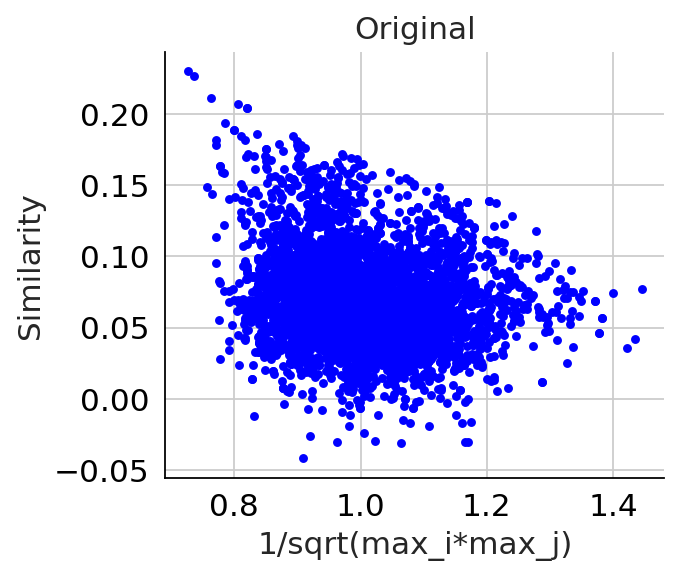

std: 0.017


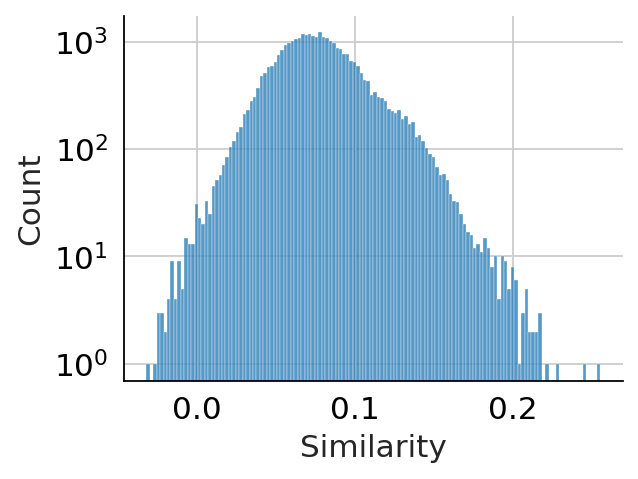

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity   entropy  wassertein  \
0  clone_12          36  0.972222    0.972222  0.035421    0.027778   
1  clone_13          23  0.956522    0.956522  0.057039    0.043478   
2  clone_16          13  1.000000    1.000000  0.000000    0.000000   
3  clone_17           5  1.000000    1.000000  0.000000    0.000000   
4  clone_19           7  1.000000    1.000000  0.000000    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.105556           0.283333        0.886613           0.650000  
1         0.095652           0.152174        0.945825           0.726087  
2         0.107692           0.138462        0.966740           0.730769  
3         0.040000           0.220000        0.982773           0.740000  
4         0.114286           0.228571        0.938936           0.700000  
mean continuity: 0.9960413311862588
mean accuracy: 0.9960413311862588
mean entropy: 0.00513663

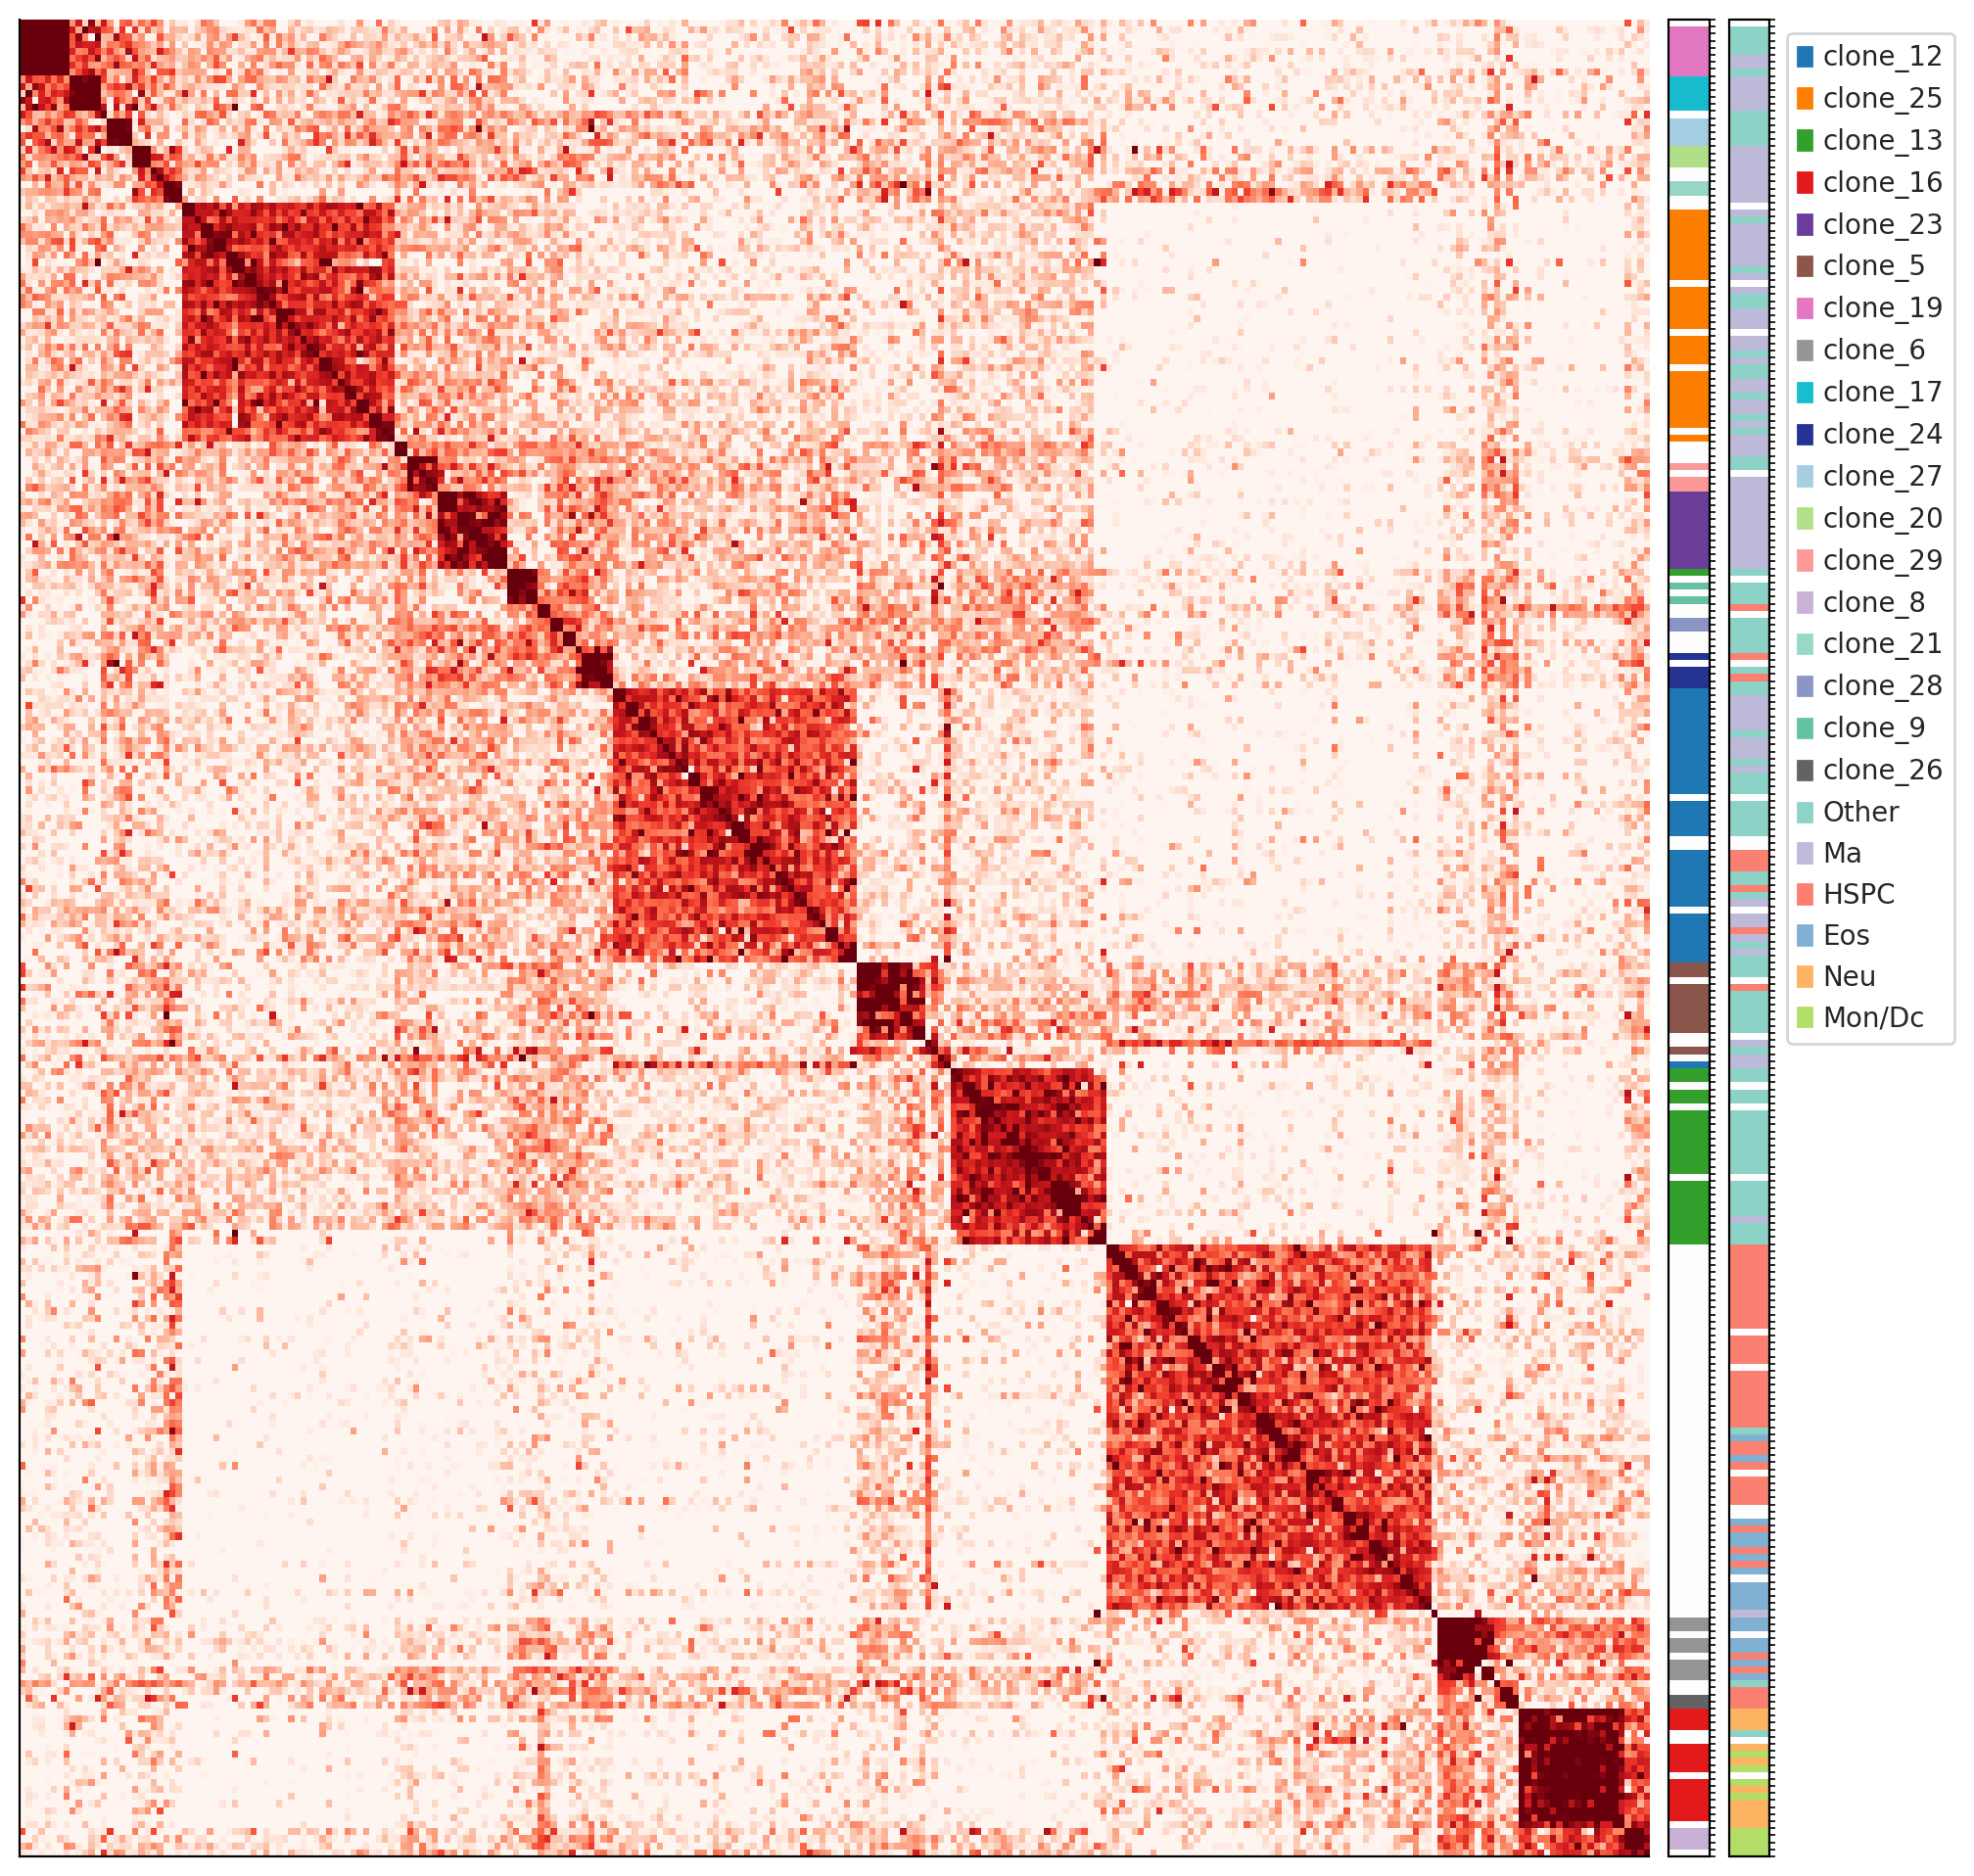

In [78]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
    heatmap_additional_key_list=['celltype']
)


## cells with valid barcode

In [79]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/source_all_neutral_thresh_20240713_scMultiOmicsseq_human_HSC_CMY_DNApart_merge_20240413_20240528_20240708_readNcutoff_3_0.1_0.4_500bp_readcutoff1_minCov2_met_ExcludeSex0.h5ad')

Only considering the two last: ['.4_500bp_readcutoff1_minCov2_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.4_500bp_readcutoff1_minCov2_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (178, 126412)
update sample
Similarity shape mismatch ((178, 261))
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 178/178 [00:05<00:00, 33.92it/s]


duration: 5.562777519226074
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|          | 6/1000 [00:00<00:00, 1104.59it/s]


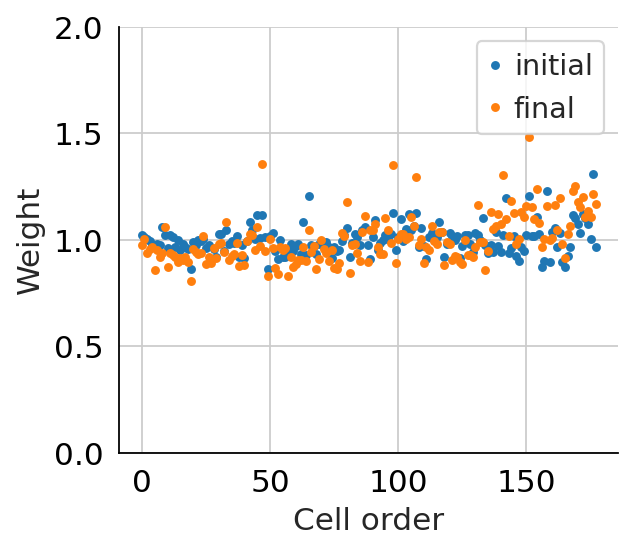

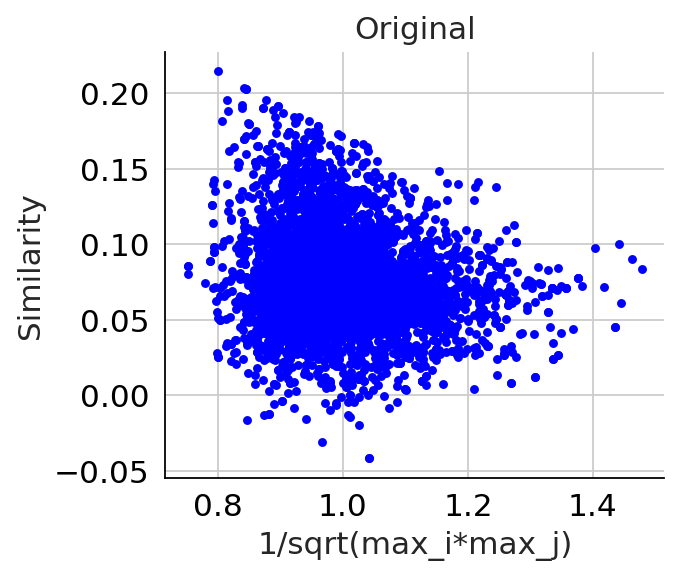

std: 0.022


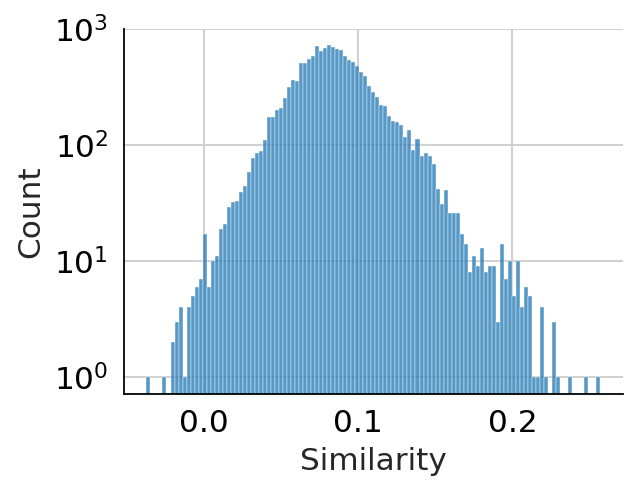

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity   entropy  wassertein  \
0  clone_12          36  0.972222    0.972222  0.035421    0.027778   
1  clone_13          23  0.956522    0.956522  0.057039    0.043478   
2  clone_16          13  1.000000    1.000000  0.000000    0.000000   
3  clone_17           5  1.000000    1.000000  0.000000    0.000000   
4  clone_19           7  1.000000    1.000000  0.000000    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.075000           0.205556        0.927576           0.655556  
1         0.121739           0.200000        0.921778           0.691304  
2         0.092308           0.138462        0.962582           0.738462  
3         0.000000           0.200000        1.000000           0.760000  
4         0.085714           0.185714        0.969468           0.771429  
mean continuity: 0.9904857756307032
mean accuracy: 0.9904857756307032
mean entropy: 0.01298006

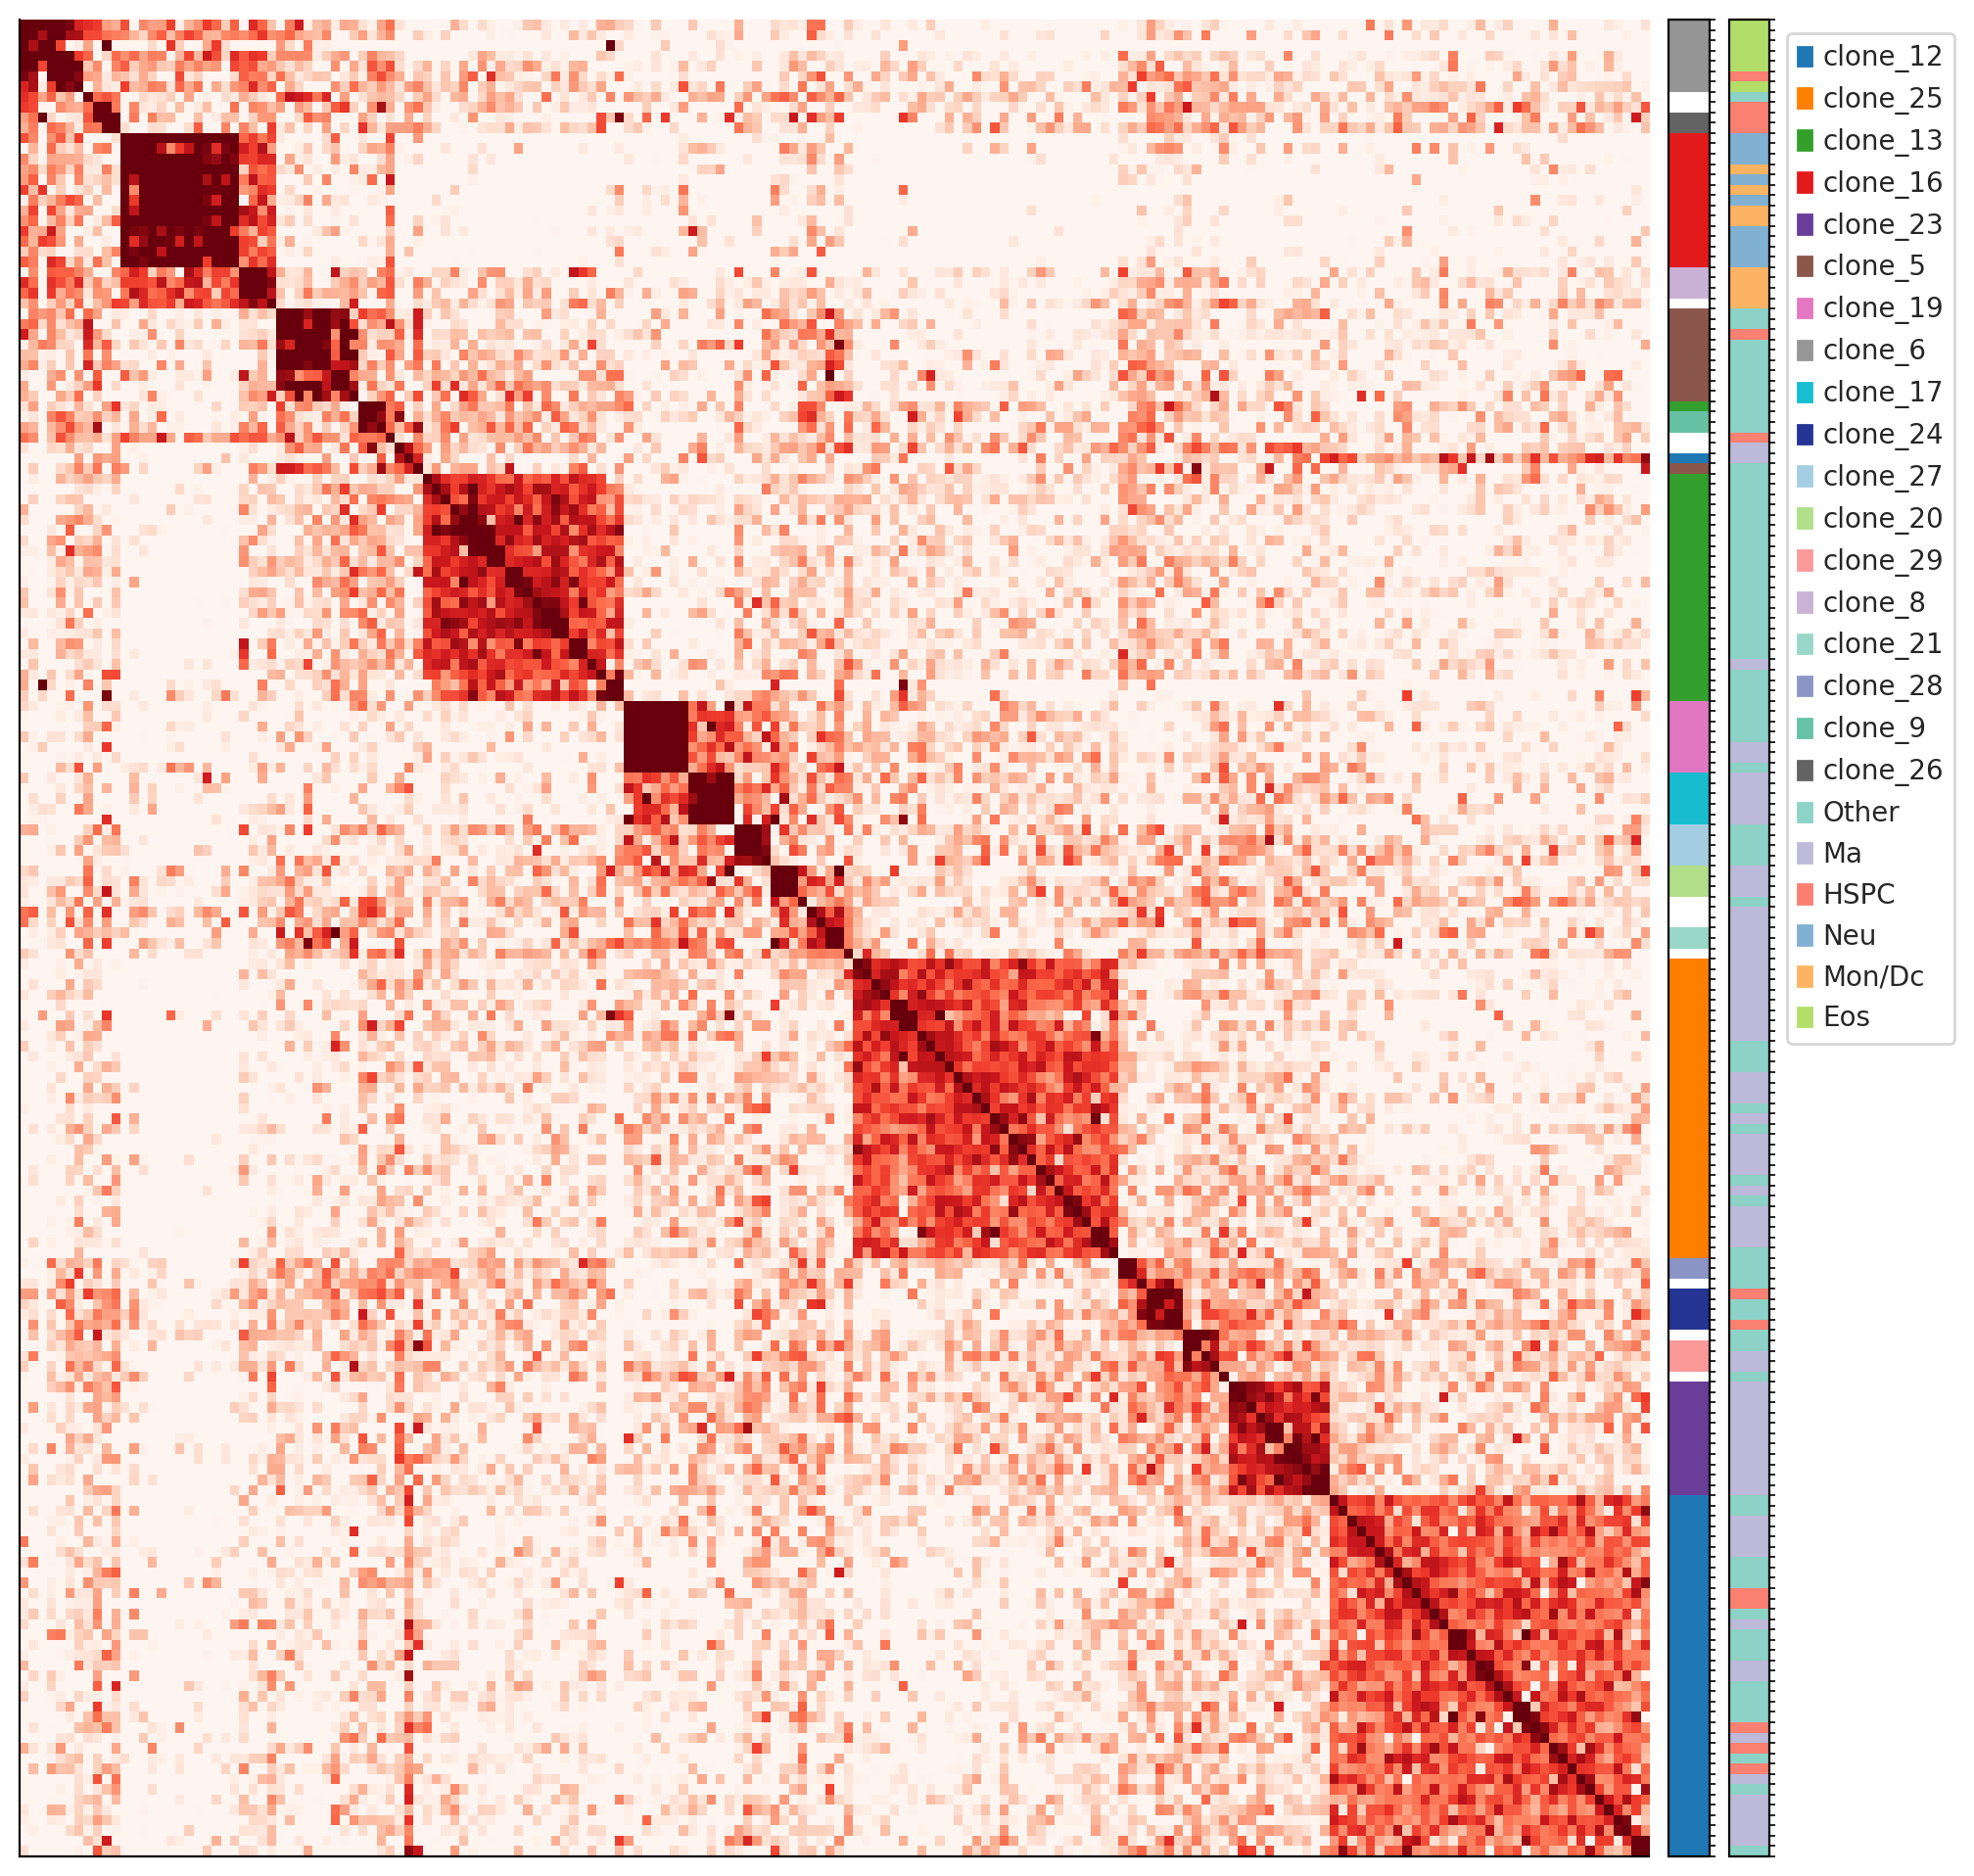

In [83]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata[adata.obs['clone_id'].notna()],
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
    heatmap_additional_key_list=['celltype']
)


# mouse_embryo (Fig5, ED.Fig5)

In [29]:
data_sets = 'mouse_embryo'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 167; config samples: 167; merged samples: 167
Genome reference: mm10


In [30]:
clone_key = 'clone_id'

## 2-Cell

In [31]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/stage_2-Cell_neutral_thresh_Guo_2017_mouse_embryos_ICM_0.4_0.6_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (25, 124505)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 25/25 [00:00<00:00, 115.32it/s]


duration: 0.27074670791625977
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|          | 3/1000 [00:00<00:00, 1829.71it/s]


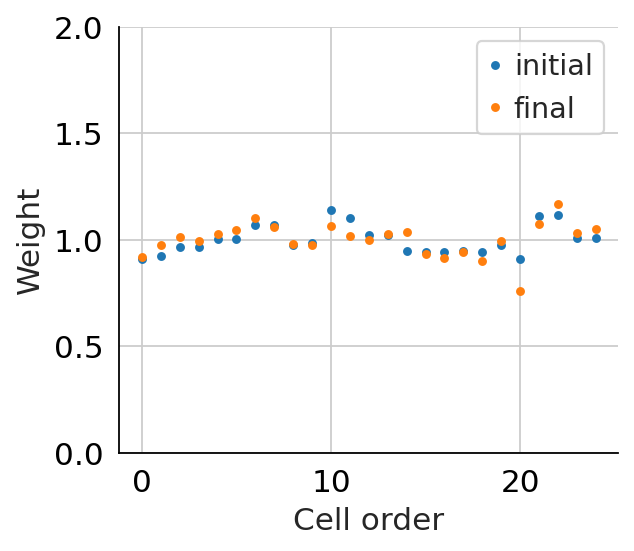

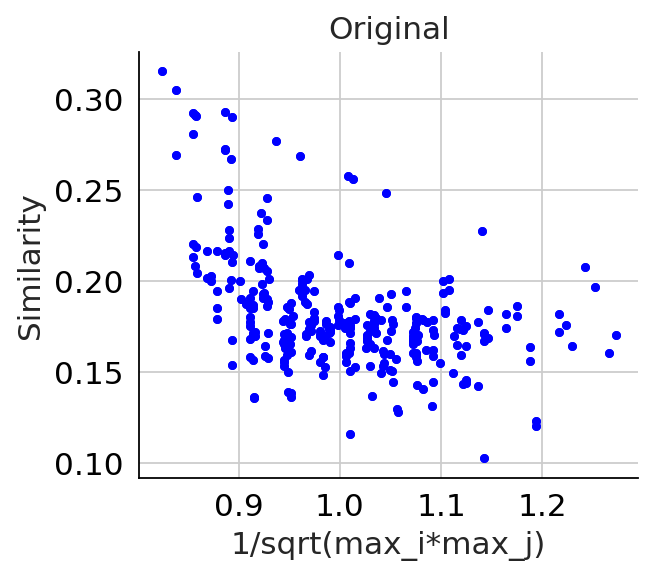

std: 0.038


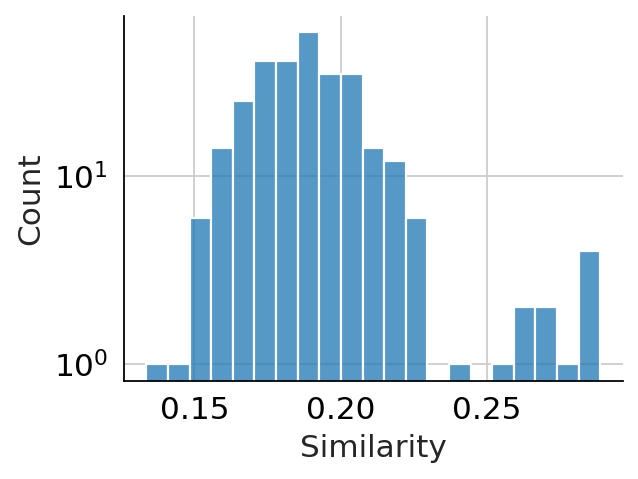

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  embryo_0           2       1.0         1.0      0.0         0.0   
1  embryo_1           2       1.0         1.0      0.0         0.0   
2  embryo_2           2       1.0         1.0      0.0         0.0   
3  embryo_3           2       1.0         1.0      0.0         0.0   
4  embryo_4           2       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0              0.1               0.55             0.9               0.45  
1              0.1               0.55             0.9               0.45  
2              0.1               0.55             0.9               0.45  
3              0.1               0.55             0.9               0.45  
4              0.1               0.55             0.9               0.45  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuit

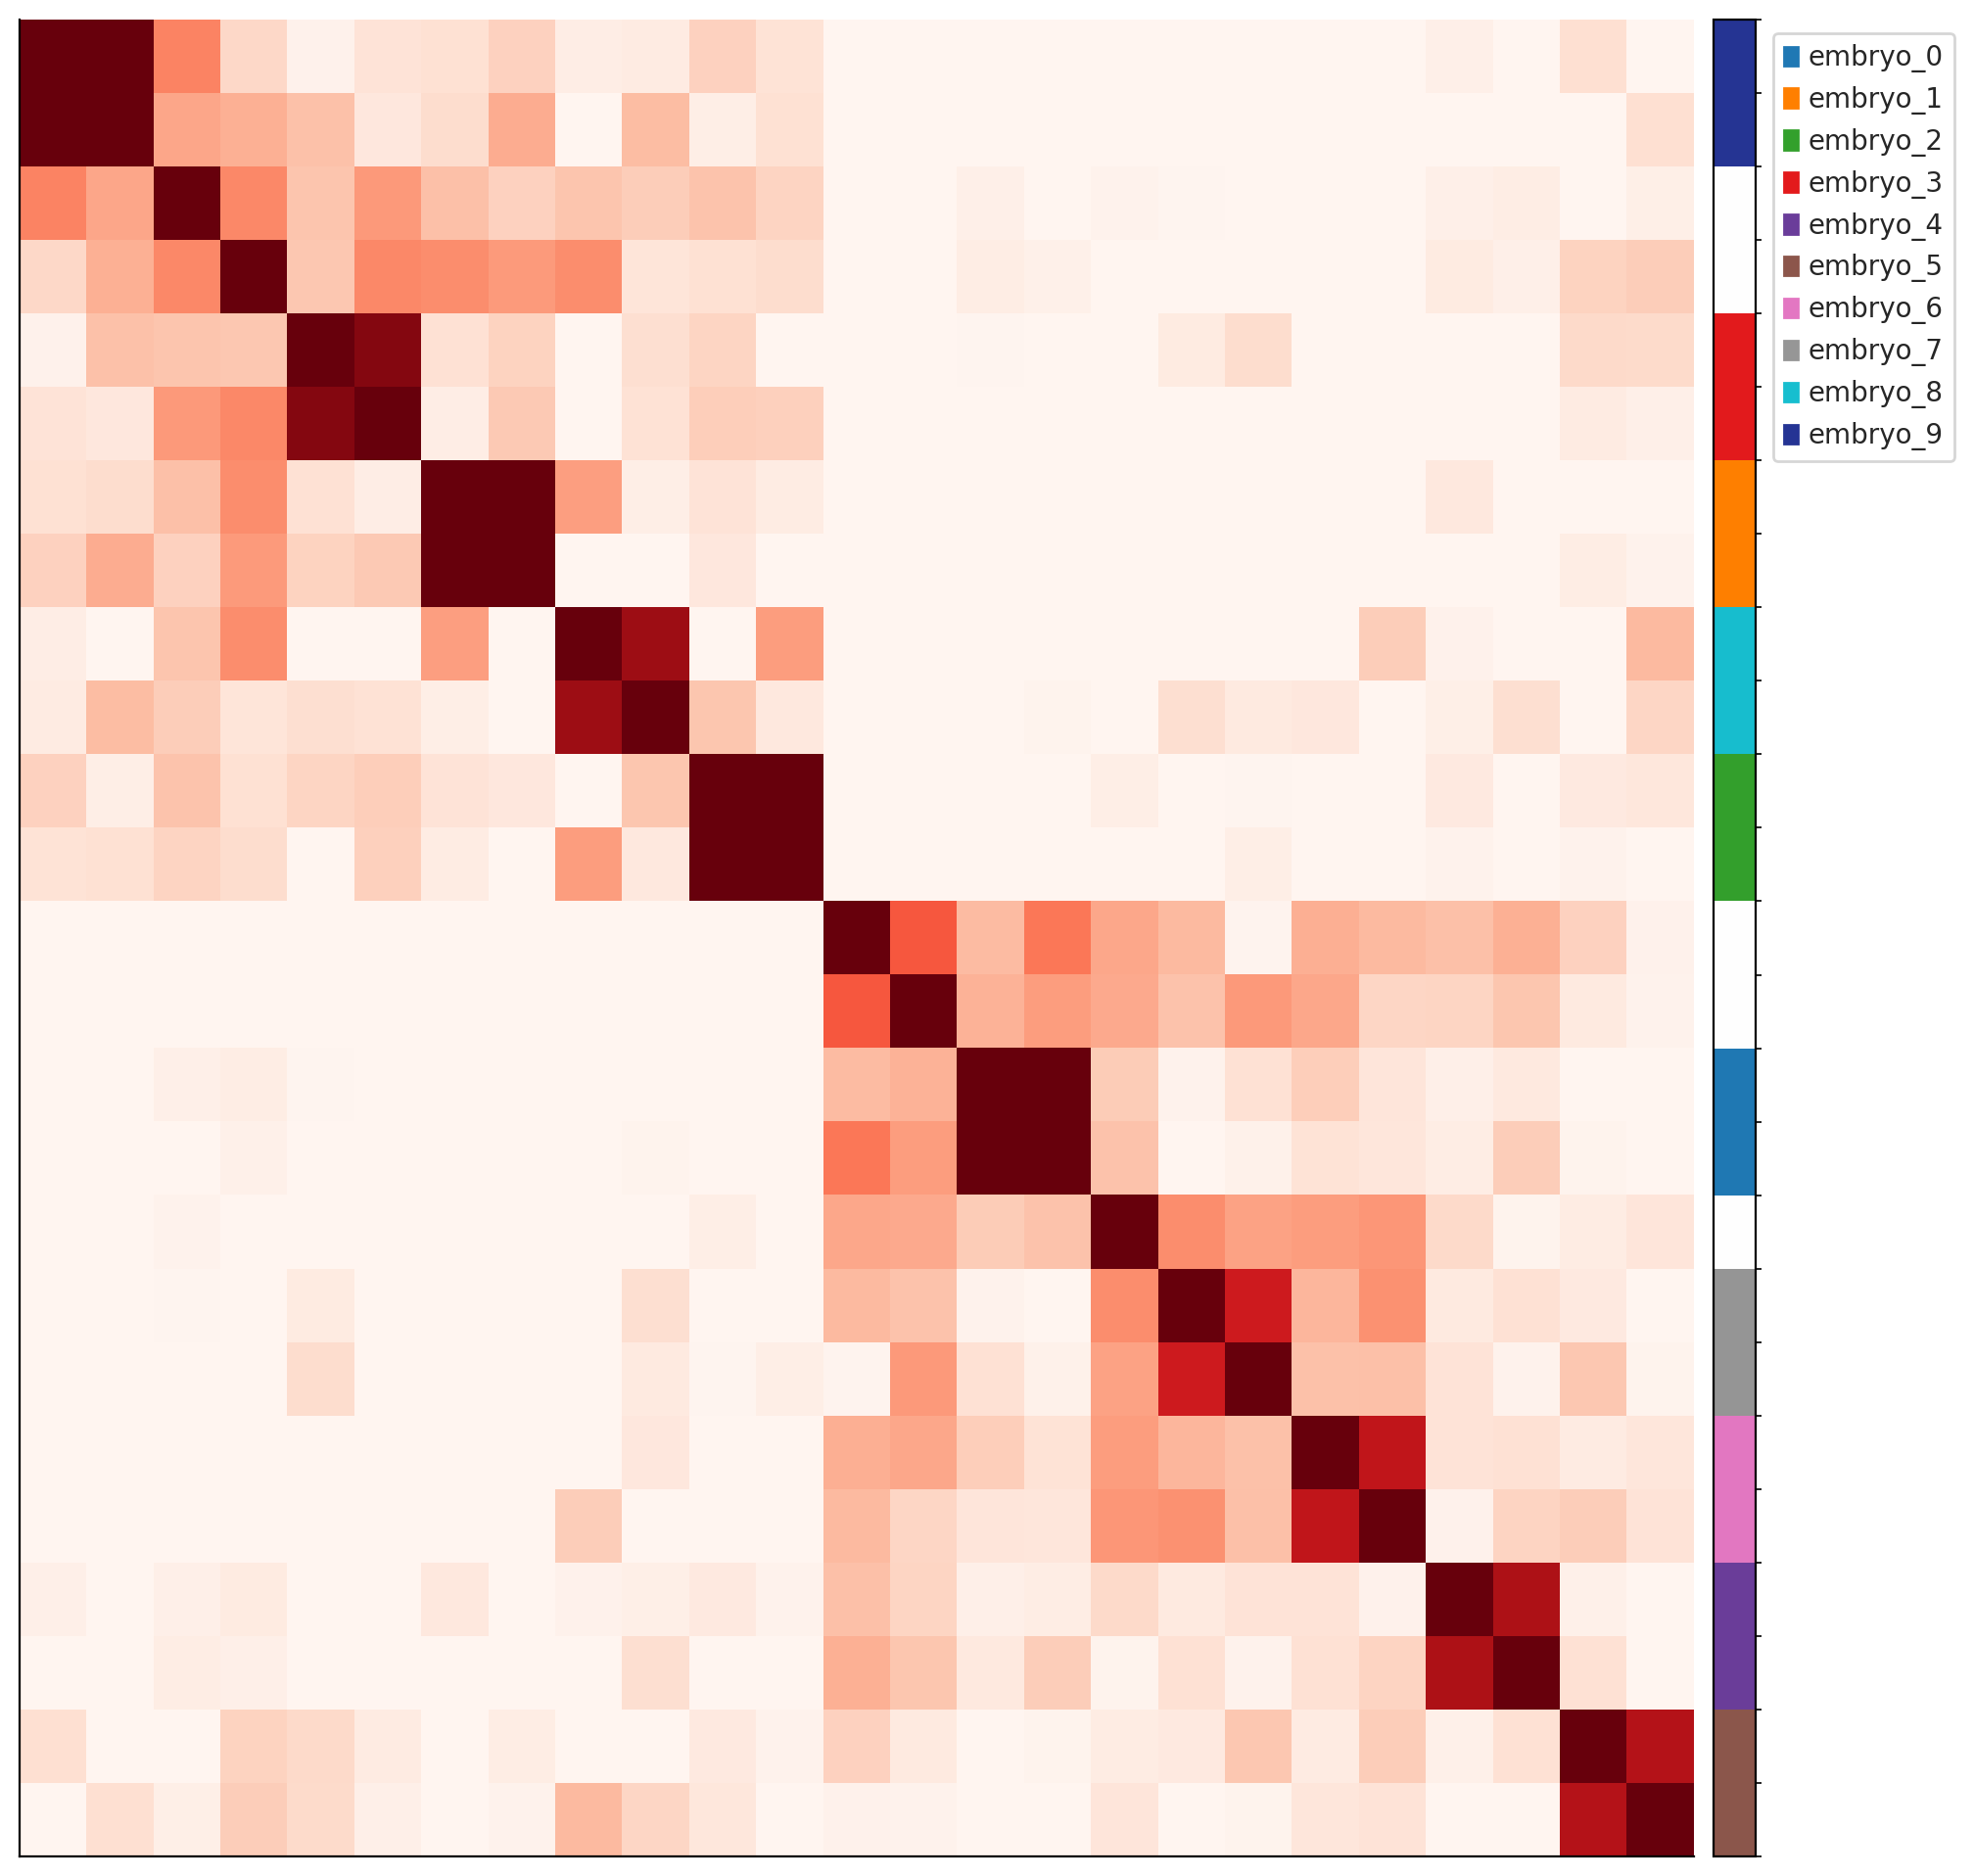

In [32]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## 4-Cell

In [33]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/stage_4-Cell_neutral_thresh_Guo_2017_mouse_embryos_ICM_0.4_0.6_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (23, 106644)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 23/23 [00:00<00:00, 151.60it/s]


duration: 0.19359087944030762
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|          | 2/1000 [00:00<00:00, 1419.15it/s]


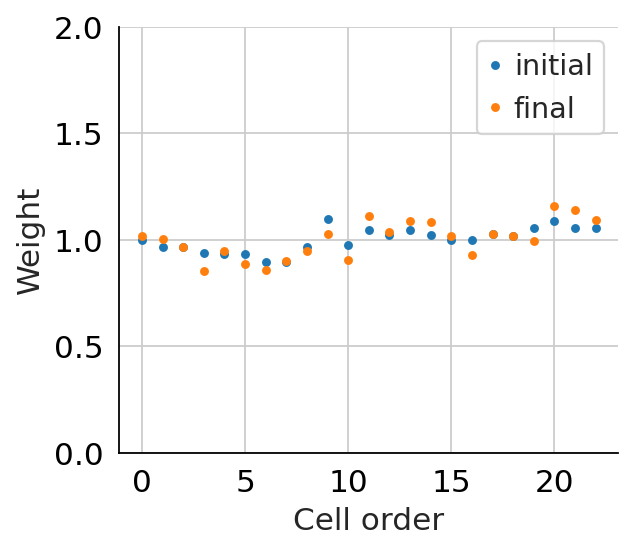

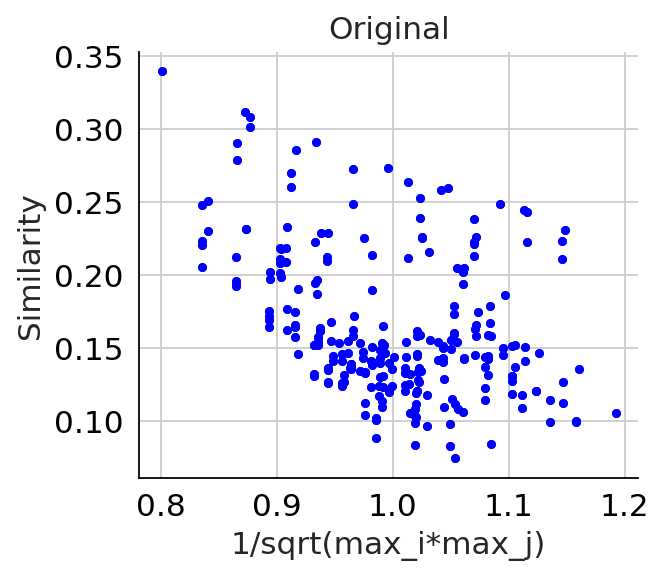

std: 0.042


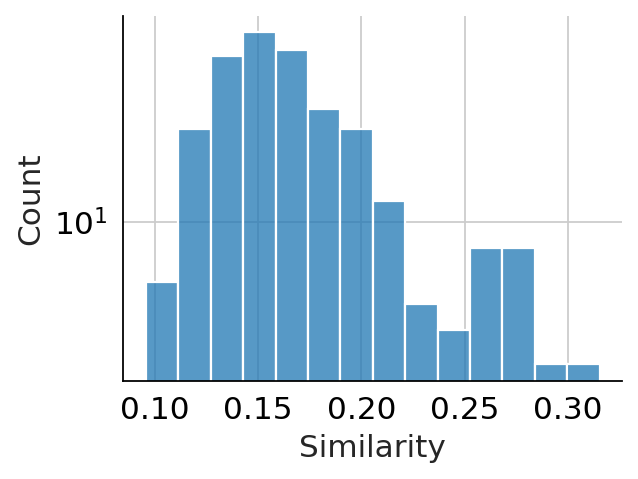

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  embryo_0           4       1.0         1.0      0.0         0.0   
1  embryo_1           4       1.0         1.0      0.0         0.0   
2  embryo_2           4       1.0         1.0      0.0         0.0   
3  embryo_3           3       1.0         1.0      0.0         0.0   
4  embryo_4           3       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.275000           0.400000        0.840564           0.450000  
1         0.375000           0.450000        0.790564           0.500000  
2         0.250000           0.375000        0.875000           0.450000  
3         0.000000           0.333333        1.000000           0.600000  
4         0.133333           0.400000        0.915876           0.466667  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuit

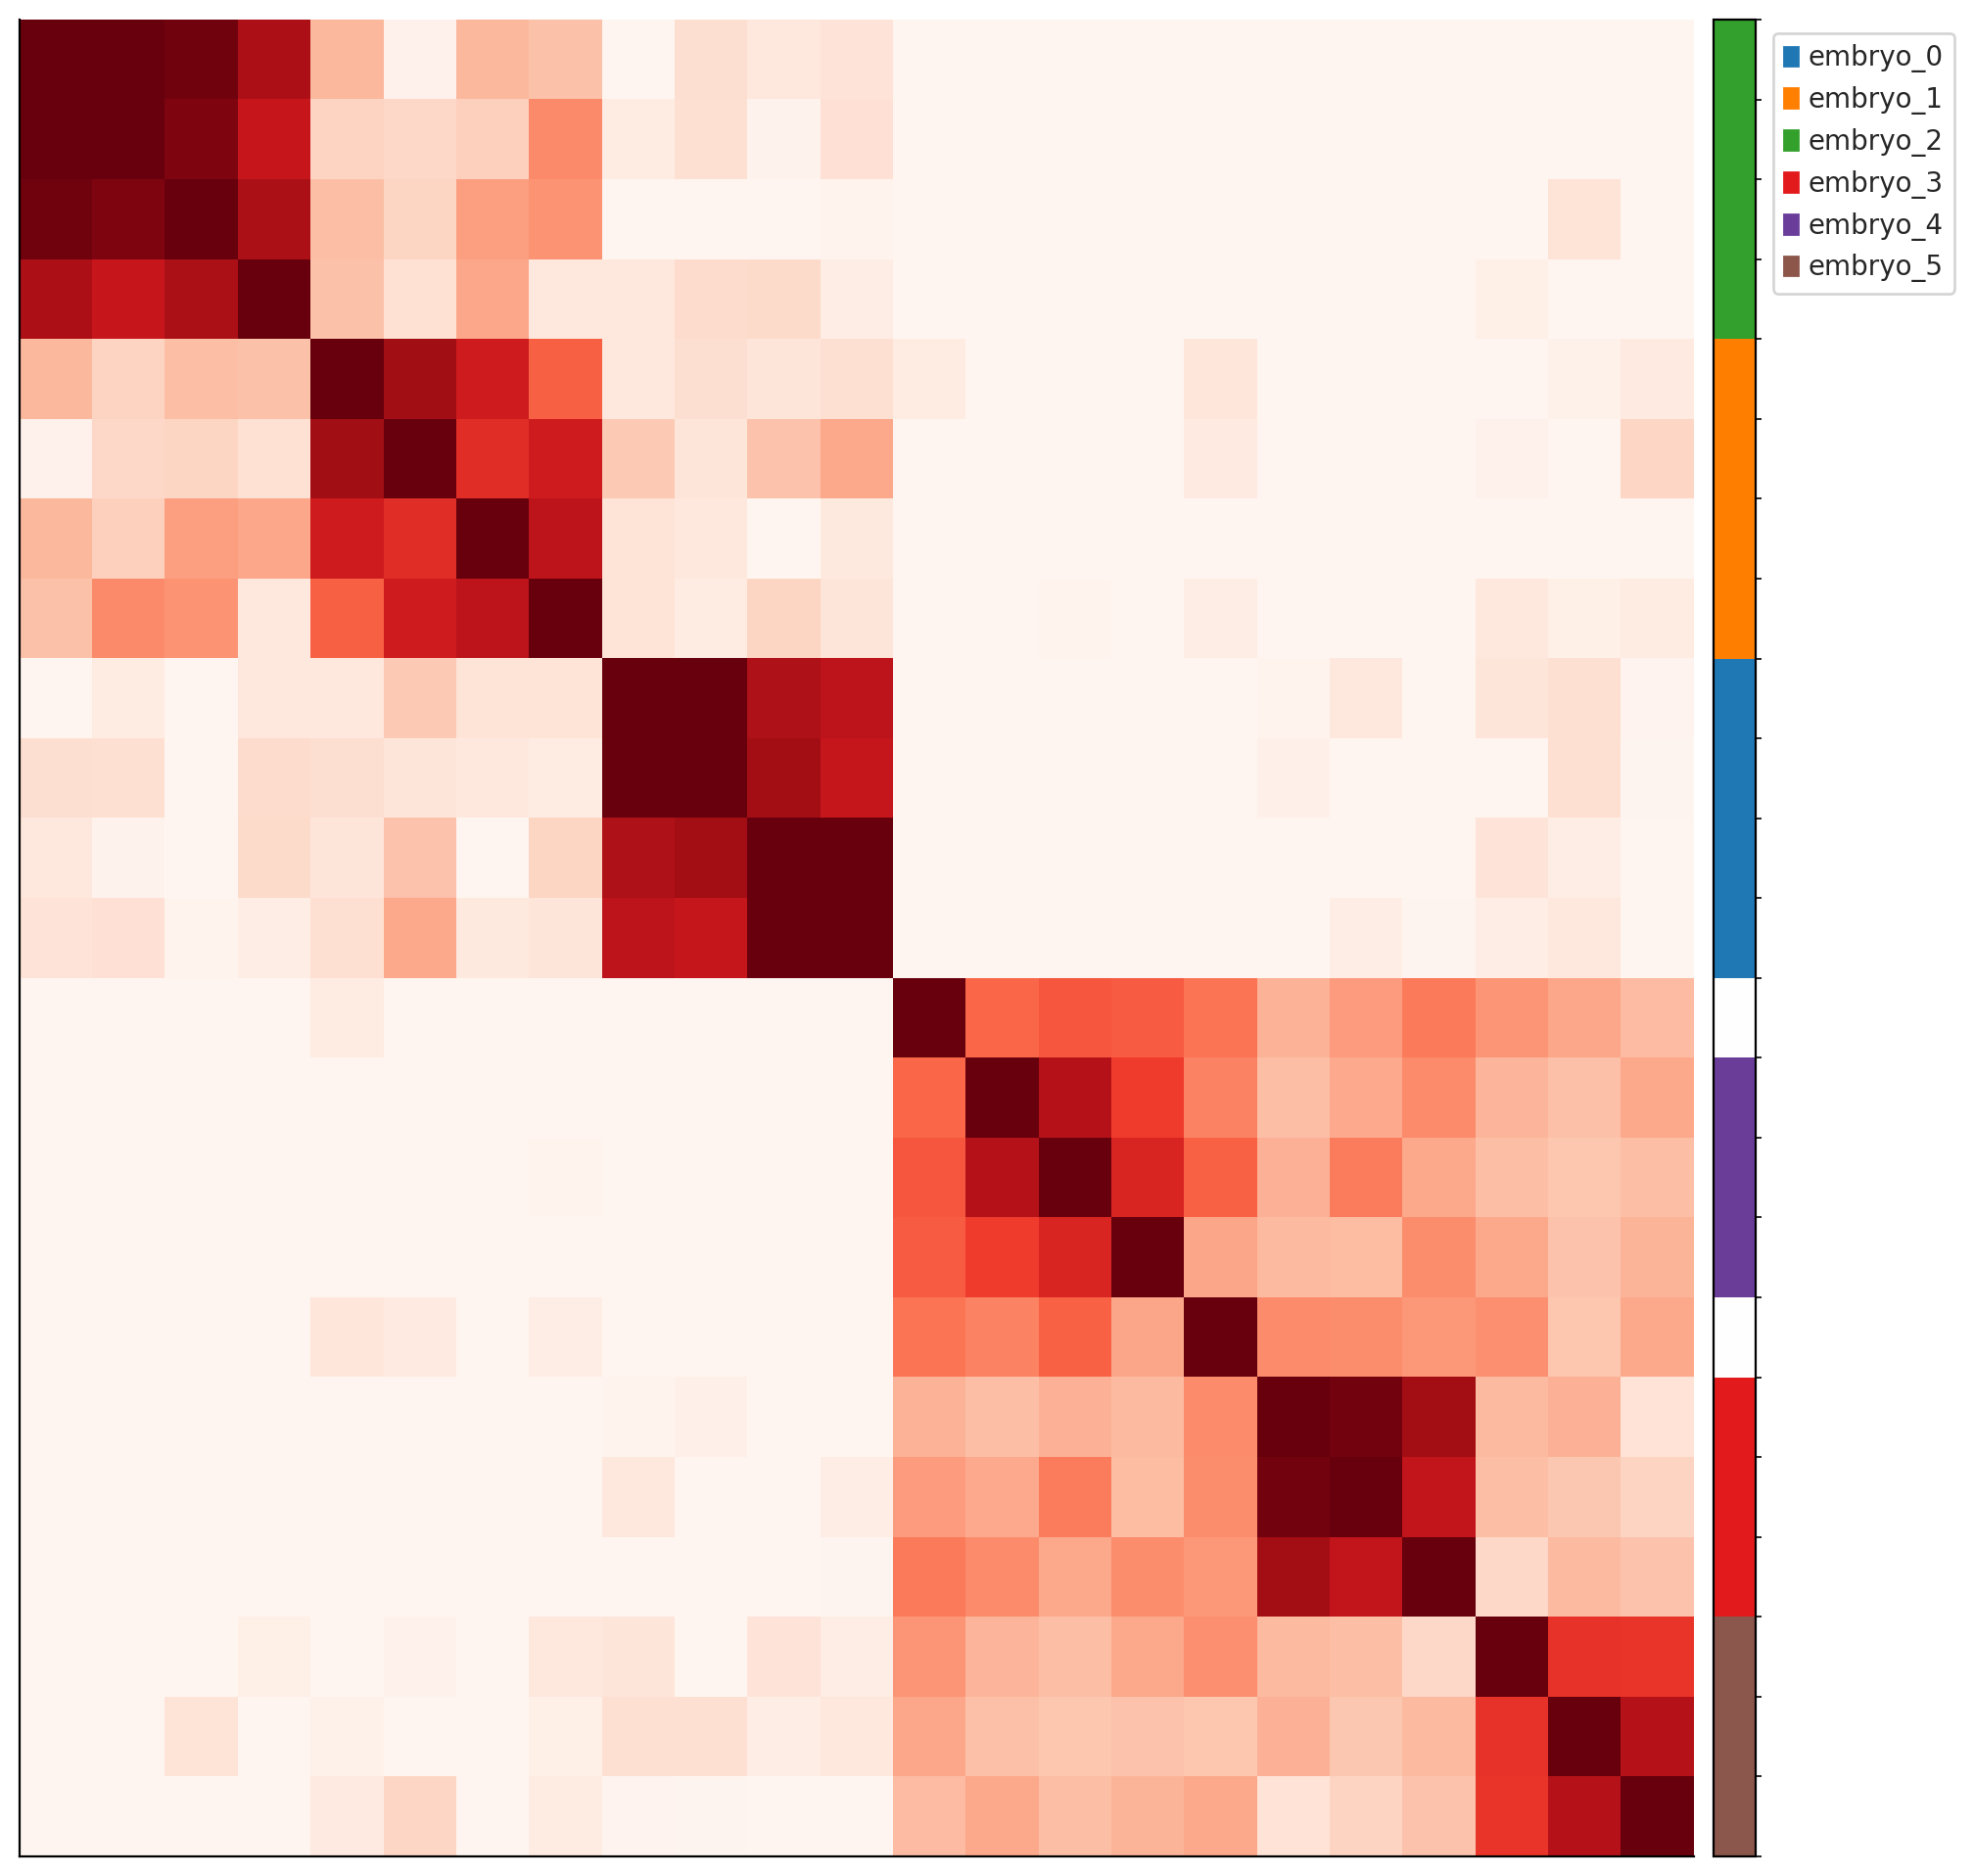

In [34]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## 8-Cell

In [35]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/stage_8-Cell_neutral_thresh_Guo_2017_mouse_embryos_ICM_0.4_0.6_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (35, 148549)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 35/35 [00:00<00:00, 64.58it/s]


duration: 0.6306774616241455
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|          | 3/1000 [00:00<00:00, 2129.09it/s]


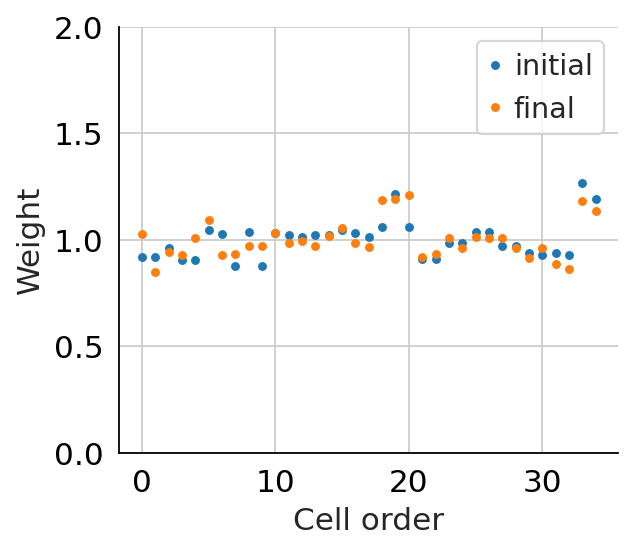

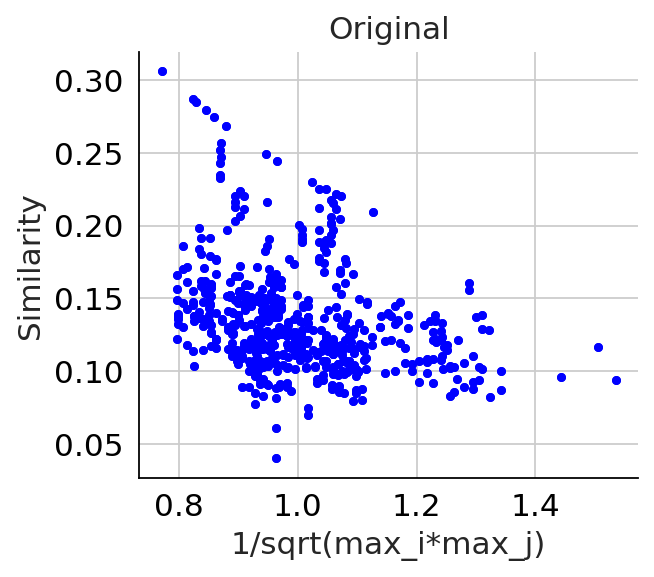

std: 0.036


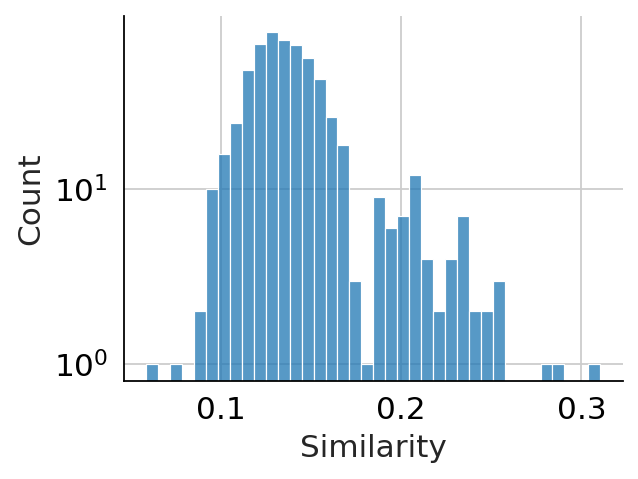

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  embryo_0           8       1.0         1.0      0.0         0.0   
1  embryo_1           4       1.0         1.0      0.0         0.0   
2  embryo_2           4       1.0         1.0      0.0         0.0   
3  embryo_3           4       1.0         1.0      0.0         0.0   
4  embryo_4           4       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0            0.225              0.300        0.877043              0.500  
1            0.150              0.325        0.925000              0.525  
2            0.100              0.300        0.950000              0.600  
3            0.050              0.275        0.975000              0.575  
4            0.100              0.300        0.950000              0.575  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuit

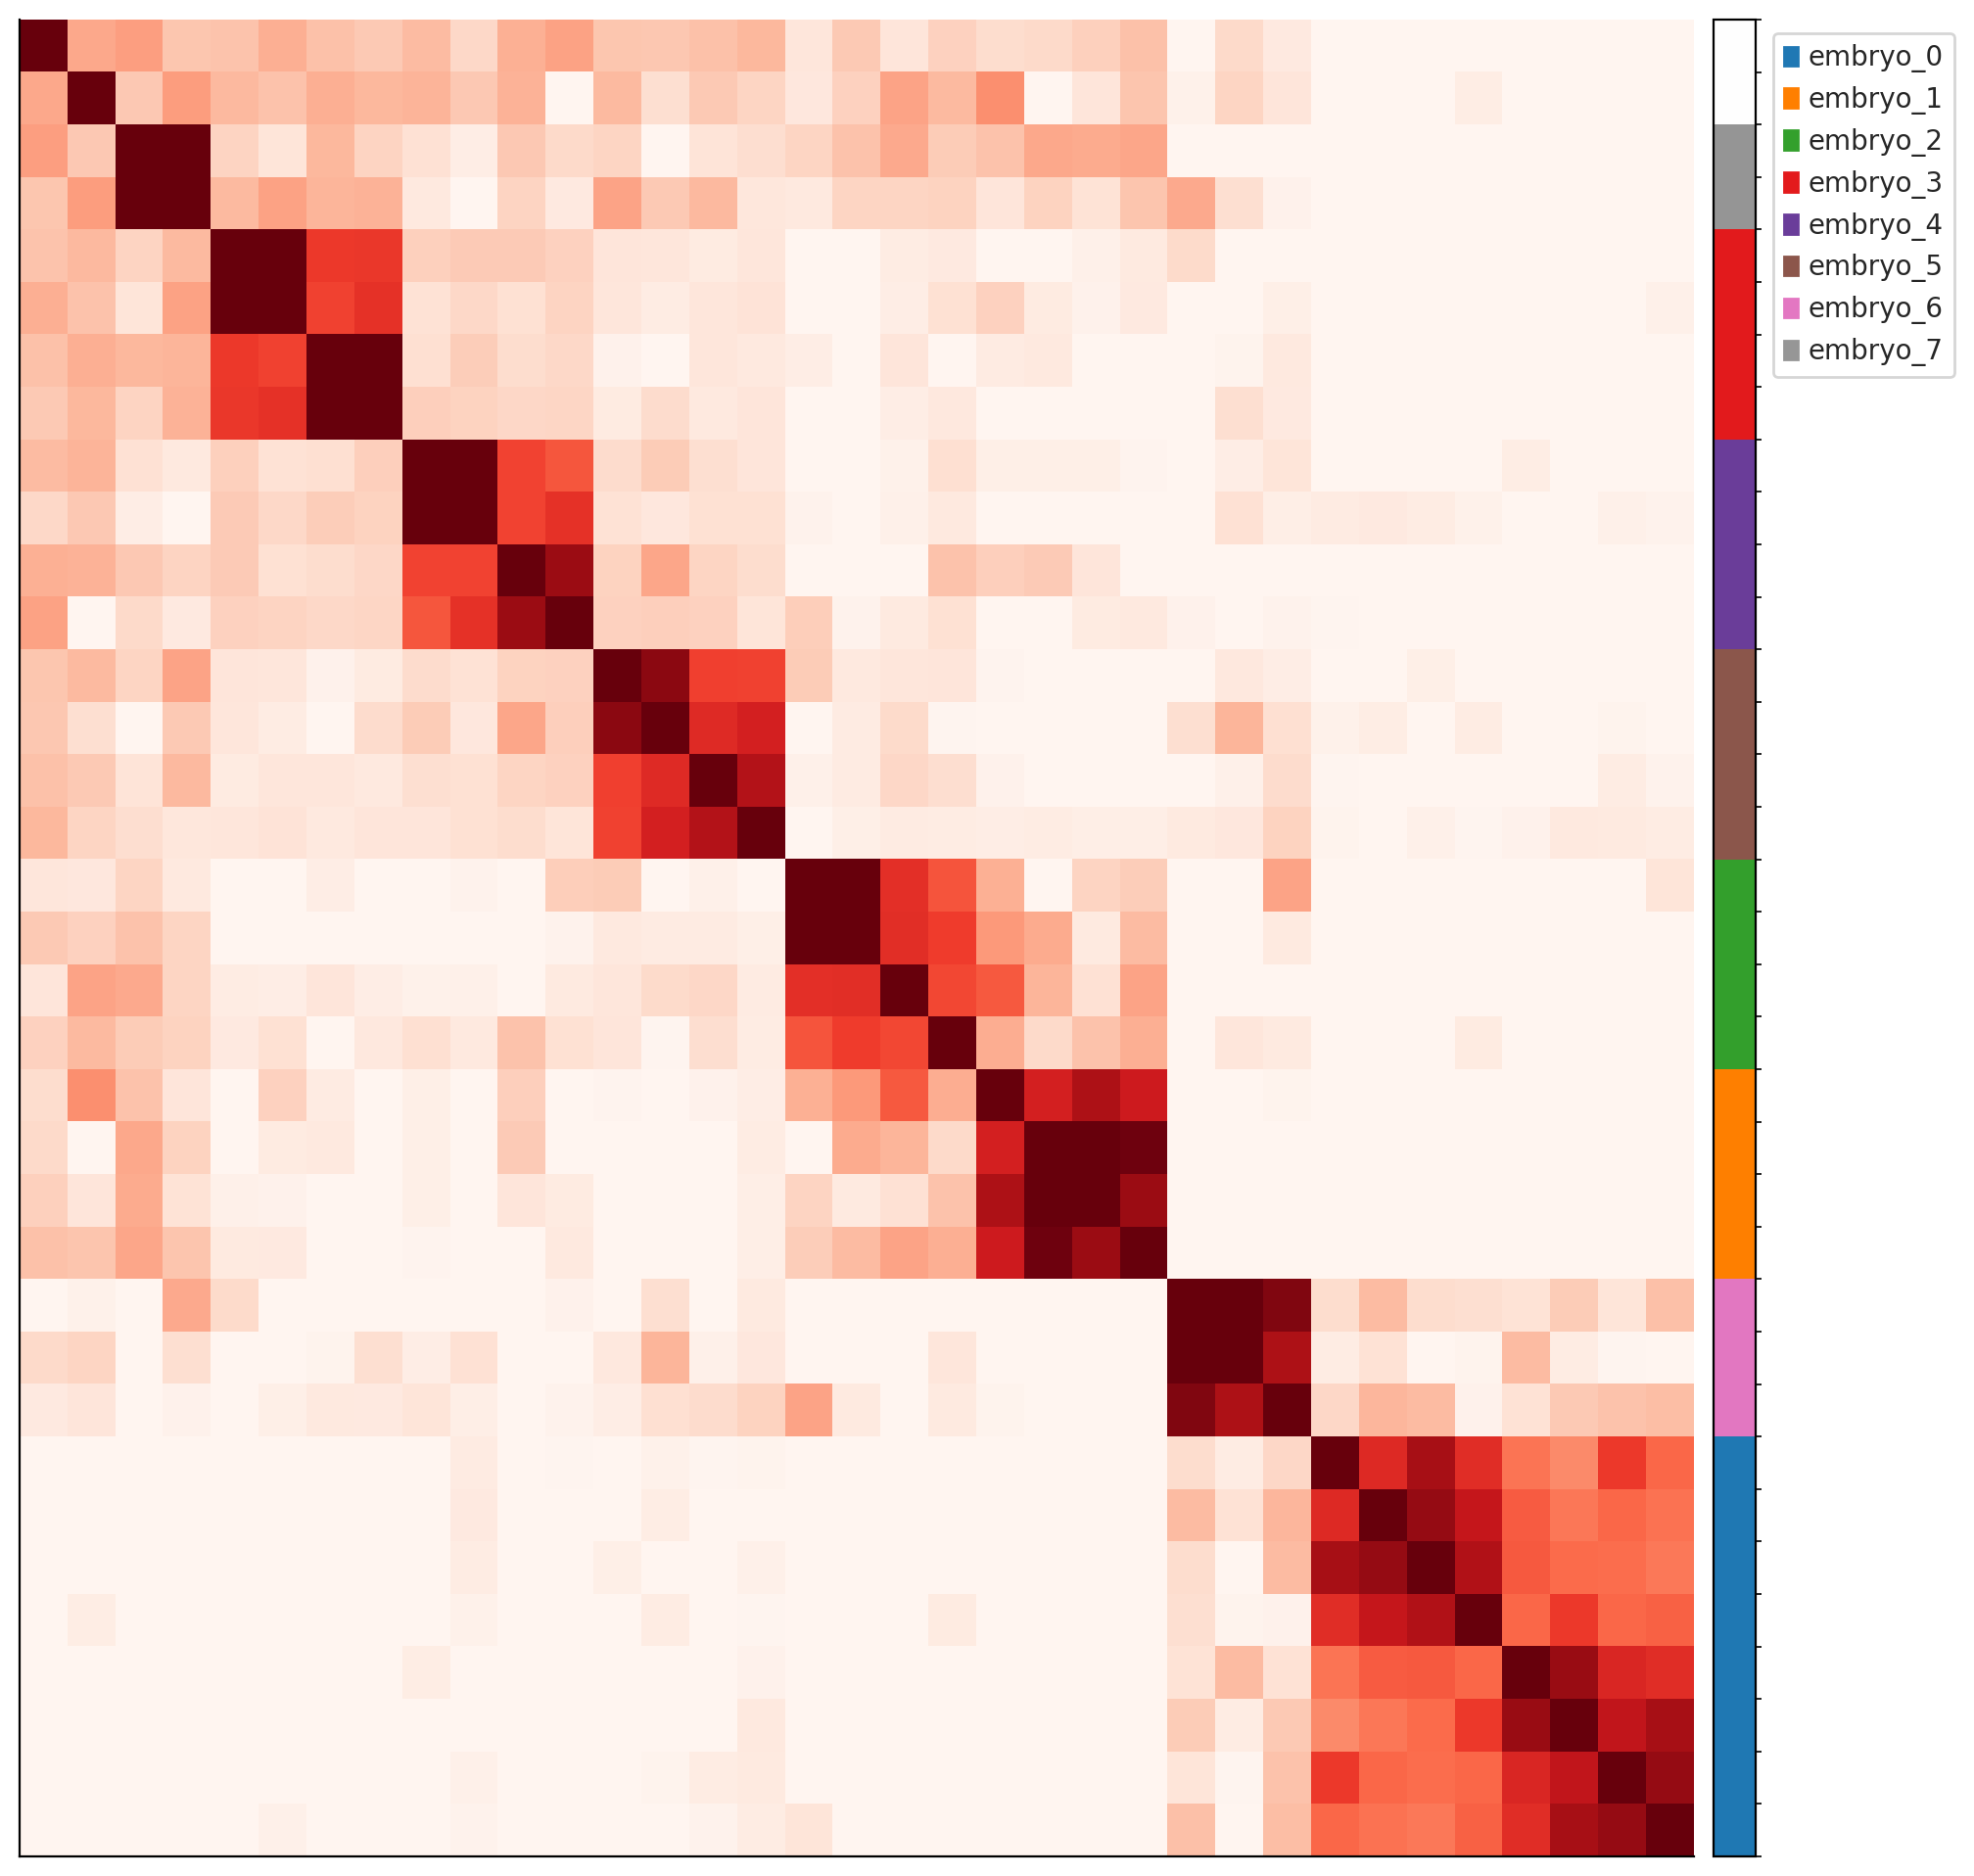

In [36]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## Morula

In [37]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/stage_Morula_neutral_thresh_Guo_2017_mouse_embryos_ICM_0.4_0.6_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (18, 132353)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 18/18 [00:00<00:00, 173.23it/s]


duration: 0.1441357135772705
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|          | 2/1000 [00:00<00:00, 1079.89it/s]


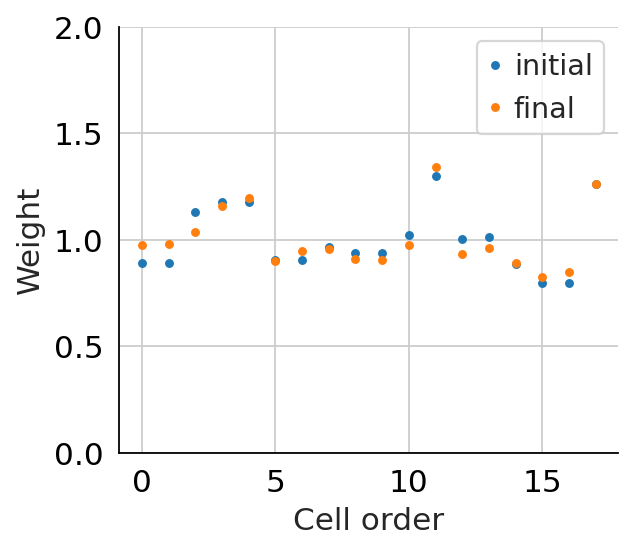

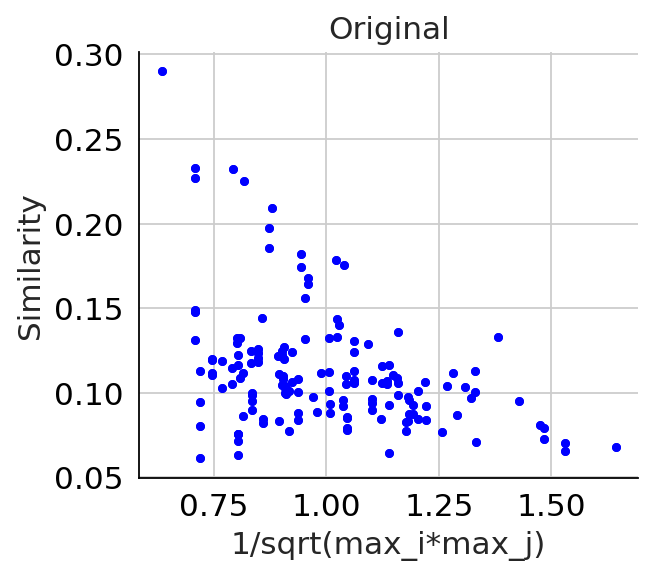

std: 0.075


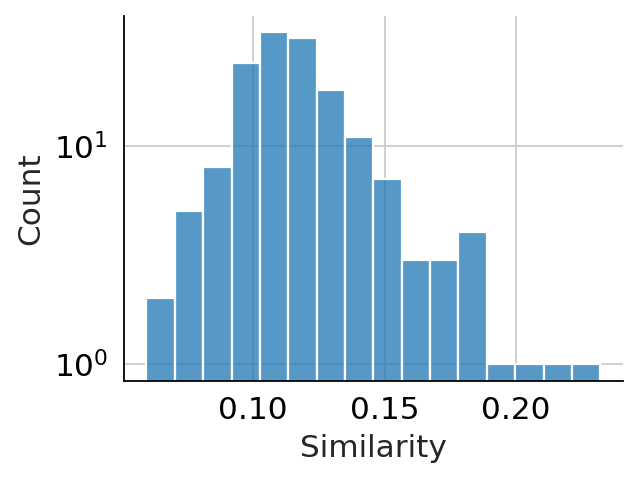

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity   entropy  wassertein  \
0  embryo_0           5       0.8         0.8  0.310918         0.2   
1  embryo_1           4       1.0         1.0  0.000000         0.0   
2  embryo_3           3       1.0         1.0  0.000000         0.0   
3  embryo_4           2       1.0         1.0  0.000000         0.0   
4  embryo_5           2       1.0         1.0  0.000000         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0             0.36           0.460000        0.763044               0.34  
1             0.30           0.400000        0.850000               0.45  
2             0.20           0.433333        0.873814               0.50  
3             0.10           0.550000        0.900000               0.45  
4             0.10           0.550000        0.900000               0.45  
mean continuity: 0.96
mean accuracy: 0.96
mean entropy: 0.06218350141651423
mean wassertein: 0

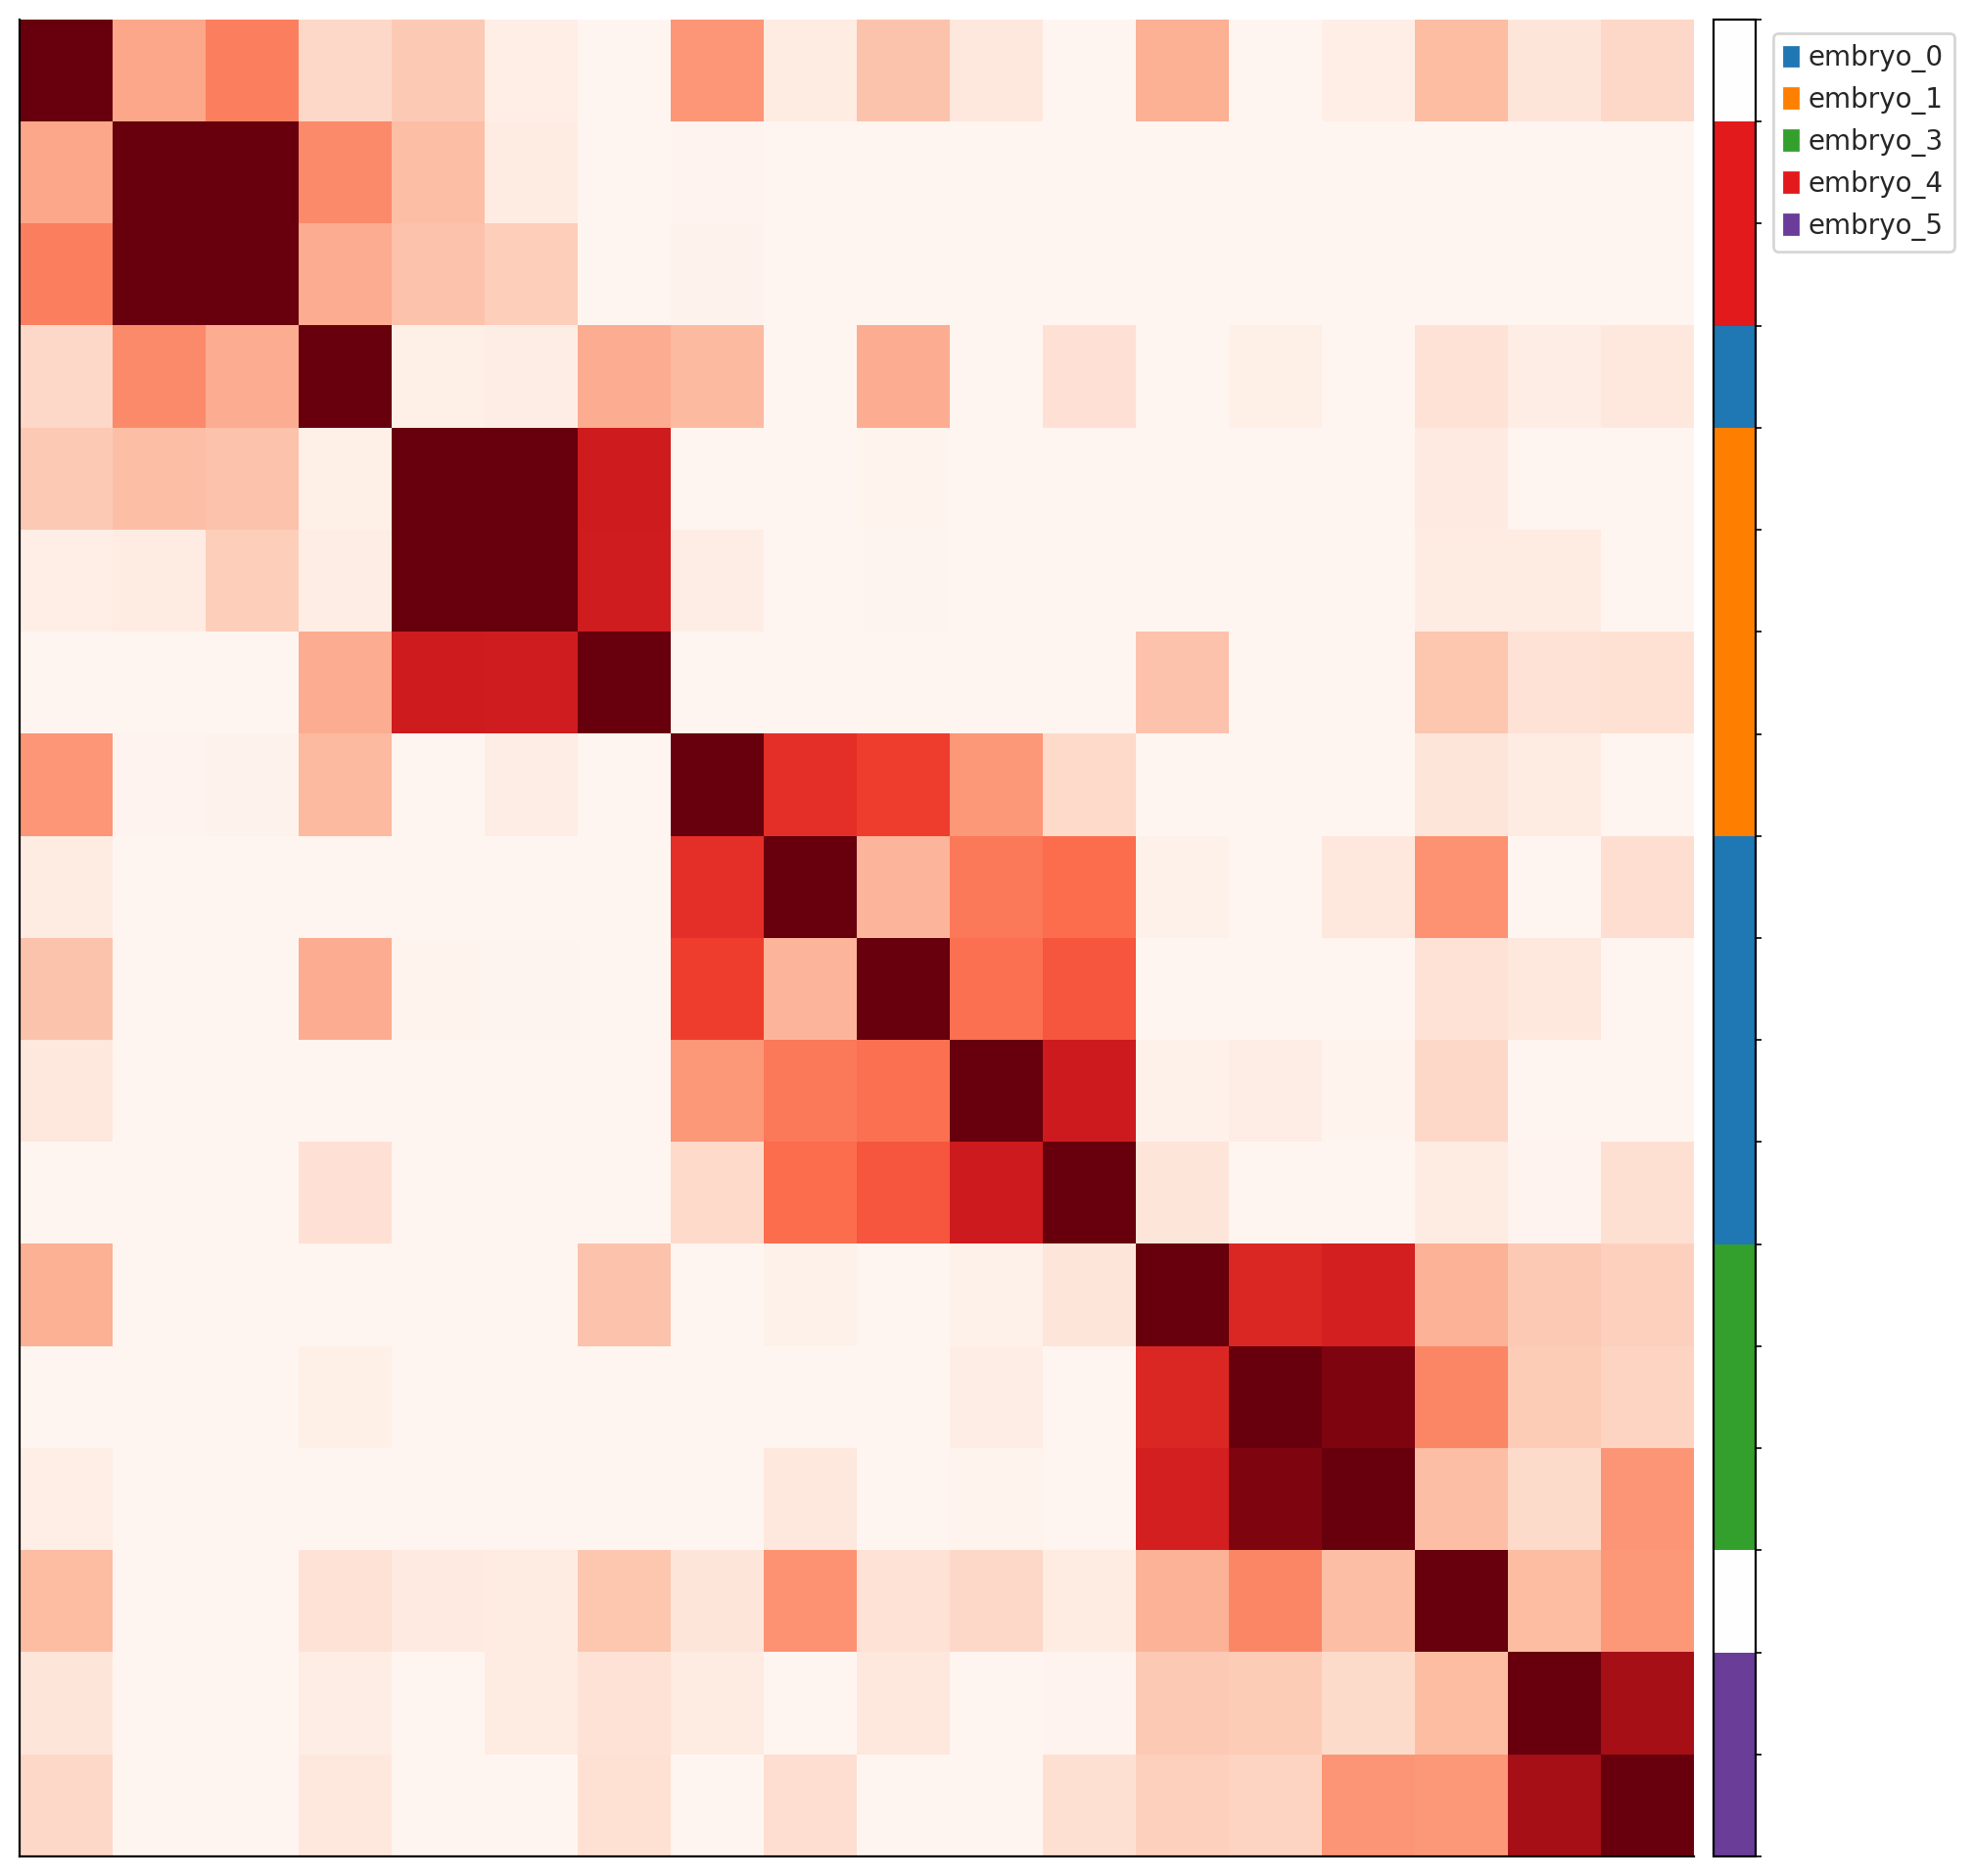

In [38]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## BlastoCyst

In [39]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/stage_BlastoCyst_neutral_thresh_Guo_2017_mouse_embryos_ICM_0.4_0.6_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (34, 124400)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 34/34 [00:00<00:00, 91.44it/s]


duration: 0.44214463233947754


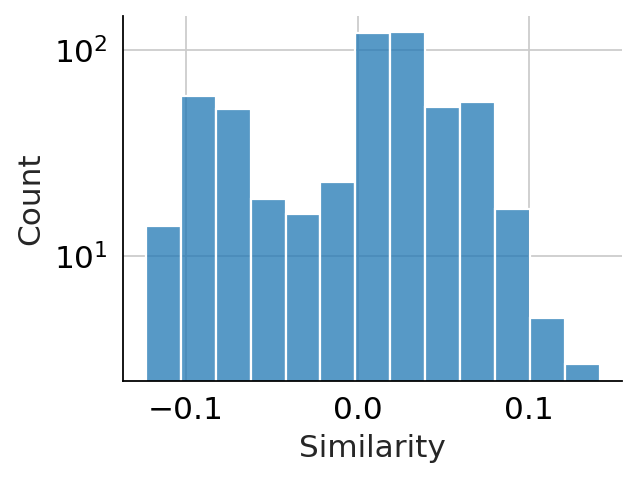

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity   entropy  wassertein  \
0  embryo_1           7  0.571429    0.857143  0.350945    0.142857   
1  embryo_2           2  0.000000    0.500000  1.000000    0.500000   
2  embryo_3           3  0.666667    0.666667  0.579380    0.333333   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.471429           0.657143        0.563522           0.314286  
1         0.200000           0.600000        0.800000           0.400000  
2         0.333333           0.533333        0.715876           0.366667  
mean continuity: 0.6746031746031745
mean accuracy: 0.41269841269841273
mean entropy: 0.6434418357607119
mean wassertein: 0.32539682539682535
mean random_continuity: 0.5968253968253968
mean random_accuracy: 0.3349206349206349
mean random_entropy: 0.6931326247071364
mean random_wassertein: 0.3603174603174603


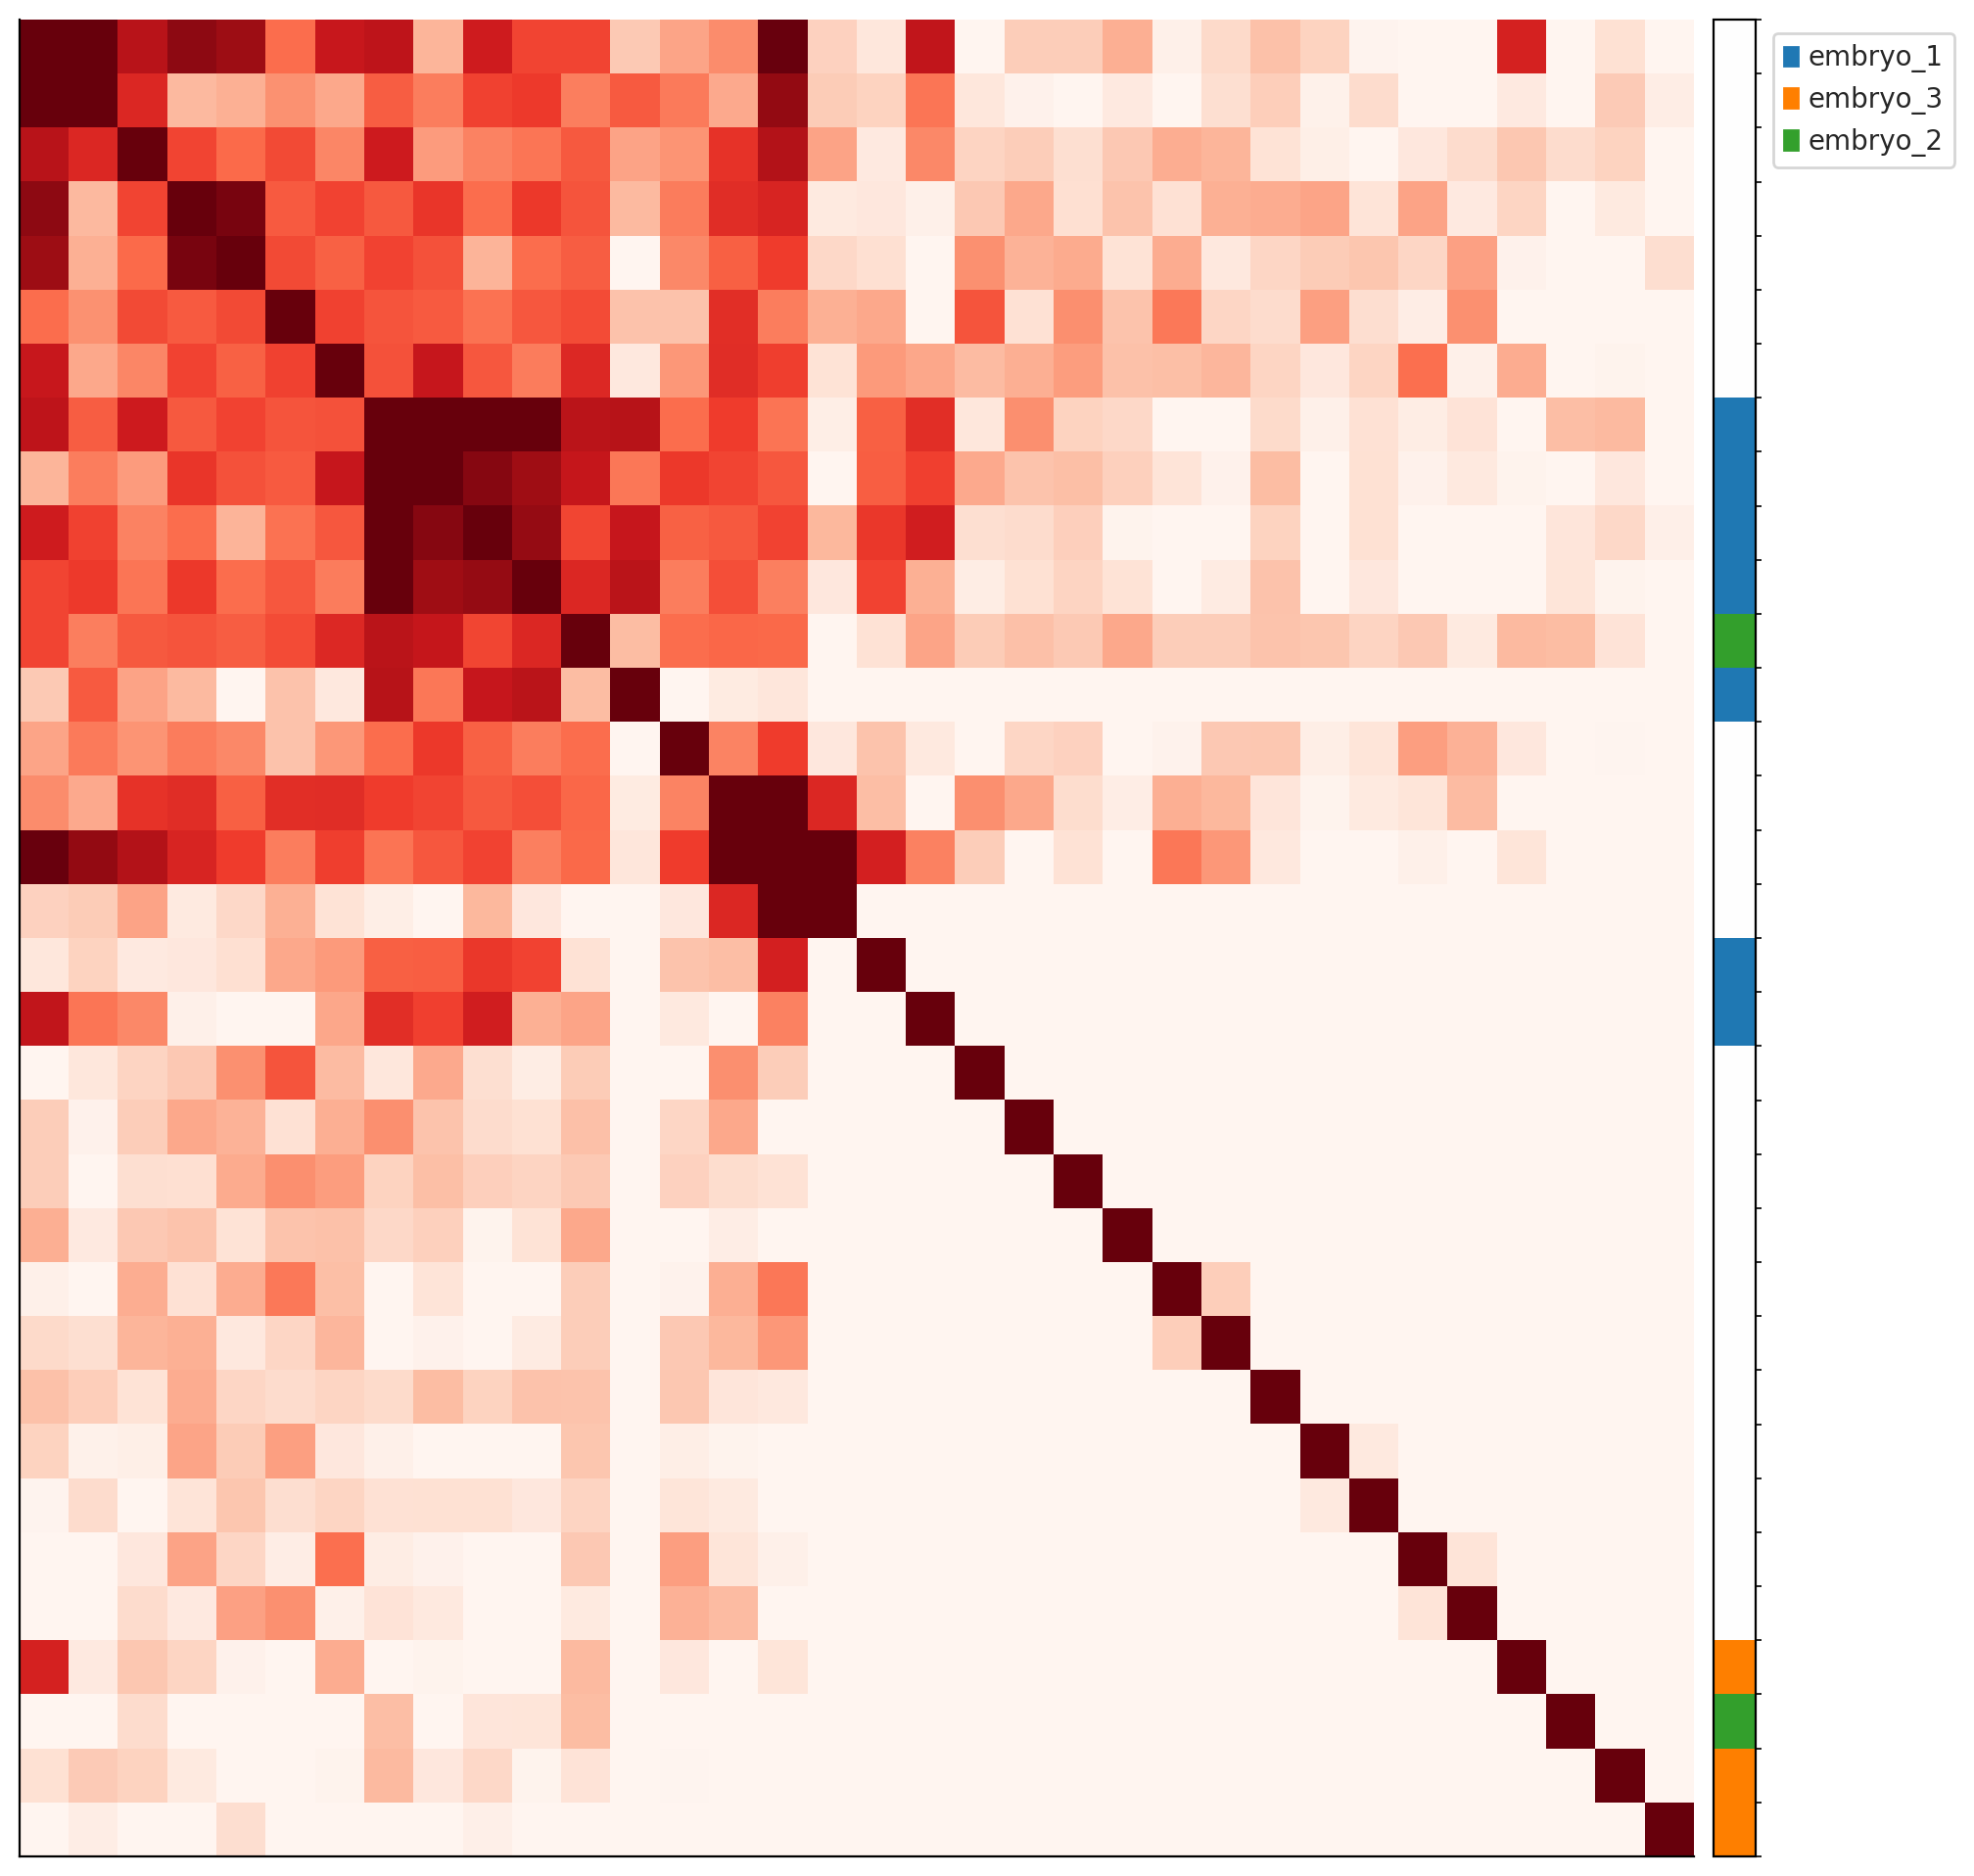

In [40]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=False,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


# human_embryo (Fig5, ED.Fig5)

In [41]:
data_sets = 'human_embryo'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 440; config samples: 440; merged samples: 440
Genome reference: GRCh38


In [42]:
clone_key = 'embryo'

## D5

In [43]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/lineage_D5_neutral_thresh_2022_human_embryo_spindle_transfer_onlymet_D6_readNcutoff_5_0.2_0.5_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (122, 427108)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 122/122 [00:25<00:00,  4.72it/s]


duration: 26.804603576660156
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|▏         | 13/1000 [00:00<00:00, 1773.66it/s]


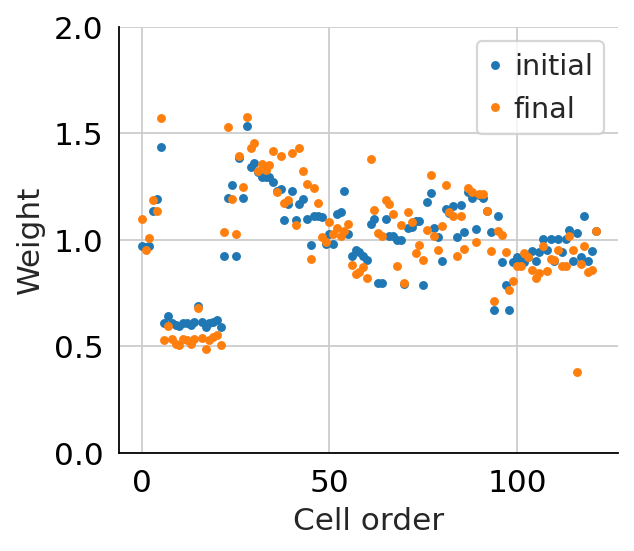

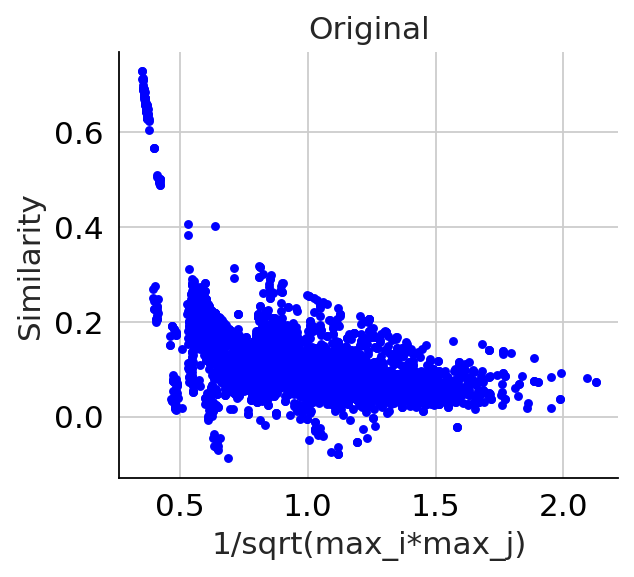

std: 0.085


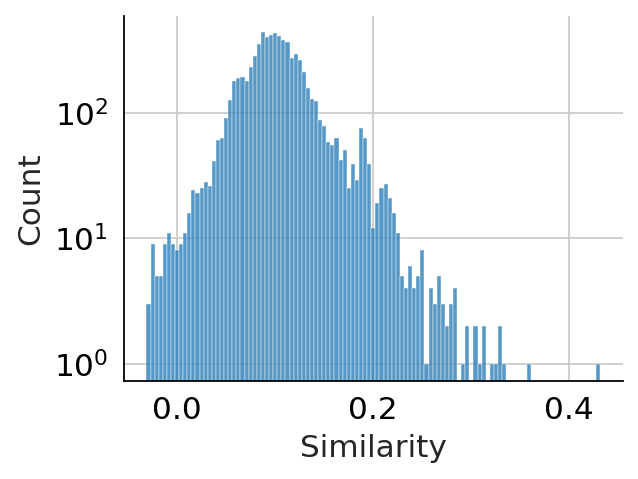

Reconstruction method: UPGMA
  clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   E11           3       1.0         1.0      0.0         0.0   
1   E12           3       1.0         1.0      0.0         0.0   
2   E15          16       1.0         1.0      0.0         0.0   
3    E2          18       1.0         1.0      0.0         0.0   
4   E23           4       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.066667           0.366667        0.957938           0.600000  
1         0.066667           0.366667        0.957938           0.633333  
2         0.131250           0.200000        0.924586           0.693750  
3         0.150000           0.238889        0.903017           0.700000  
4         0.050000           0.275000        0.975000           0.675000  
mean continuity: 0.9960474308300395
mean accuracy: 0.9960474308300395
mean entropy: 0.005185347925761157
mean wassertein: 0.

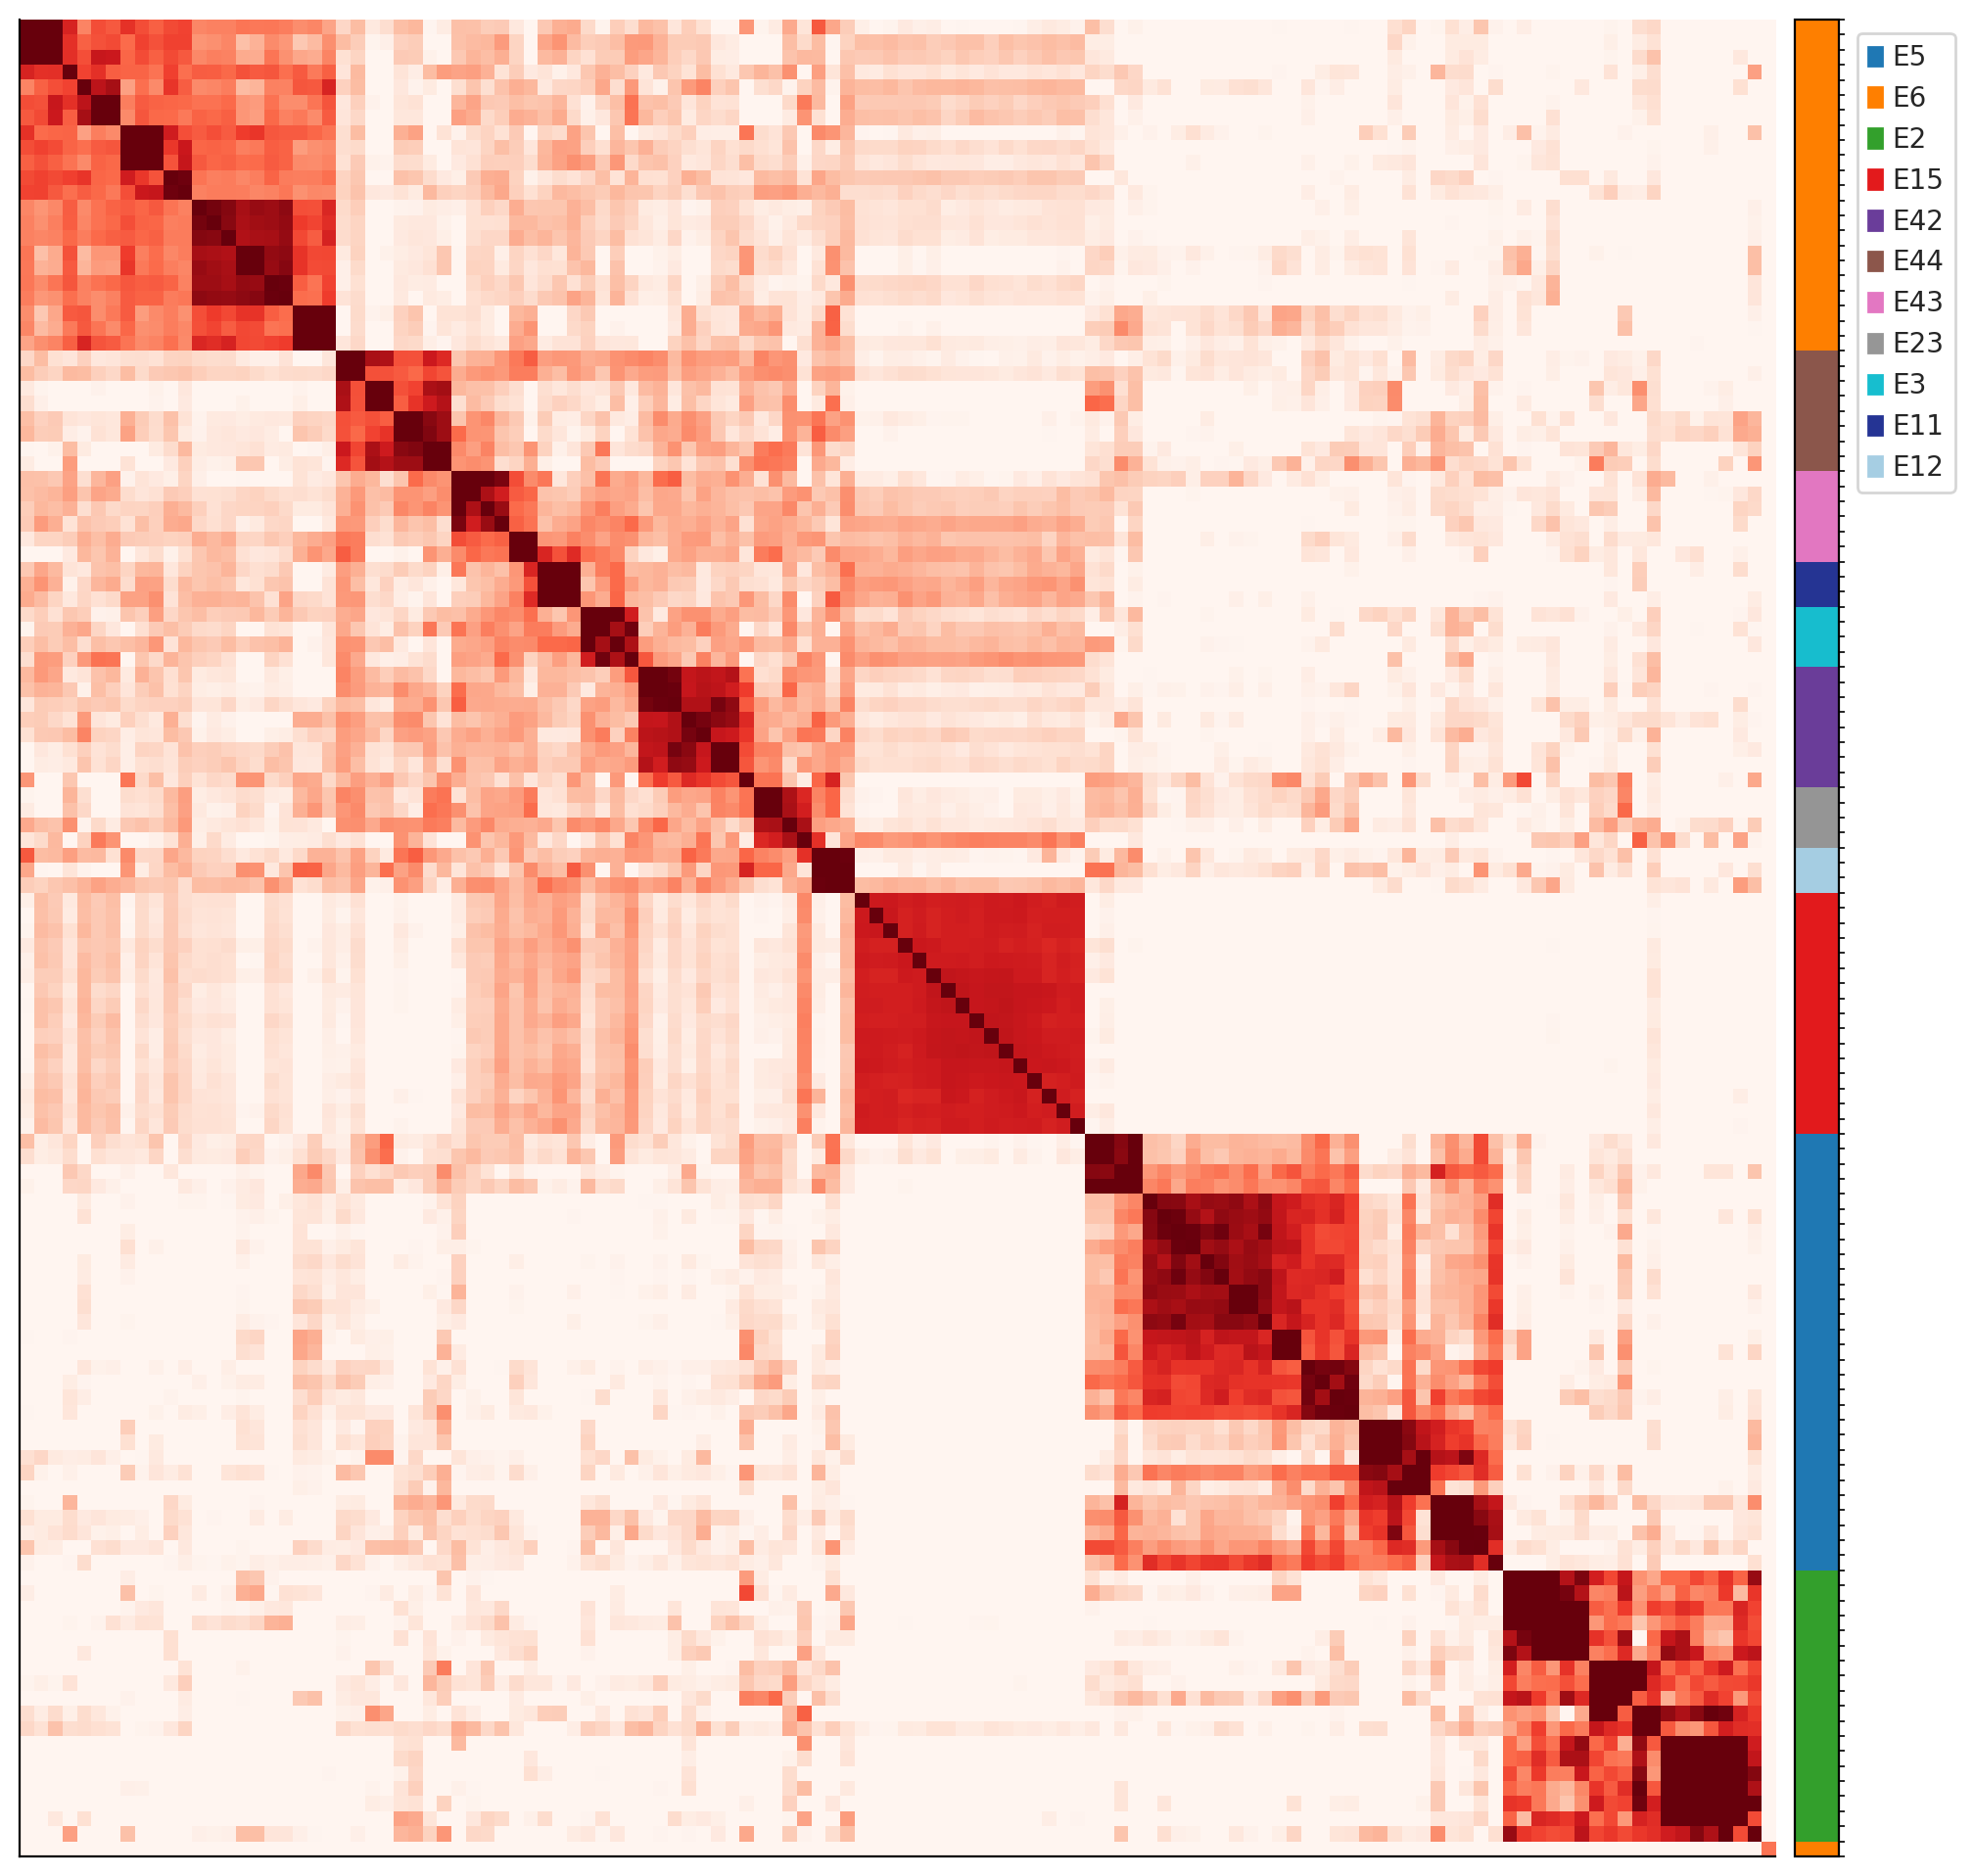

In [44]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## D6

In [45]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/lineage_D6_neutral_thresh_2022_human_embryo_spindle_transfer_onlymet_D6_readNcutoff_5_0.2_0.5_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (257, 470450)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 257/257 [02:14<00:00,  1.92it/s]


duration: 136.14103364944458
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  2%|▎         | 25/1000 [00:00<00:01, 808.17it/s]


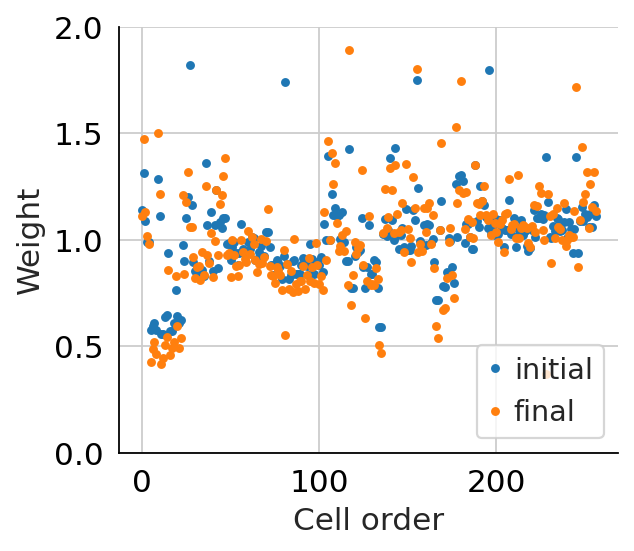

std: 0.052


Reconstruction method: UPGMA
  clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   E14           3       1.0         1.0      0.0         0.0   
1   E16           4       1.0         1.0      0.0         0.0   
2   E17           2       1.0         1.0      0.0         0.0   
3   E18           2       1.0         1.0      0.0         0.0   
4   E19           2       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0             0.00           0.333333           1.000           0.666667  
1             0.05           0.275000           0.975           0.725000  
2             0.00           0.500000           1.000           0.500000  
3             0.00           0.500000           1.000           0.500000  
4             0.00           0.500000           1.000           0.500000  
mean continuity: 0.9476666666666667
mean accuracy: 0.9352222222222223
mean entropy: 0.0870301141766603
mean wassertein: 0.06

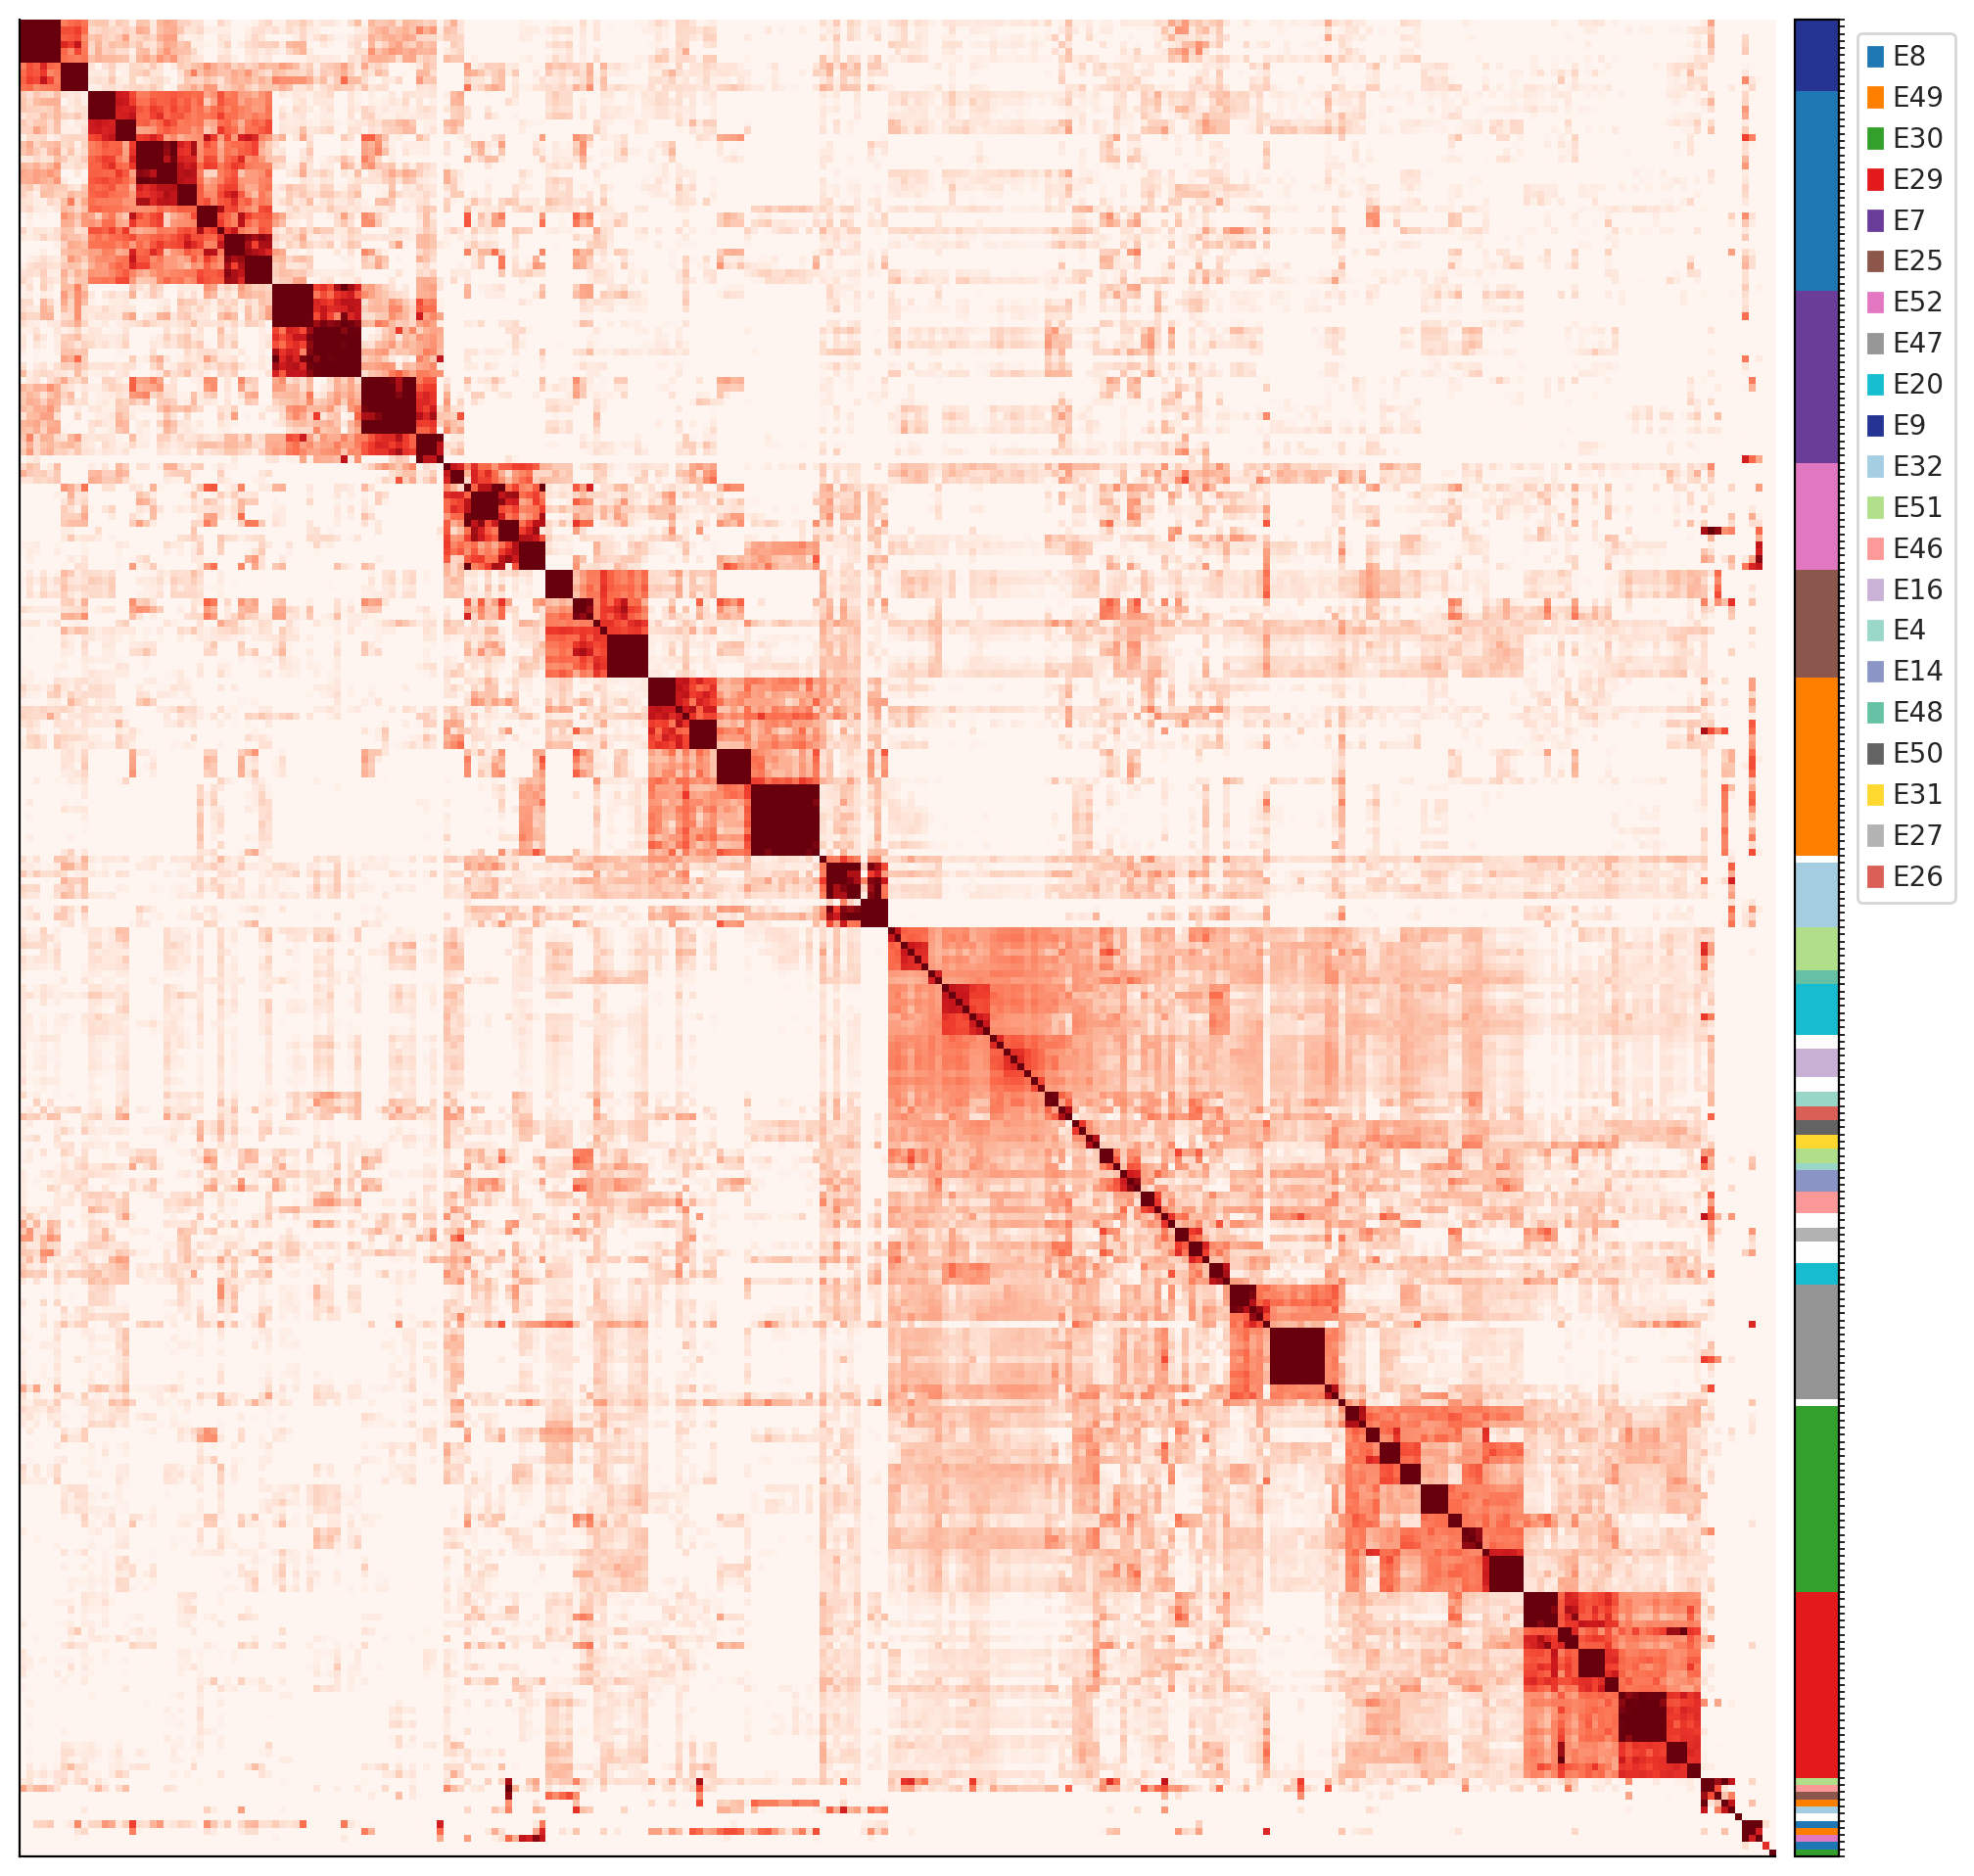

In [46]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## D7

In [47]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/lineage_D7_neutral_thresh_2022_human_embryo_spindle_transfer_onlymet_D6_readNcutoff_5_0.2_0.5_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (16, 465411)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 16/16 [00:00<00:00, 31.48it/s]


duration: 0.6397480964660645
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|          | 6/1000 [00:00<00:00, 2488.22it/s]


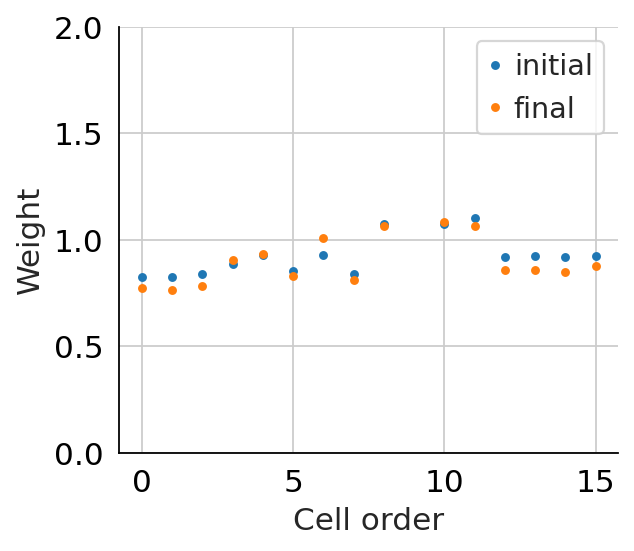

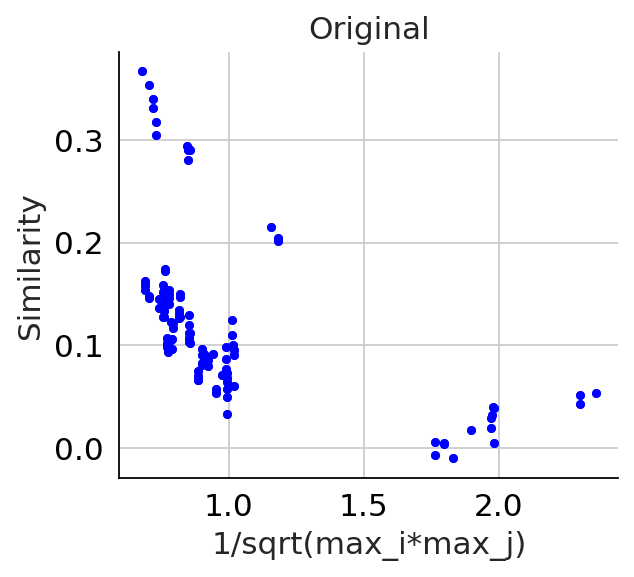

std: 0.350


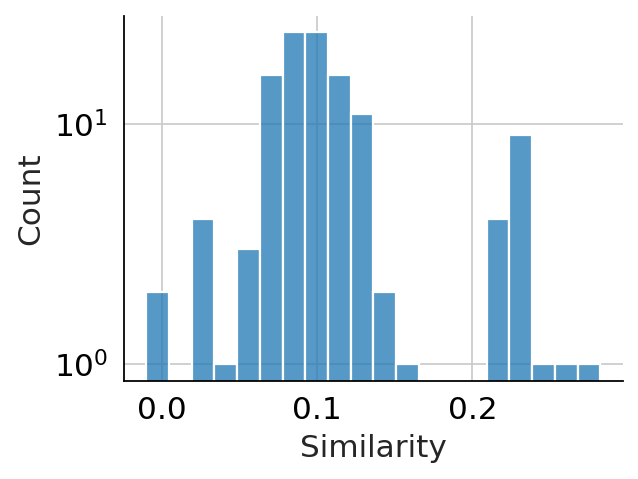

Reconstruction method: UPGMA
  clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   E34           8       1.0         1.0      0.0         0.0   
1   E35           4       1.0         1.0      0.0         0.0   
2   E45           4       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0           0.4125              0.575        0.637942               0.35  
1           0.3750              0.475        0.765564               0.45  
2           0.2250              0.375        0.865564               0.45  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuity: 0.4749999999999999
mean random_accuracy: 0.33749999999999997
mean random_entropy: 0.756356697218664
mean random_wassertein: 0.4166666666666667


In [48]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


# DARLIN_HSC (Fig6, ED.Fig6)

In [49]:
data_sets = 'DARLIN_HSC'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 1365; config samples: 191; merged samples: 1365
Genome reference: mm10


In [50]:
clone_key = 'large_clone_id'

## LL731

In [51]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/mouse_LL731_neutral_thresh_DARLIN_HSC_BM_0.66_0.92_readcutoff3_minCov0.1_met_ExcludeSex0.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (206, 214726)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 206/206 [00:17<00:00, 11.54it/s]


duration: 18.508353233337402
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|          | 5/1000 [00:00<00:01, 841.62it/s]


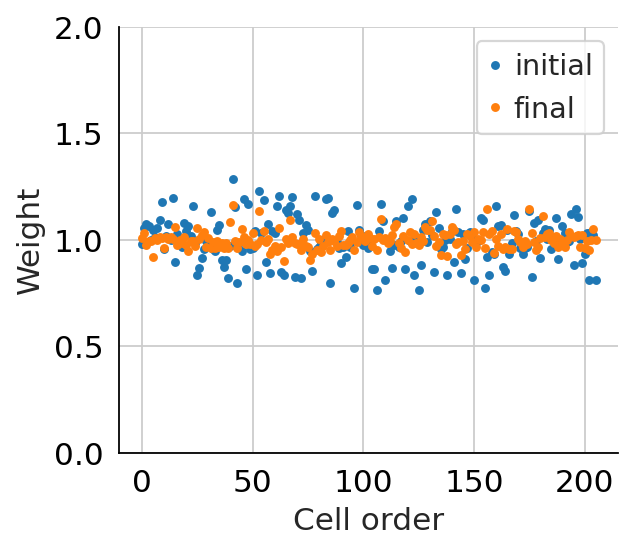

std: 0.007


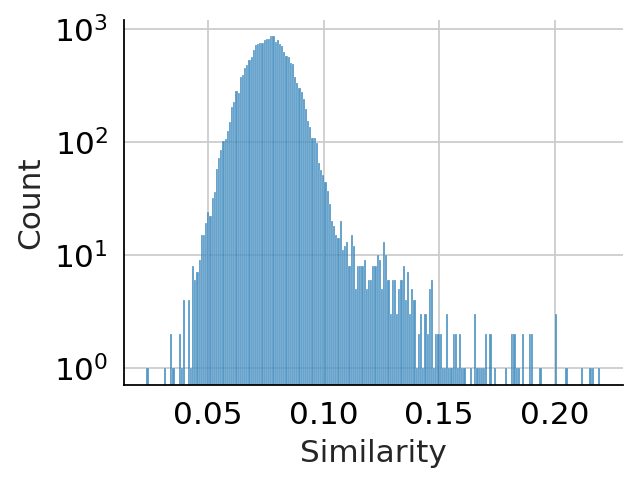

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   clone_0          12  0.833333    0.833333  0.22781    0.166667   
1   clone_1           8  1.000000    1.000000  0.00000    0.000000   
2  clone_10           3  1.000000    1.000000  0.00000    0.000000   
3  clone_11           2  1.000000    1.000000  0.00000    0.000000   
4  clone_12           2  1.000000    1.000000  0.00000    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.200000           0.291667        0.876755           0.616667  
1         0.225000           0.275000        0.893709           0.587500  
2         0.066667           0.366667        0.957938           0.600000  
3         0.000000           0.500000        1.000000           0.500000  
4         0.000000           0.500000        1.000000           0.500000  
mean continuity: 0.9444444444444445
mean accuracy: 0.896825396825397
mean entropy: 0.106086174284558

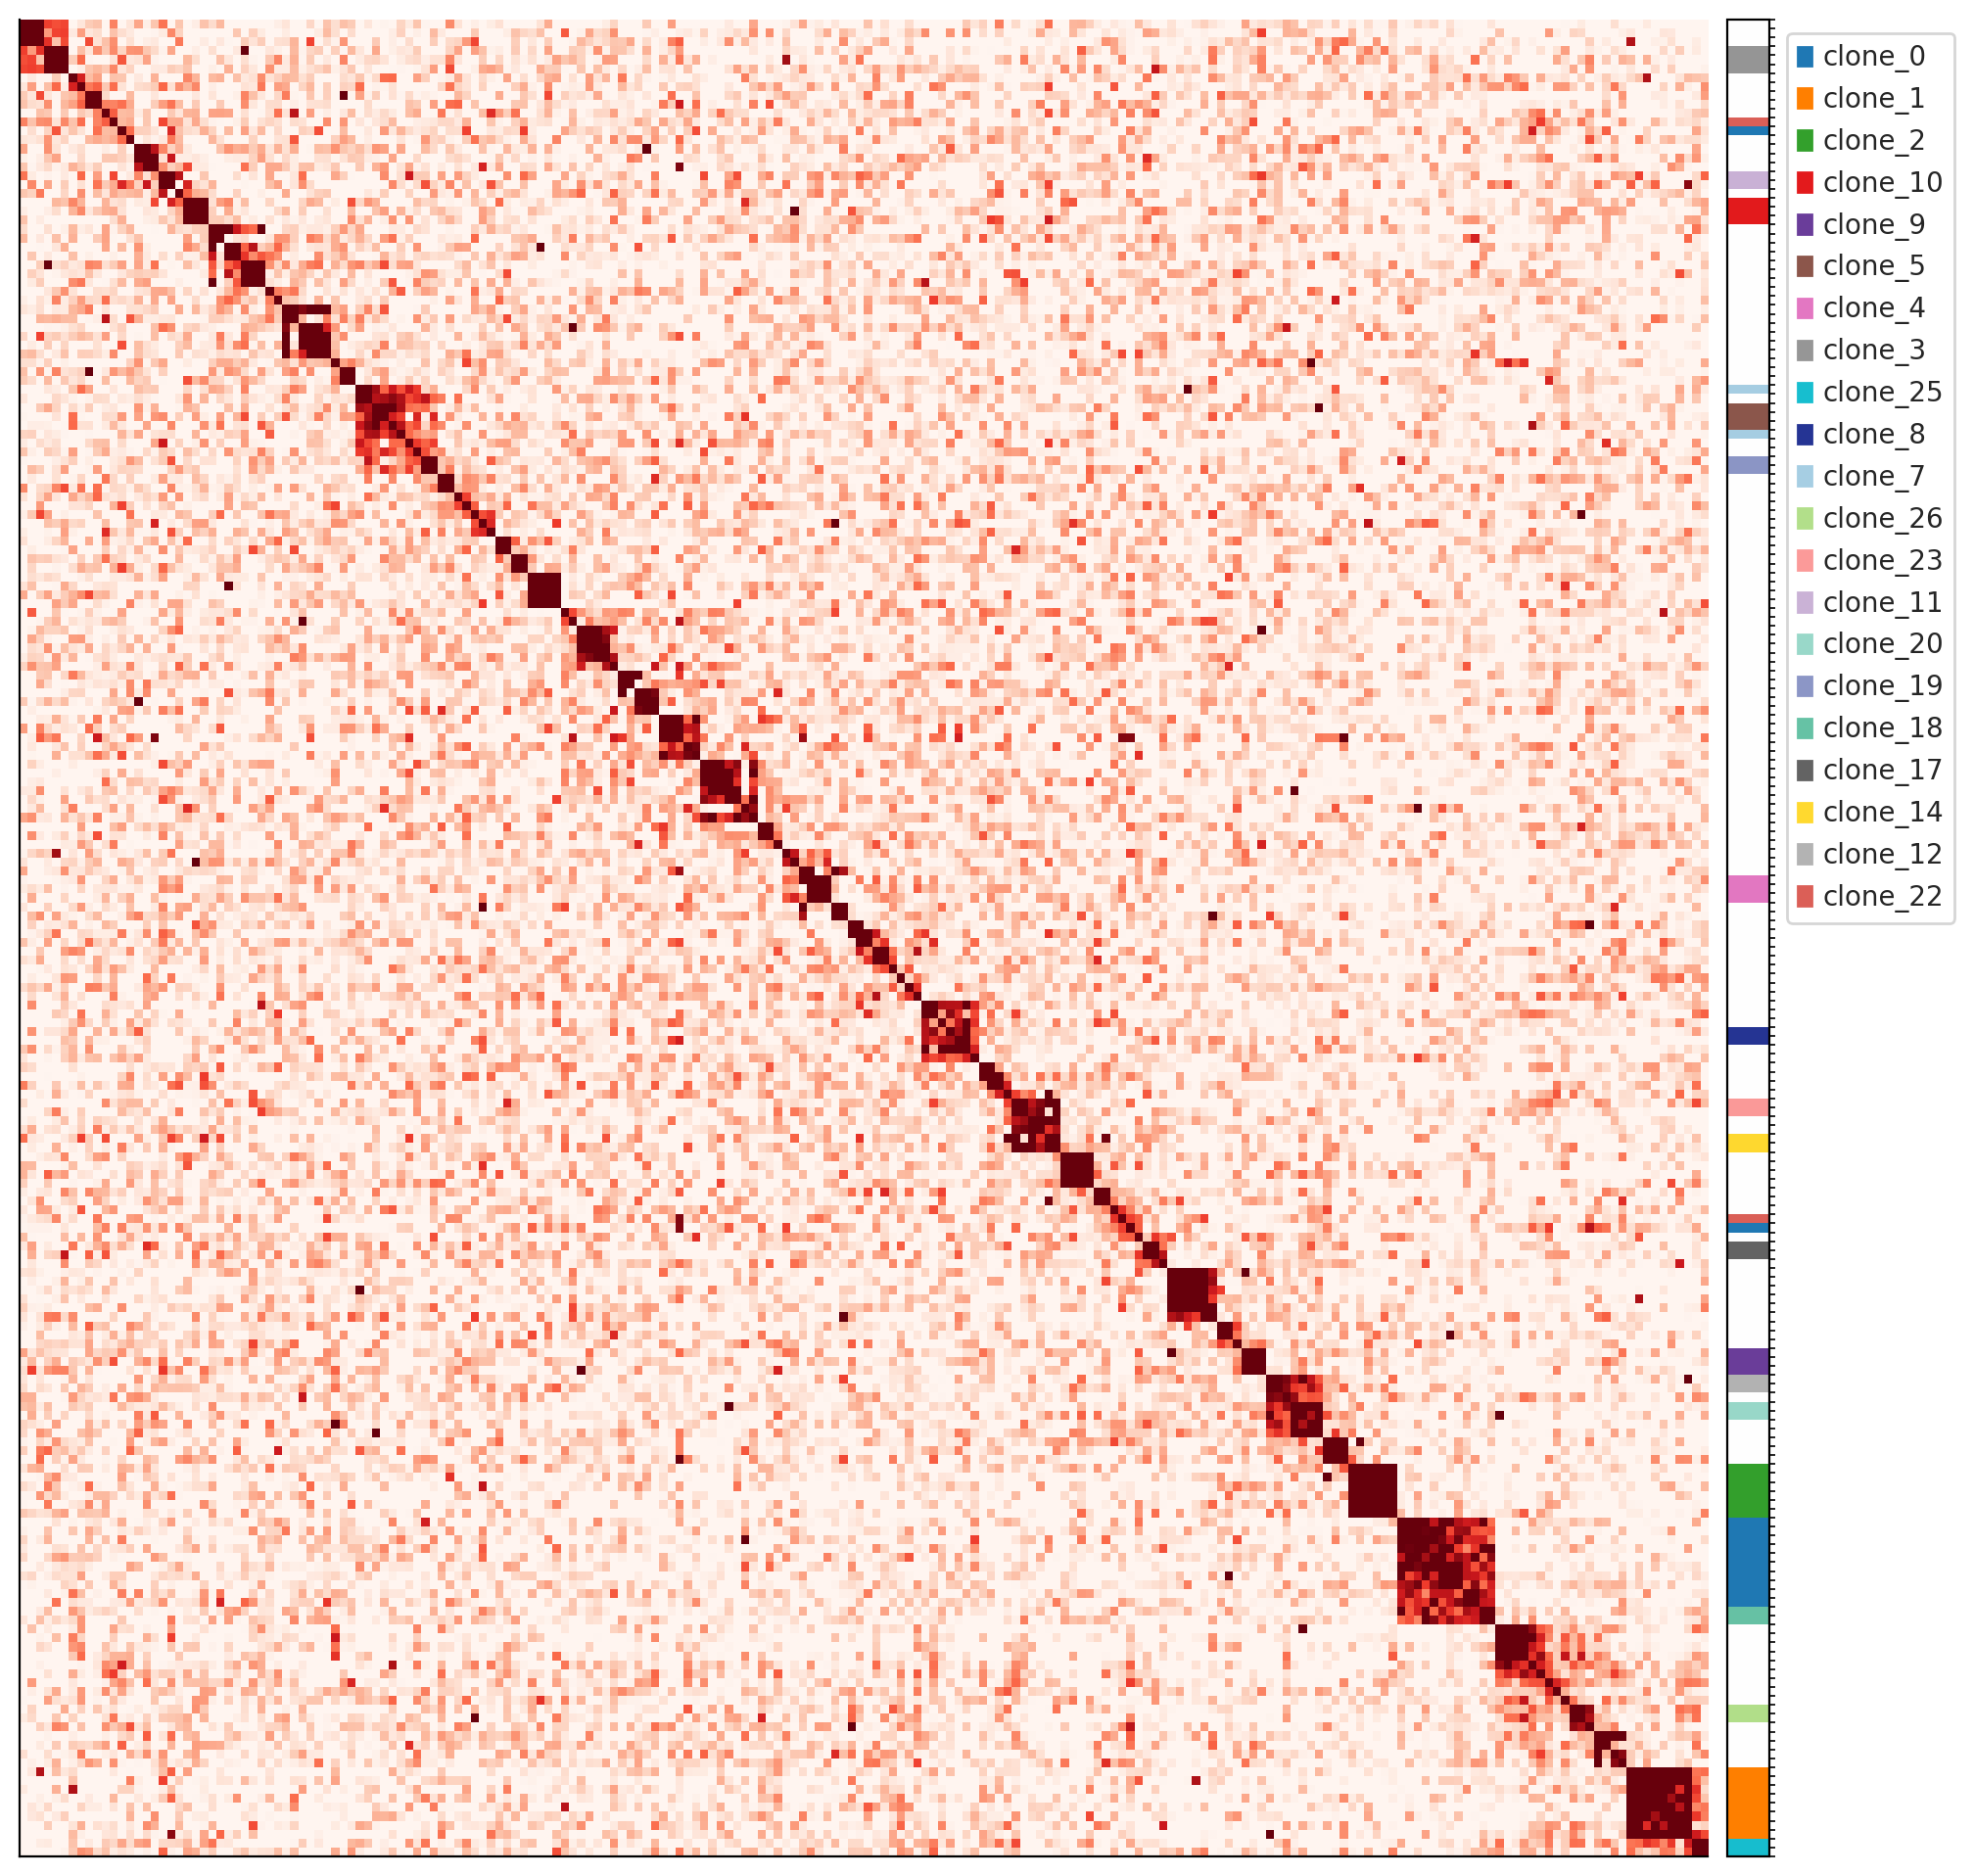

In [52]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## LL901

In [53]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/mouse_LL901_neutral_thresh_DARLIN_HSC_BM_0.66_0.92_readcutoff3_minCov0.1_met_ExcludeSex0.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (148, 155326)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 148/148 [00:05<00:00, 27.63it/s]


duration: 5.71869969367981
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|          | 3/1000 [00:00<00:00, 1042.93it/s]


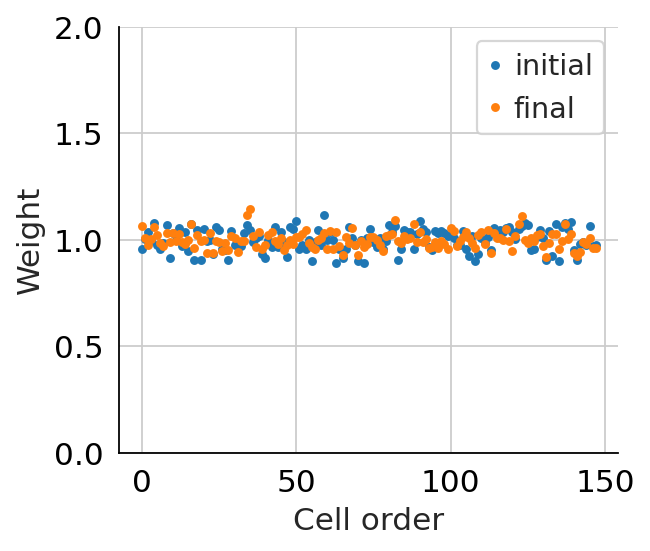

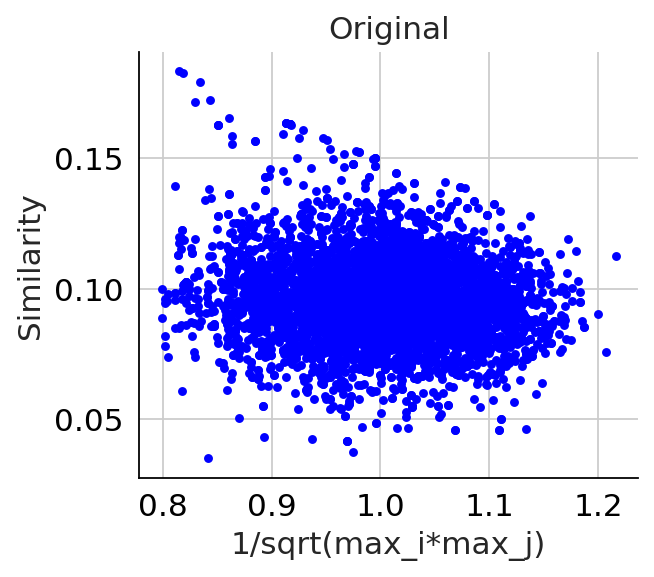

std: 0.008


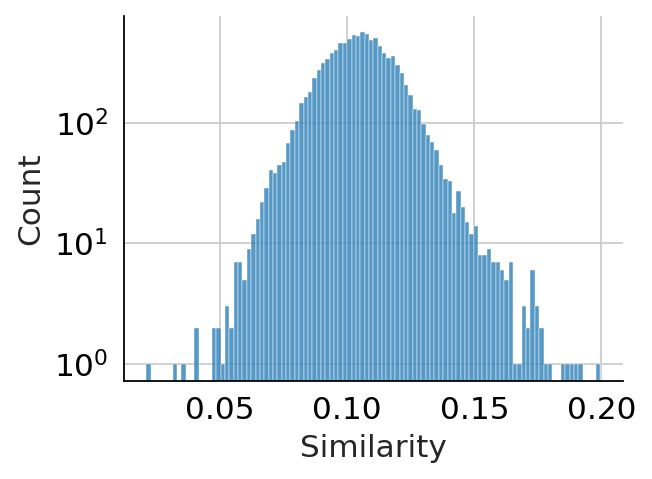

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity   entropy  wassertein  \
0   clone_0           5  0.600000    0.800000  0.418166    0.400000   
1   clone_1           3  0.666667    0.666667  0.579380    0.333333   
2  clone_10           2  1.000000    1.000000  0.000000    0.000000   
3  clone_11           2  1.000000    1.000000  0.000000    0.000000   
4  clone_14           2  1.000000    1.000000  0.000000    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0             0.16           0.280000        0.931092           0.620000  
1             0.00           0.333333        1.000000           0.633333  
2             0.10           0.550000        0.900000           0.450000  
3             0.00           0.500000        1.000000           0.500000  
4             0.10           0.550000        0.900000           0.450000  
mean continuity: 0.9380952380952381
mean accuracy: 0.9238095238095239
mean entropy: 0.11263757

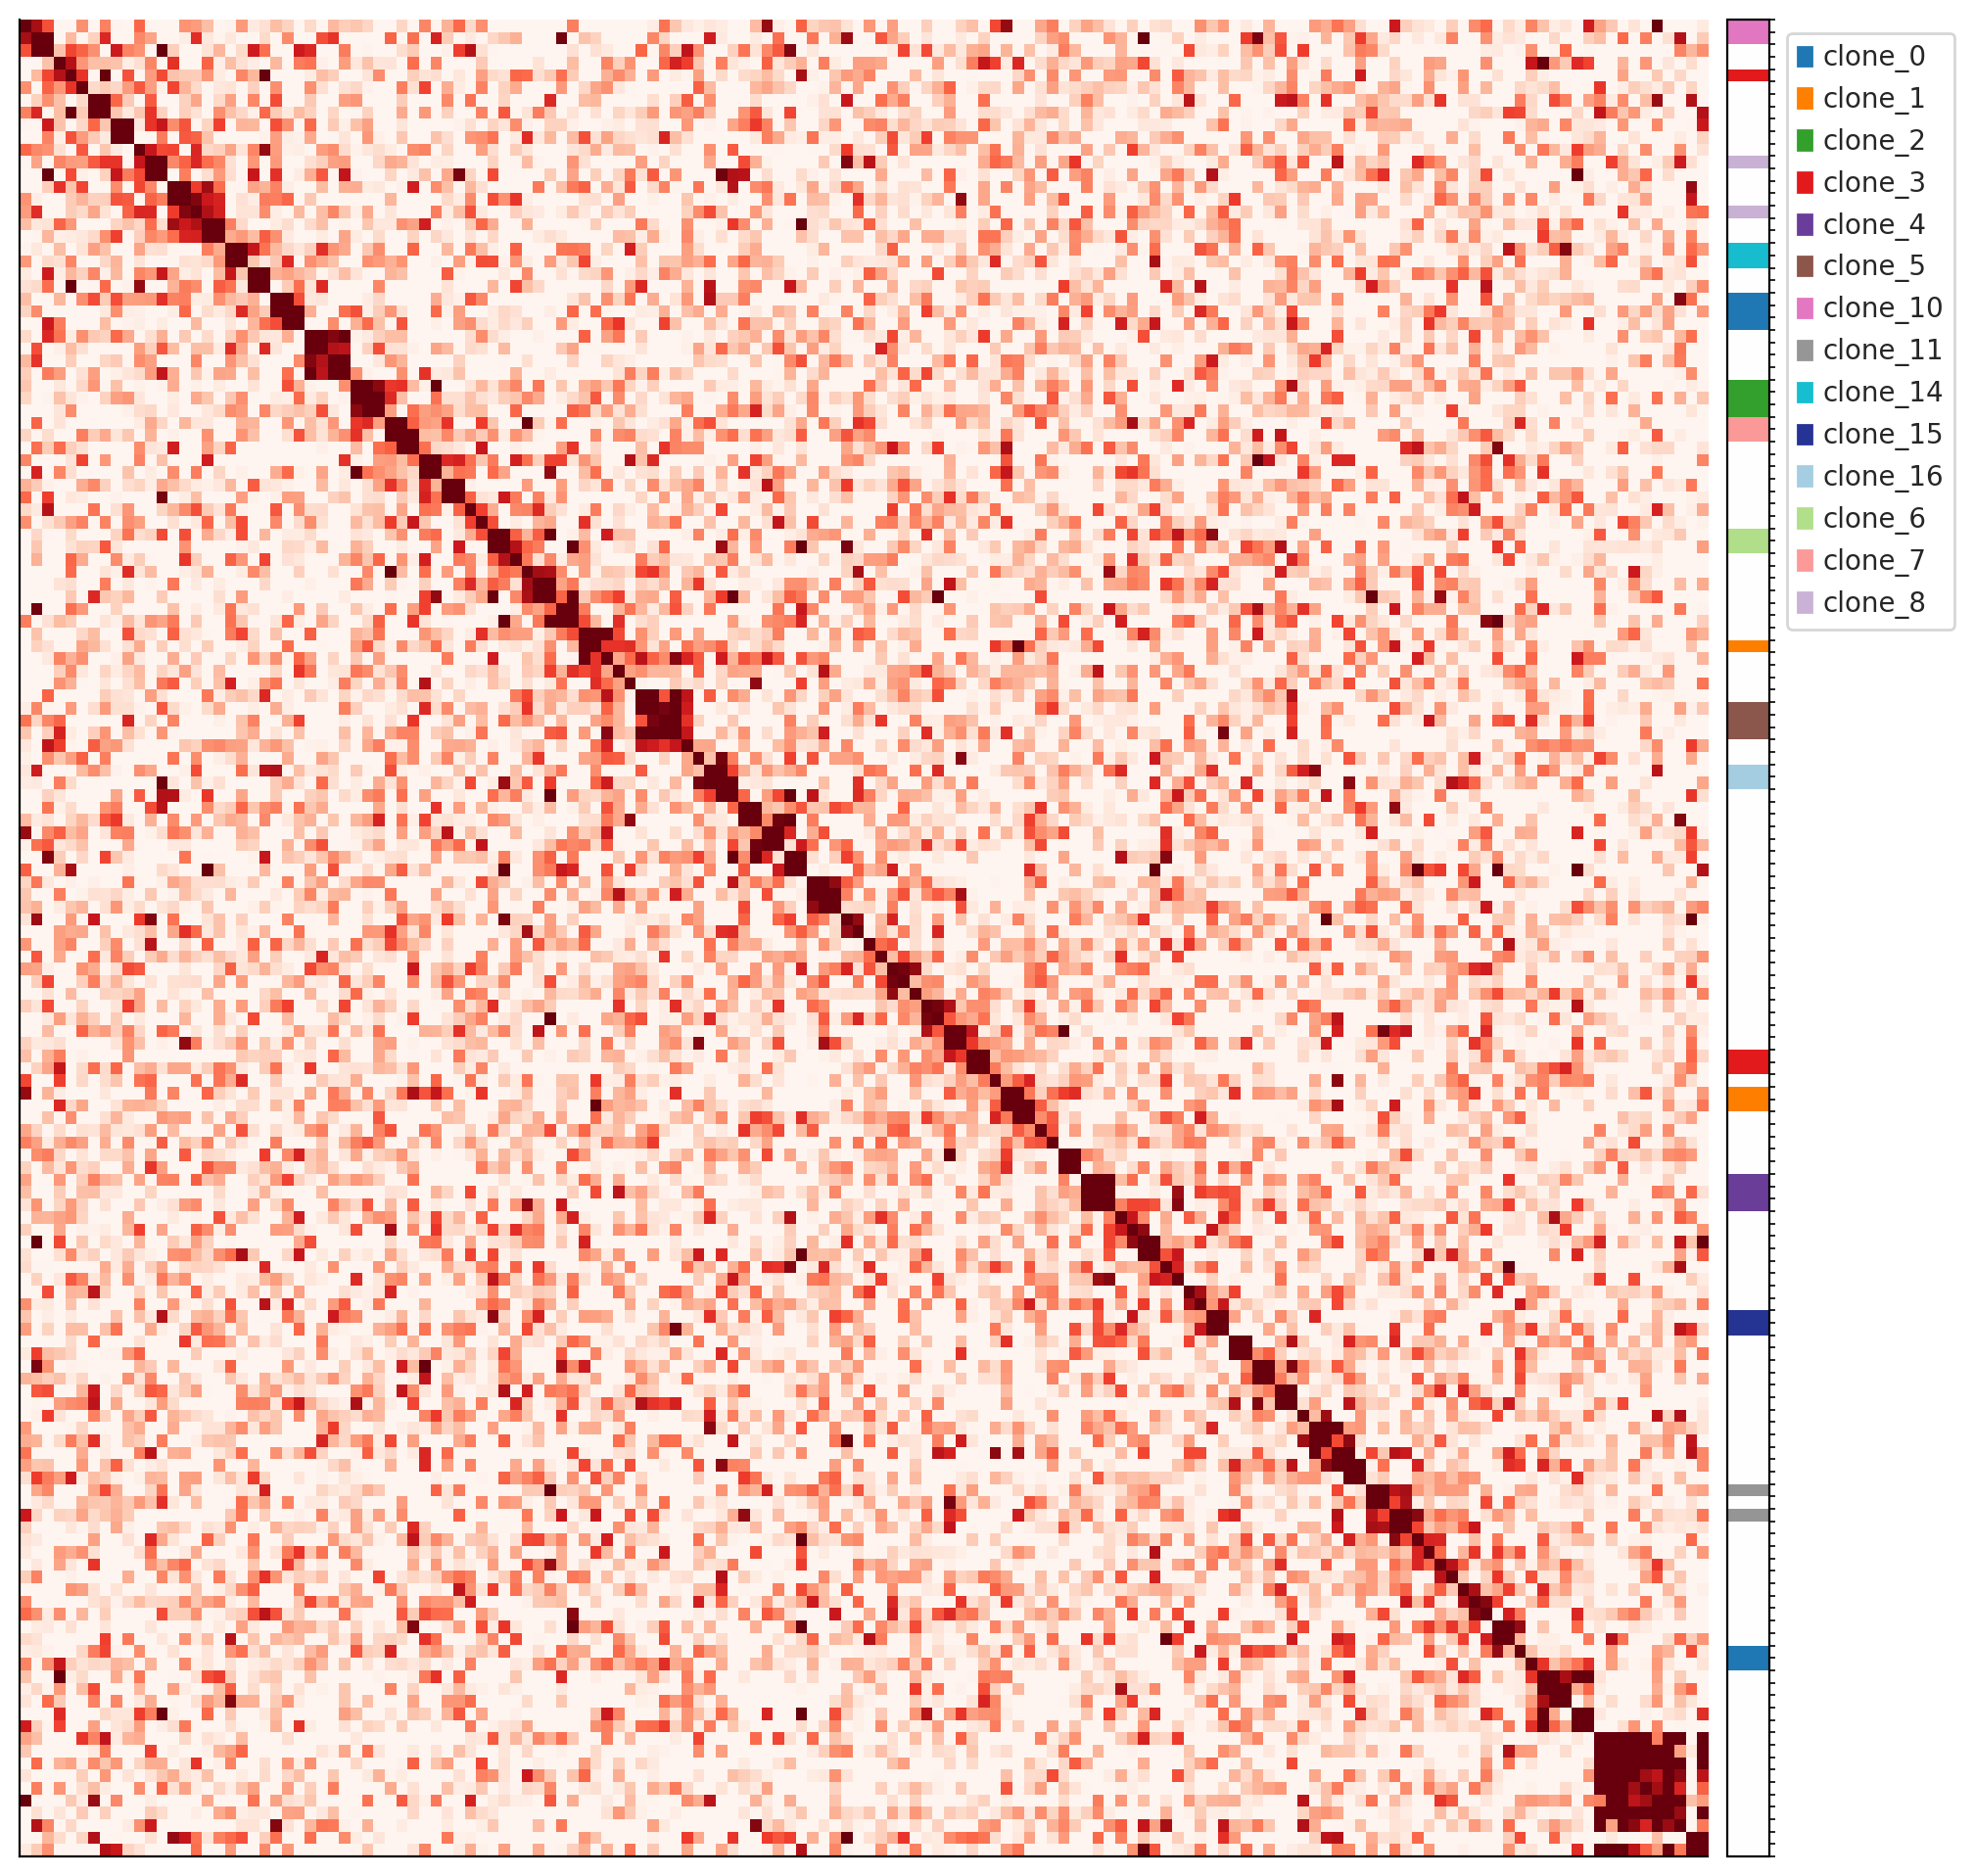

In [54]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## LL653E1

In [55]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/mouse_LL653E1_neutral_thresh_DARLIN_HSC_BM_0.66_0.92_readcutoff3_minCov0.1_met_ExcludeSex0.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (102, 181385)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 102/102 [00:03<00:00, 32.80it/s]


duration: 3.405222177505493
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|          | 3/1000 [00:00<00:00, 1388.23it/s]


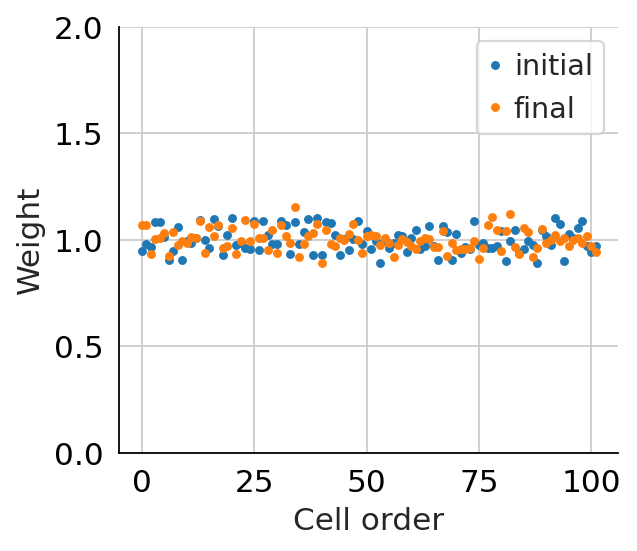

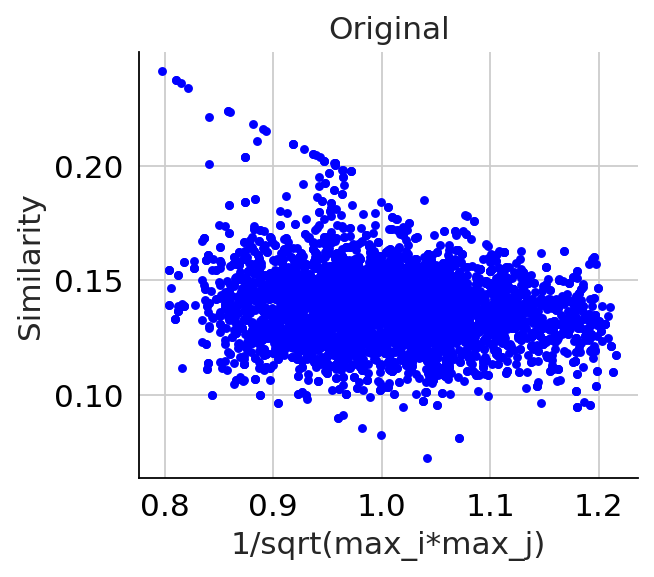

std: 0.014


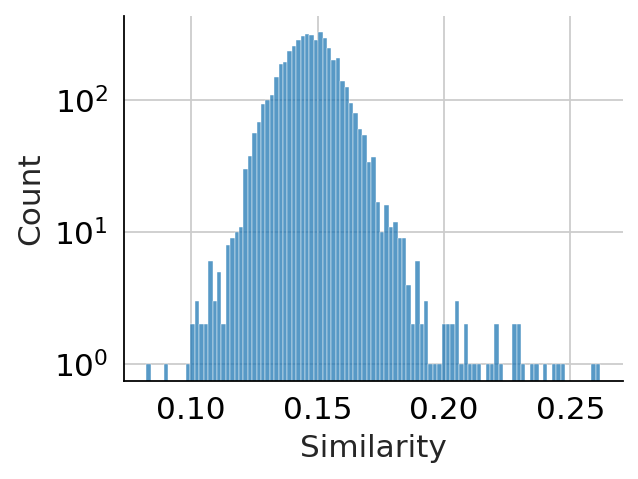

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  clone_12           2       1.0         1.0      0.0         0.0   
1  clone_17           2       1.0         1.0      0.0         0.0   
2  clone_19           2       1.0         1.0      0.0         0.0   
3  clone_20           2       1.0         1.0      0.0         0.0   
4   clone_3           2       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0              0.4               0.70             0.6               0.30  
1              0.3               0.65             0.7               0.35  
2              0.0               0.50             1.0               0.50  
3              0.2               0.60             0.8               0.40  
4              0.3               0.65             0.7               0.35  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuit

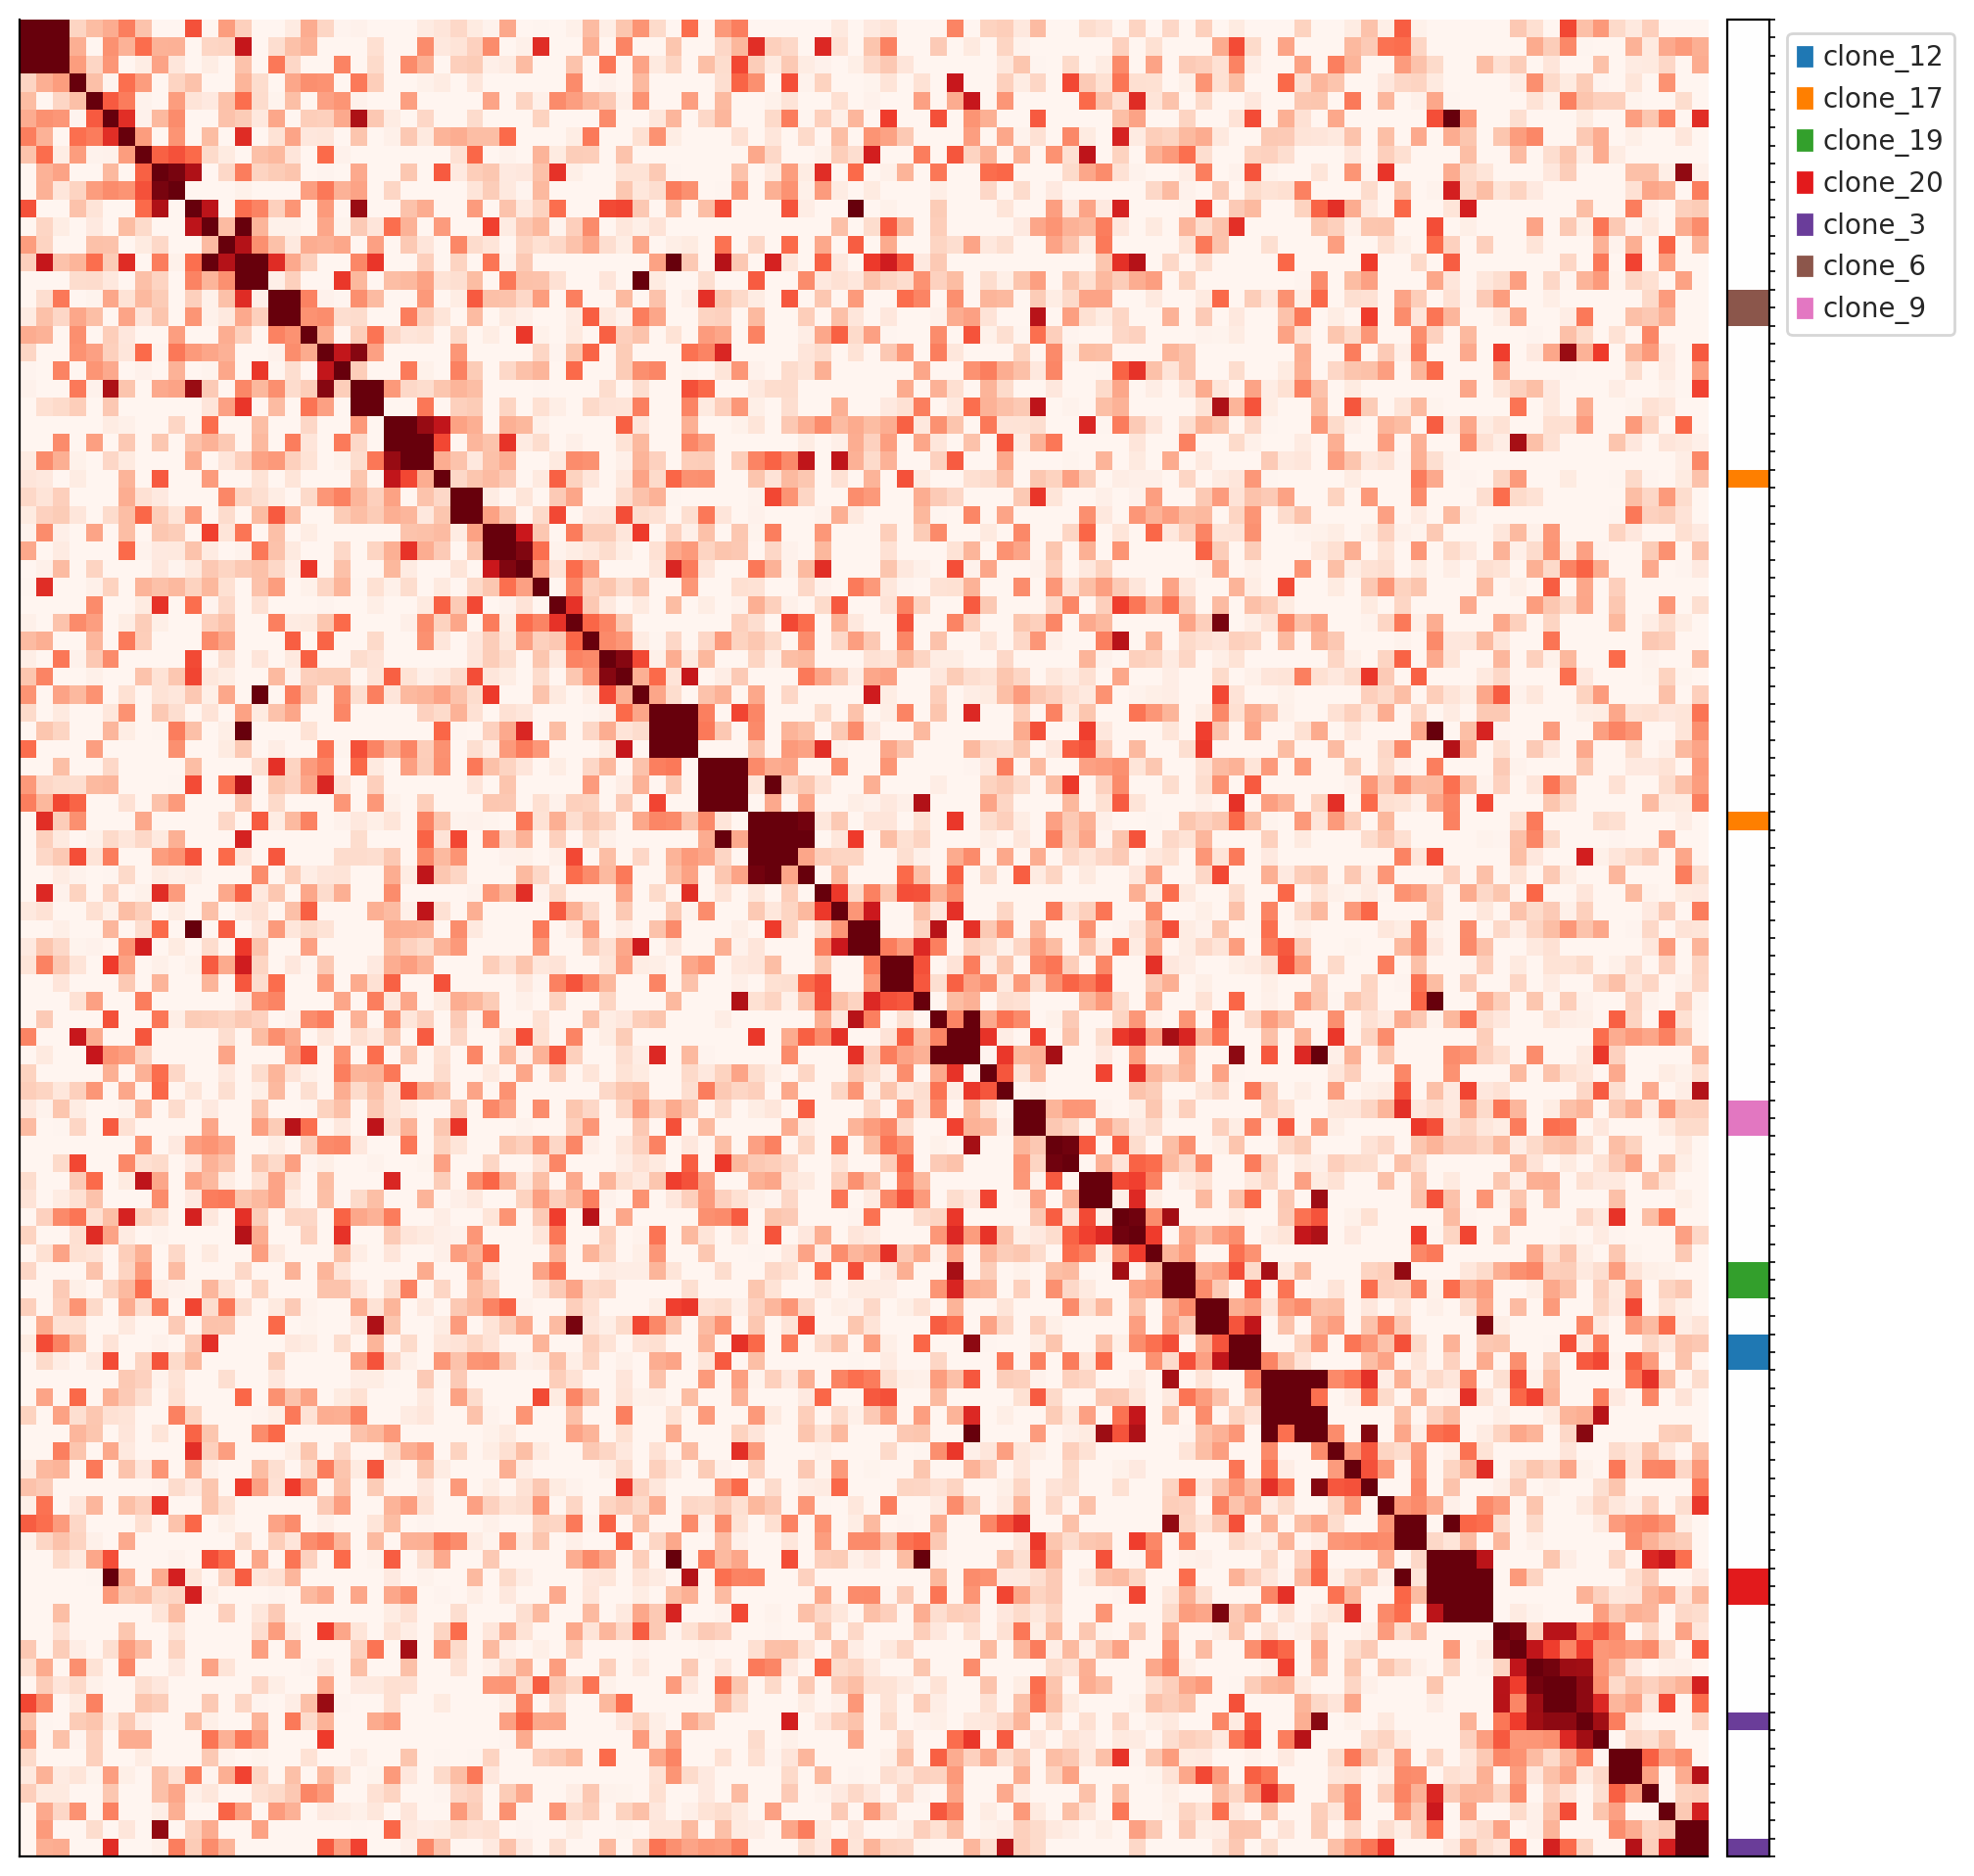

In [56]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## LL653E6

In [57]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/mouse_LL653E6_neutral_thresh_DARLIN_HSC_BM_0.66_0.92_readcutoff3_minCov0.1_met_ExcludeSex0.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (182, 193826)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|██████████| 182/182 [00:11<00:00, 16.00it/s]


duration: 11.981914758682251
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|          | 3/1000 [00:00<00:01, 839.92it/s]


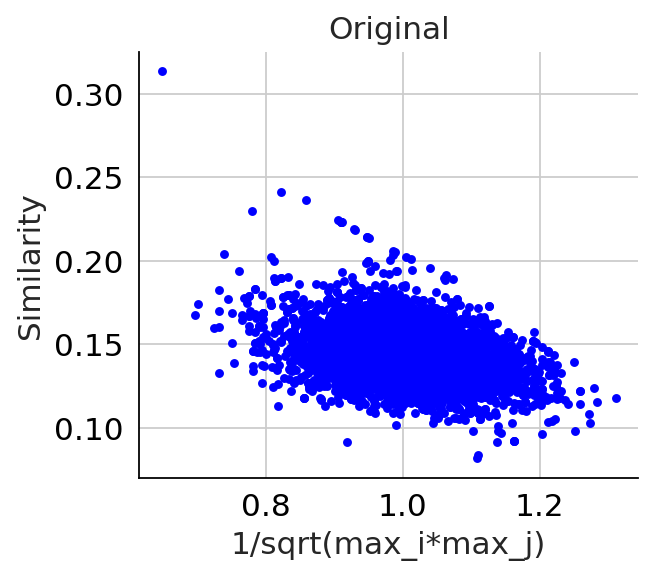

std: 0.013


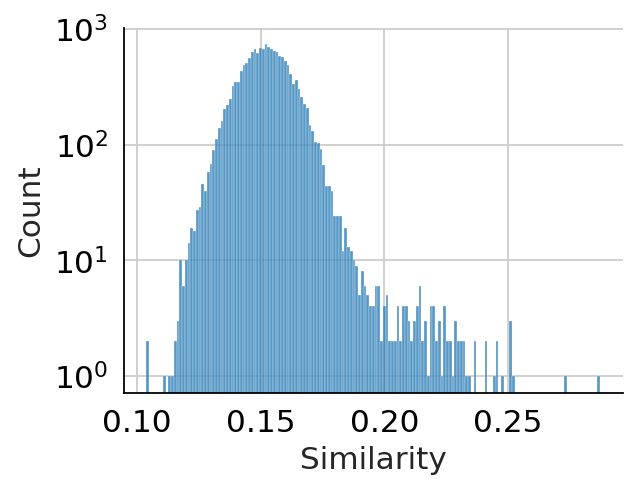

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   clone_0           4       0.5    0.500000     0.75    0.500000   
1   clone_1           3       0.0    0.333333     1.00    0.666667   
2  clone_10           2       0.0    0.500000     1.00    0.500000   
3  clone_11           2       0.0    0.500000     1.00    0.500000   
4  clone_12           2       1.0    1.000000     0.00    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.050000              0.275        0.975000           0.650000  
1         0.133333              0.400        0.915876           0.466667  
2         0.000000              0.500        1.000000           0.500000  
3         0.000000              0.500        1.000000           0.500000  
4         0.100000              0.550        0.900000           0.450000  
mean continuity: 0.8137254901960784
mean accuracy: 0.6764705882352942
mean entropy: 0.33823529411764

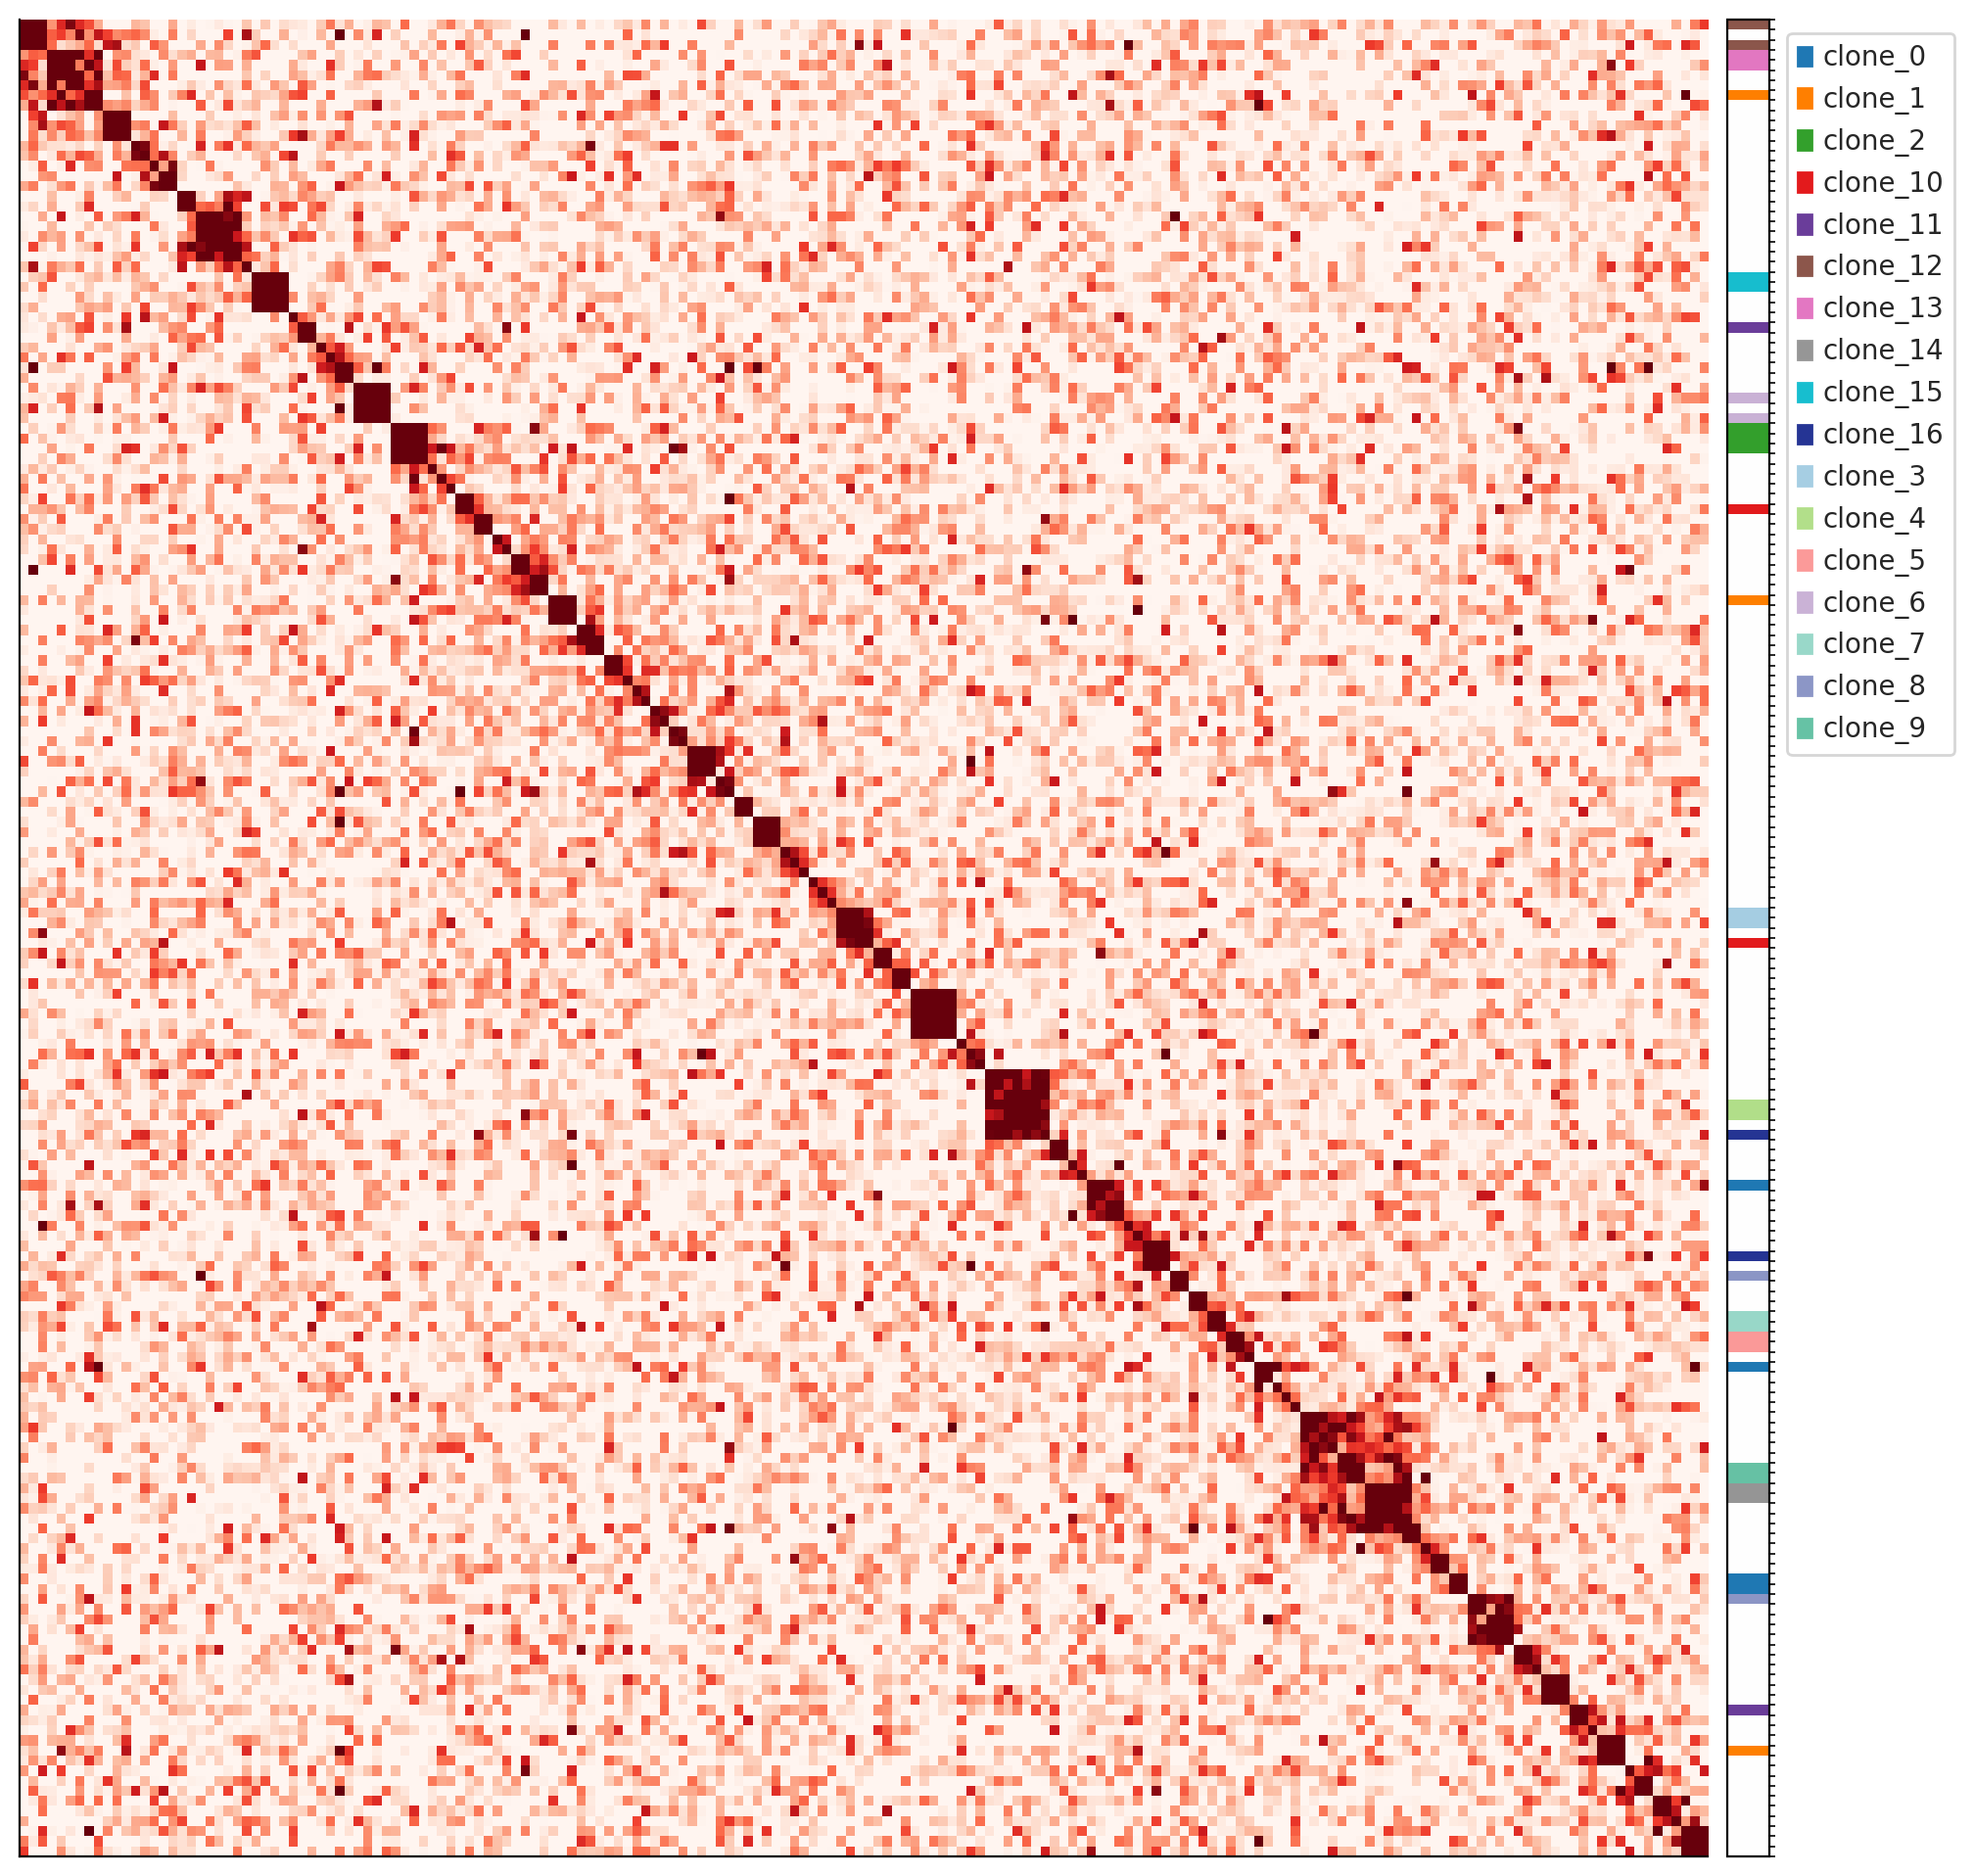

In [58]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)
